In [3]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings ('ignore')
plt.rcParams['figure.figsize']=(20,10)
pd.set_option('display.max_columns',None)


You are a data scientist of a big MNC who usually hires more than 10k candidates every year.

To complete the task they conduct more than 1 lakhs of interviews every year.

Interview-Intel is the modern way to approach hiring by harmonizing all aspects of the interview process into a beautiful symphony. An interview intelligence tool records, transcribes, and analyzes candidate conversations. It helps the hiring managers, recruiters, and HR Business Partners (HRBPs) to gain deeper visibility into the interview process, create smooth feedback loops between the panellists, and improve the overall recruitment process.


You need to predict the status of the interviews so that recruiters can check the sanity of the interview and find if the interview was biased

In [4]:
df_train = pd.read_csv('C:/Users/Manoj/Desktop/Surya/Machine Learning/Hackathon imarticus/Round 2/train.csv')
df_test = pd.read_csv('C:/Users/Manoj/Desktop/Surya/Machine Learning/Hackathon imarticus/Round 2/test.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5800 non-null   float64
 1   Candidate Id        5800 non-null   float64
 2   Interviewer Id      5800 non-null   int64  
 3   Profile             5800 non-null   object 
 4   S.L.R.C             5800 non-null   float64
 5   S.L.R.I             5800 non-null   float64
 6   A.T.T               5800 non-null   int64  
 7   L.M.I               5800 non-null   int64  
 8   L.M.C               5800 non-null   int64  
 9   S.R                 5800 non-null   int64  
 10  L.J.T.C             5800 non-null   int64  
 11  L.J.T.I             5800 non-null   int64  
 12  N.I.C               5800 non-null   int64  
 13  N.I.I               5800 non-null   int64  
 14  S.P.I               5800 non-null   int64  
 15  S.P.C               5800 non-null   int64  
 16  L.A.C 

In [6]:
df_num = df_train.select_dtypes(['float64','int64'])
df_num

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
0,6.913030e+11,2.655774e+09,194,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,98,37
1,9.214326e+11,7.123846e+08,234,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,54,33
2,4.718839e+10,8.445533e+08,267,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,31,58
3,9.943741e+11,6.511106e+09,199,0.69,0.31,93,42,103,49,115,166,62,55,65,75,10,10,7,24,35
4,3.509007e+11,3.487001e+09,221,0.57,0.43,44,44,119,66,190,394,7,32,36,74,13,7,3,73,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,3.186849e+11,7.483571e+09,192,0.58,0.42,52,51,119,42,274,100,13,15,59,6,6,13,5,16,25
5796,2.129354e+11,6.833534e+09,230,0.69,0.31,34,81,115,51,11,401,19,5,70,13,6,3,6,23,40
5797,8.850640e+11,4.657574e+09,253,0.64,0.36,58,58,43,42,143,240,59,63,79,77,3,19,3,60,18
5798,6.047461e+11,8.118565e+08,257,0.94,0.06,104,55,114,68,83,518,35,54,53,45,11,14,3,61,43


In [7]:
df_n = df_test.select_dtypes(['float64','int64'])
df_n

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
0,702127796635,2.381365e+09,229,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,24.0,49
1,613490569071,8.428514e+08,194,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,99.0,24
2,759998772623,7.681665e+09,266,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,16.0,16
3,391760082113,6.627808e+09,256,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,66.0,40
4,941599210196,1.148634e+09,267,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,47.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,256033687434,1.299110e+09,193,0.66,0.34,95,118,79,65,294.0,110,61,29,30.0,85,15,20.0,7.0,86.0,49
1196,627337316047,2.367087e+09,233,0.66,0.34,42,47,107,57,54.0,140,35,33,51.0,76,8,18.0,2.0,32.0,32
1197,75547031851,4.401842e+09,214,0.73,0.27,72,105,78,55,247.0,158,30,39,27.0,6,1,18.0,3.0,34.0,19
1198,173914777164,7.505289e+08,231,0.95,0.05,42,45,68,60,97.0,327,65,42,88.0,63,1,9.0,7.0,78.0,23


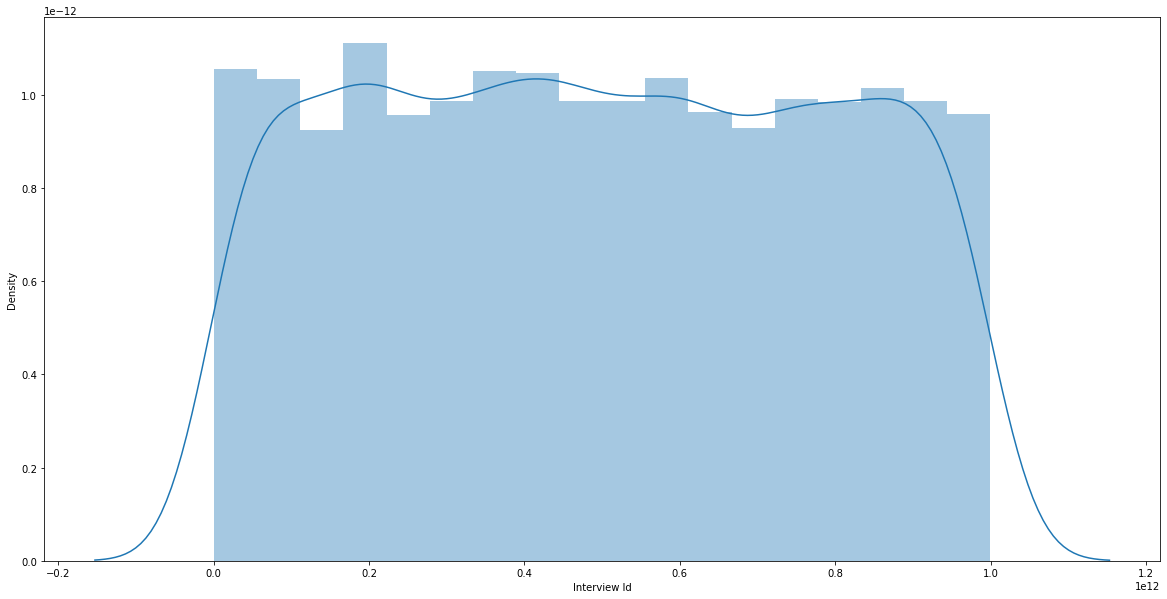

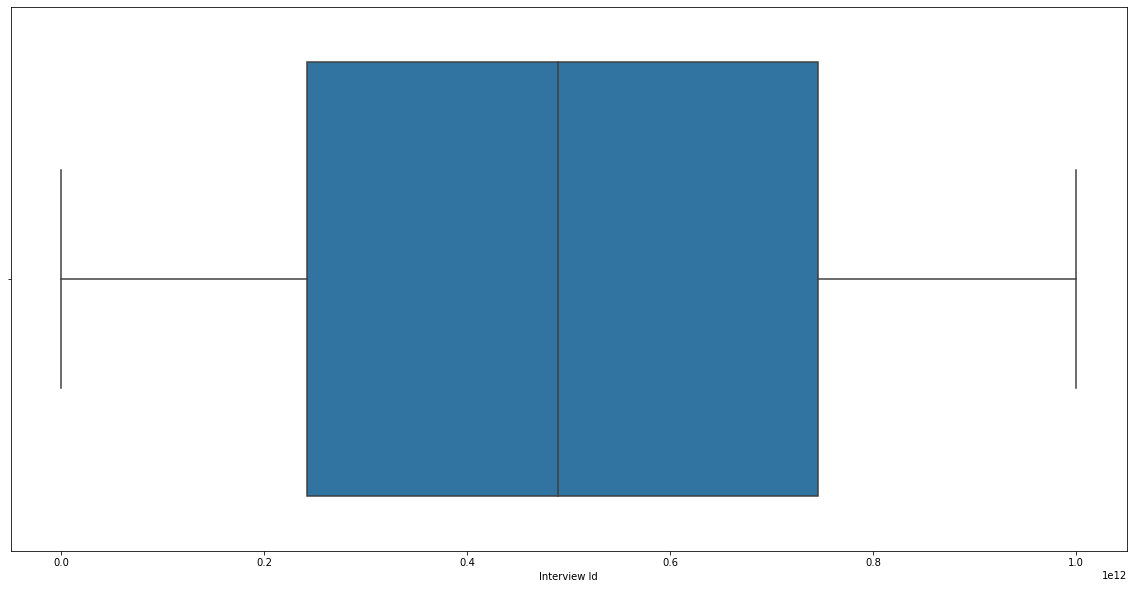

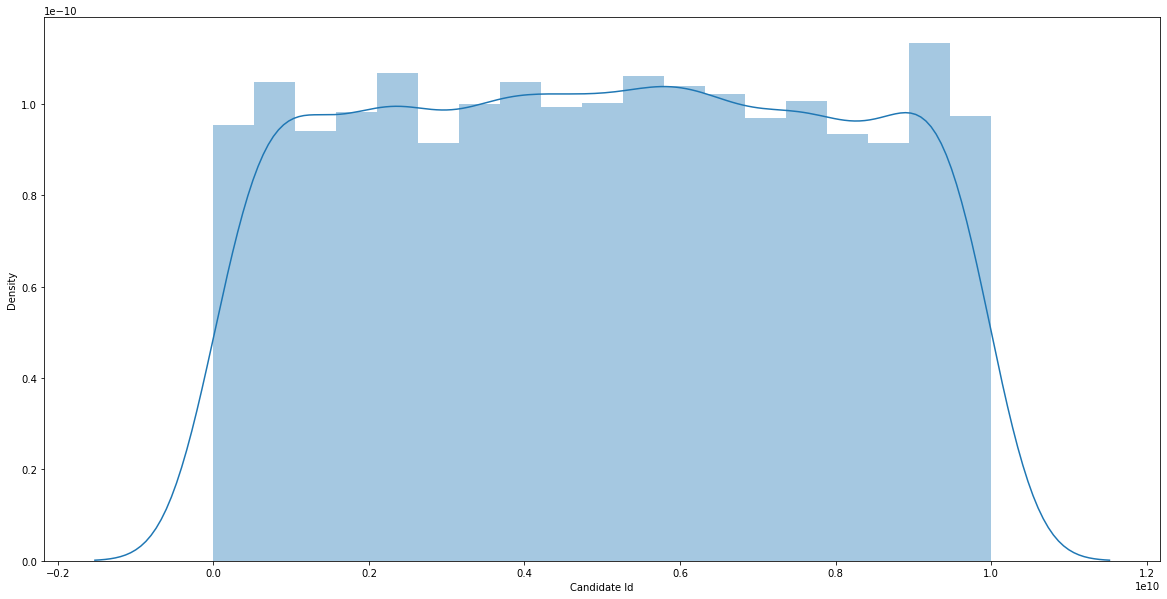

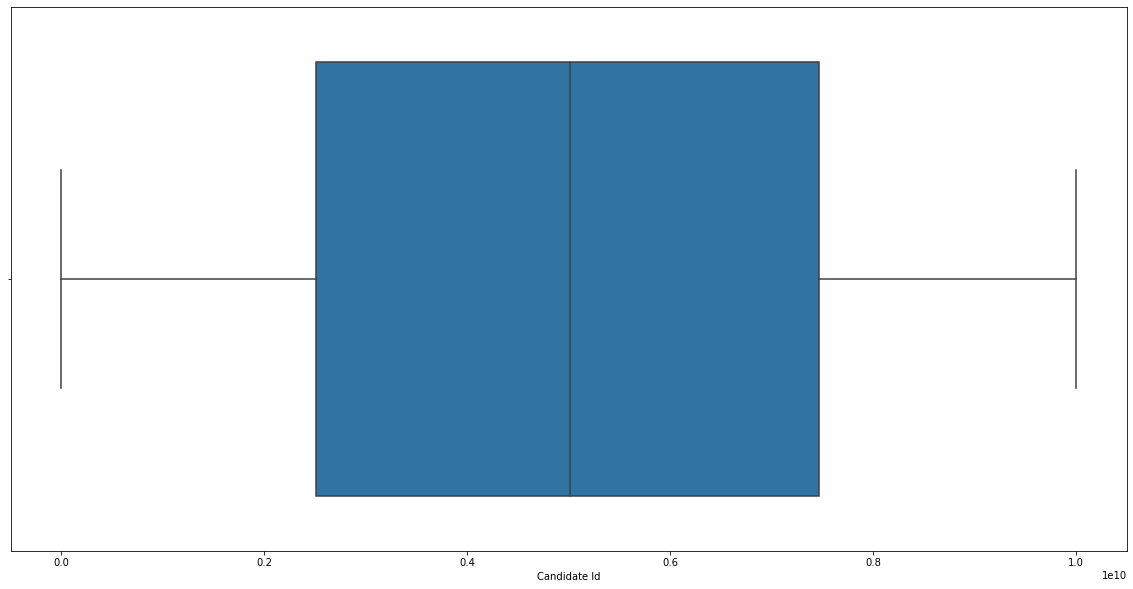

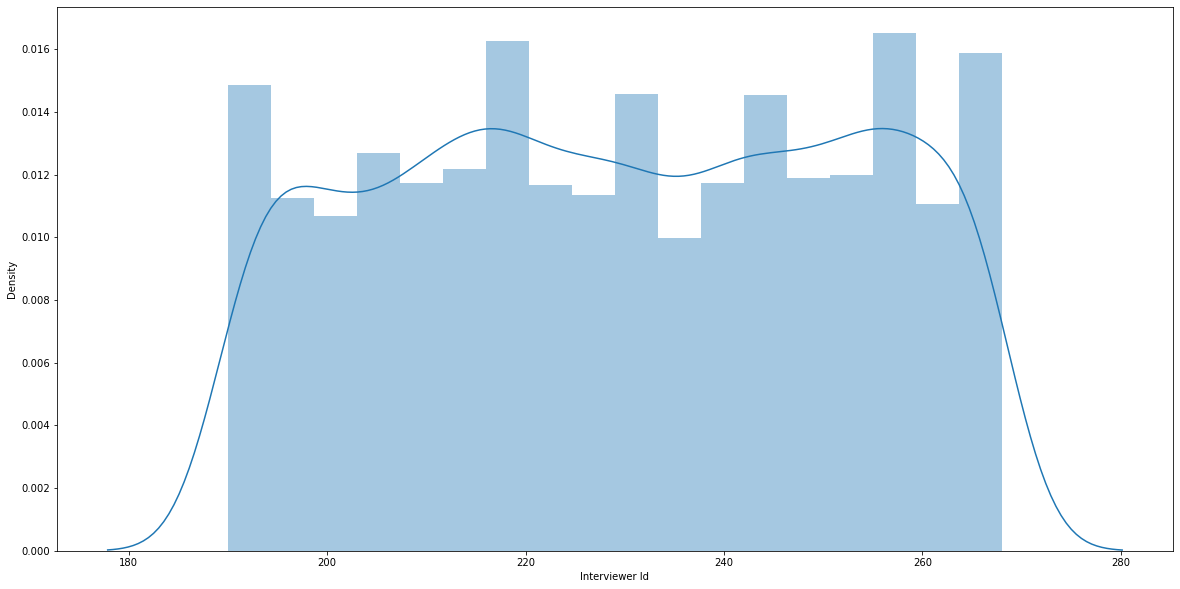

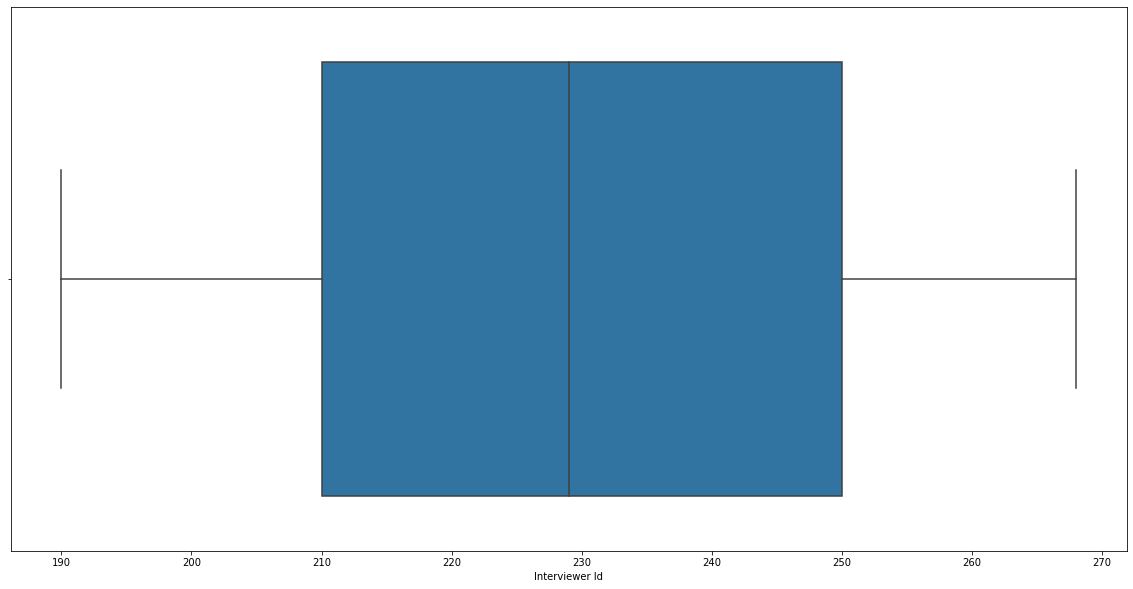

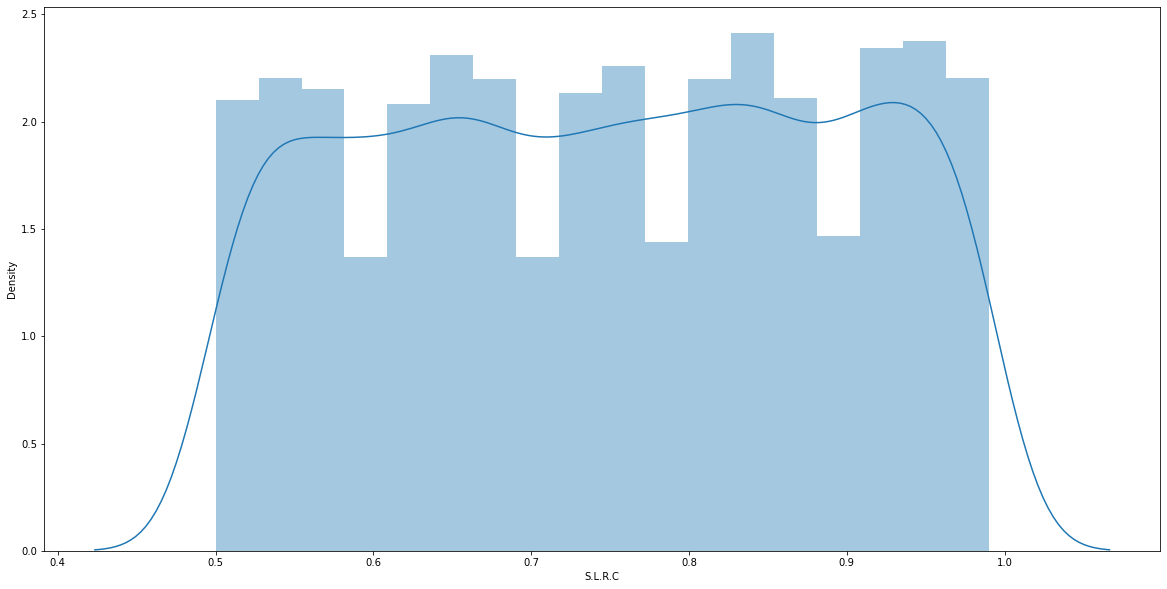

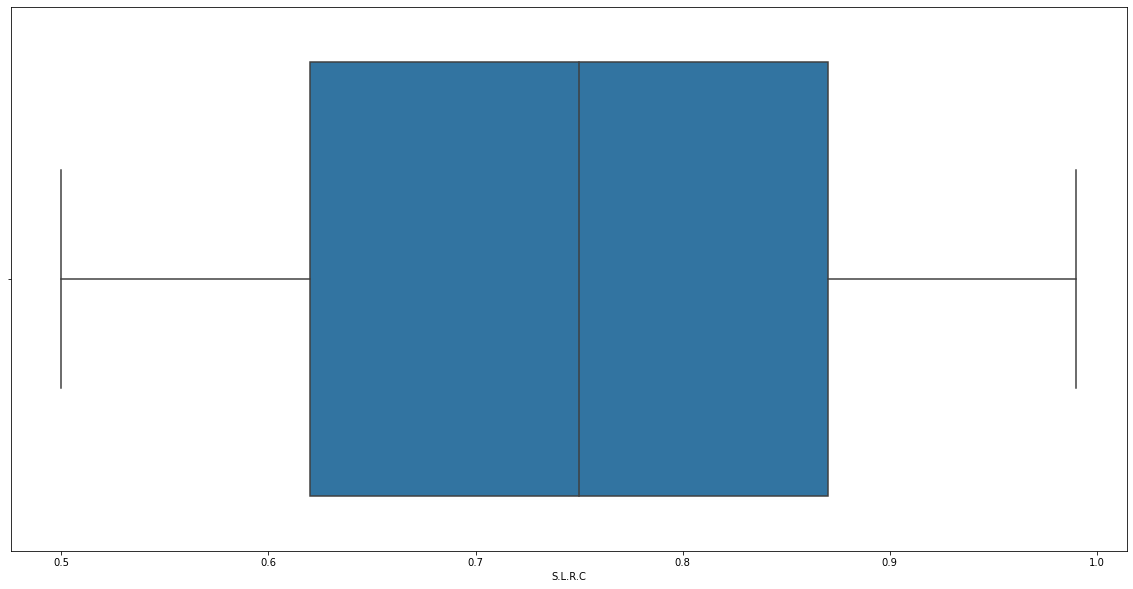

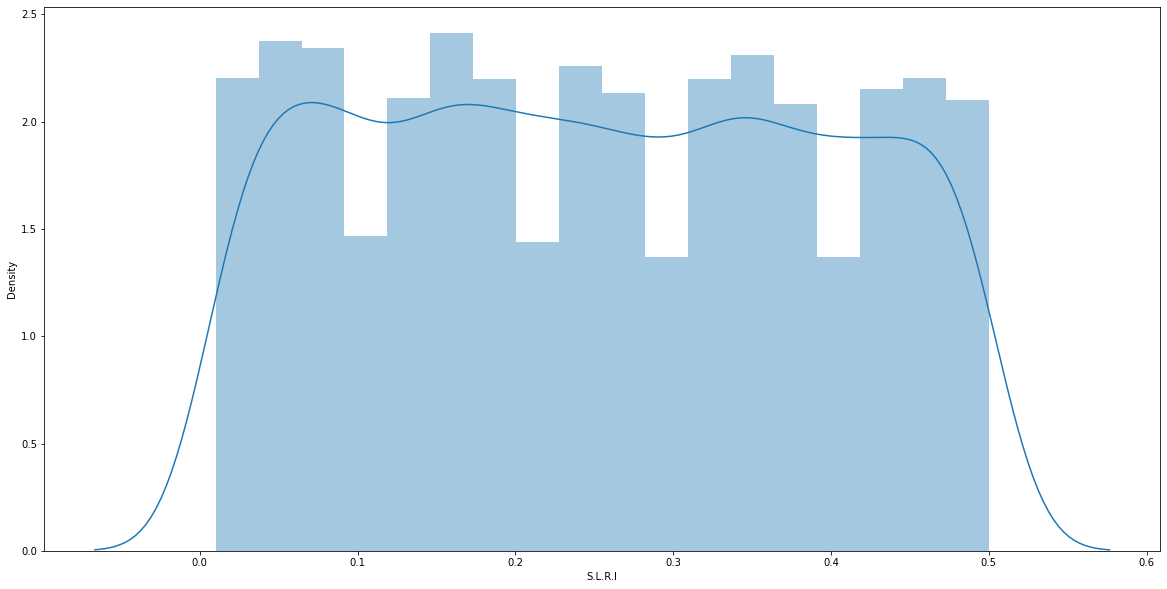

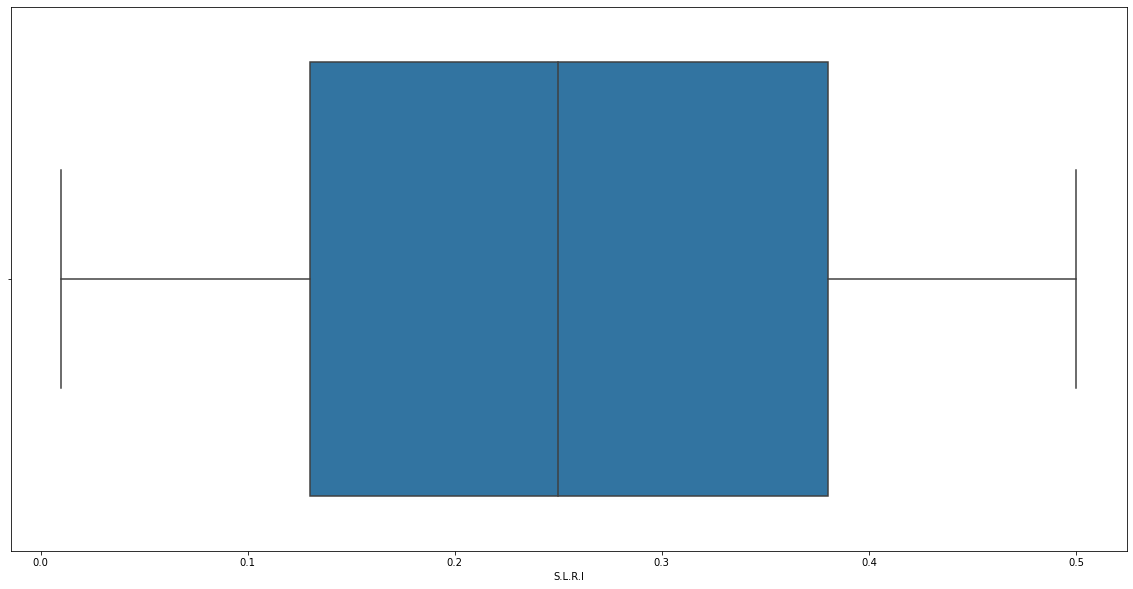

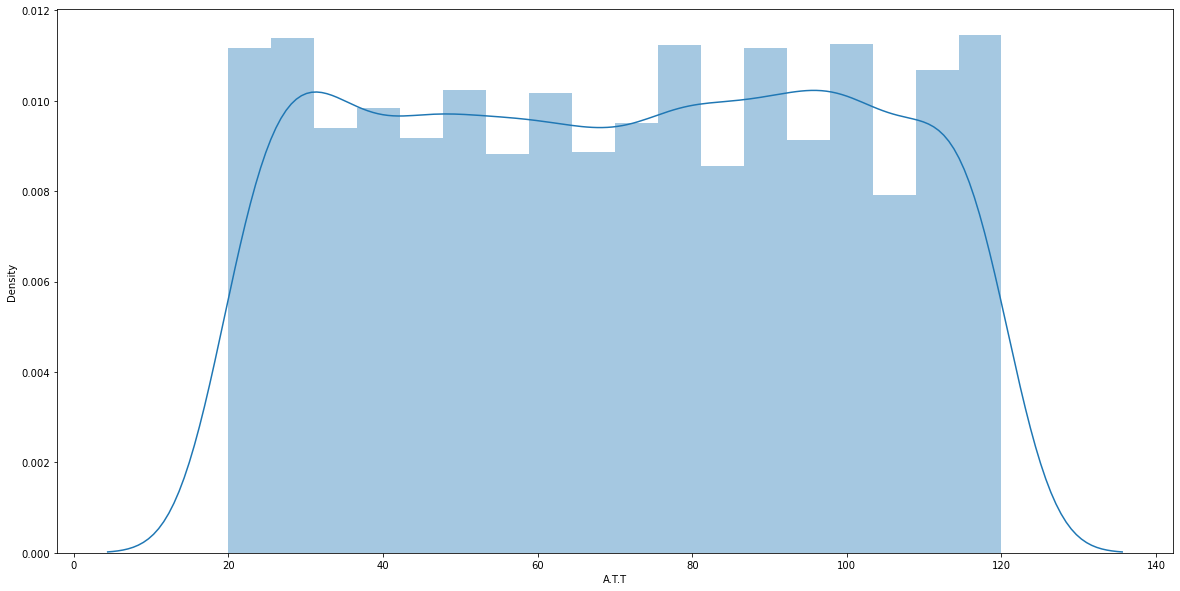

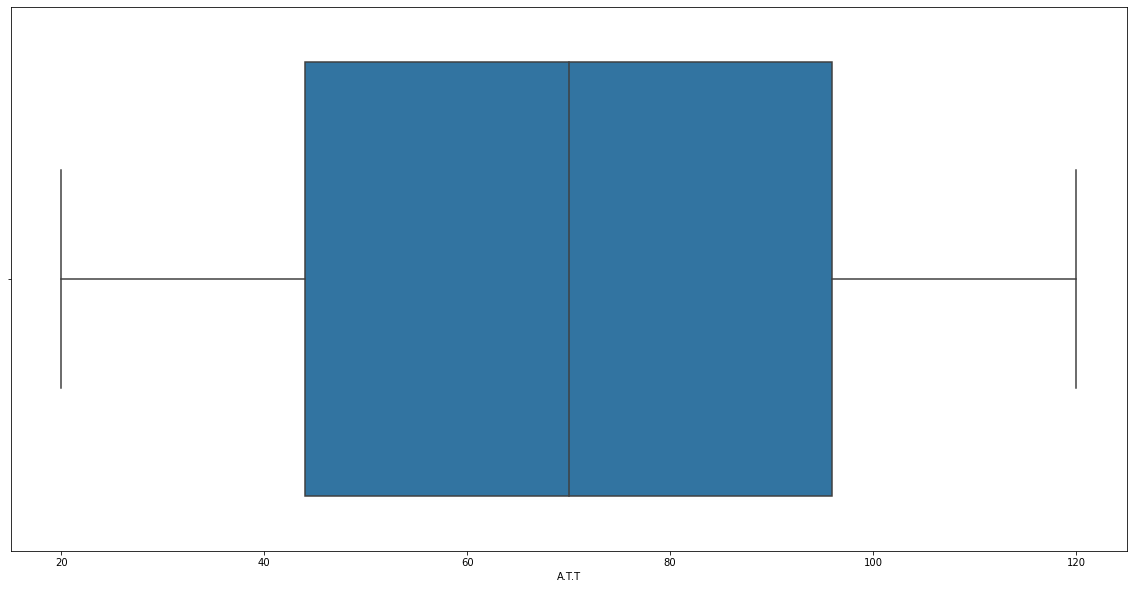

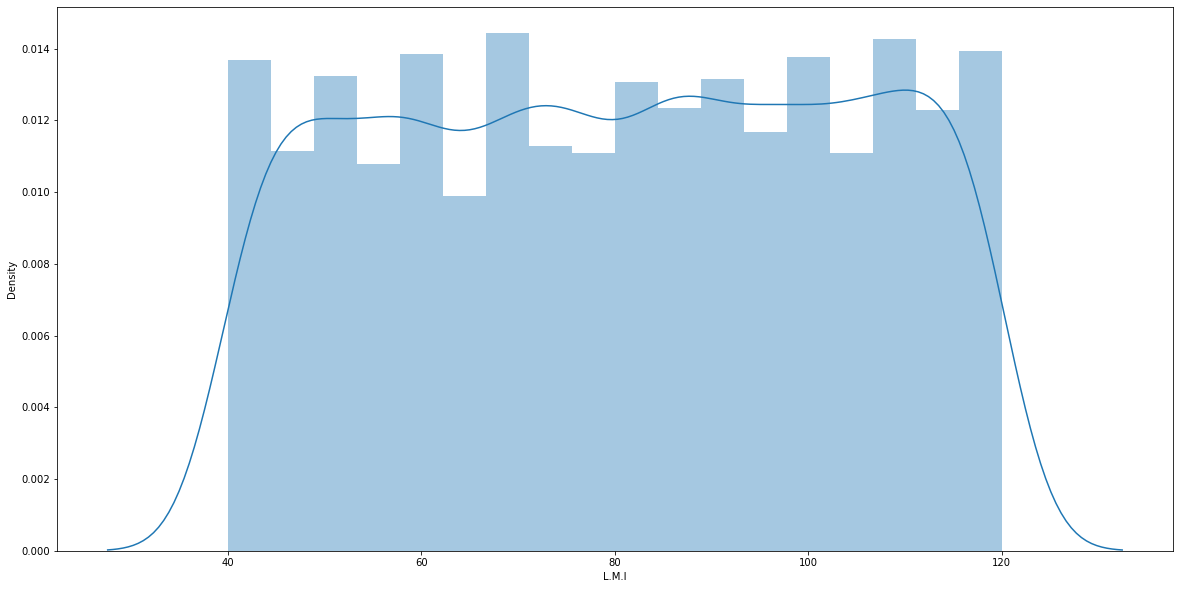

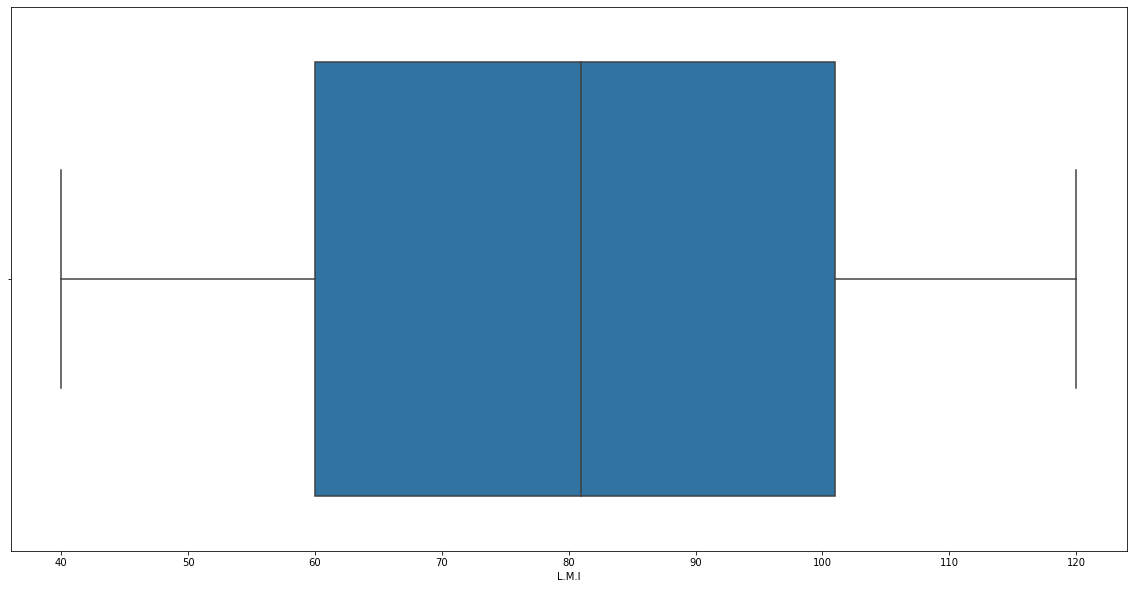

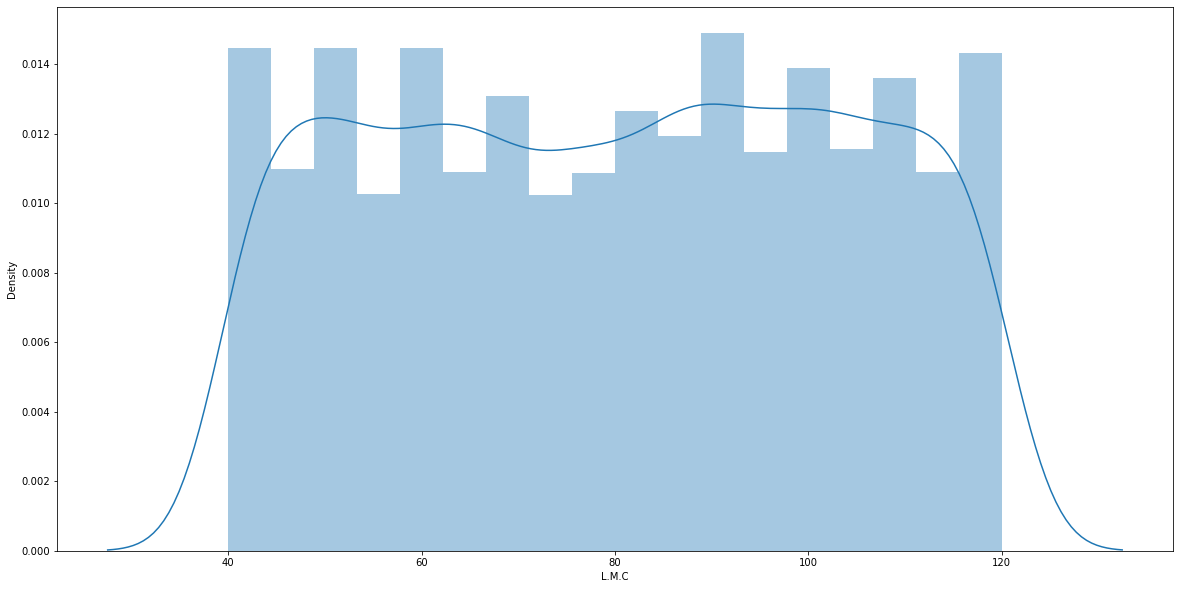

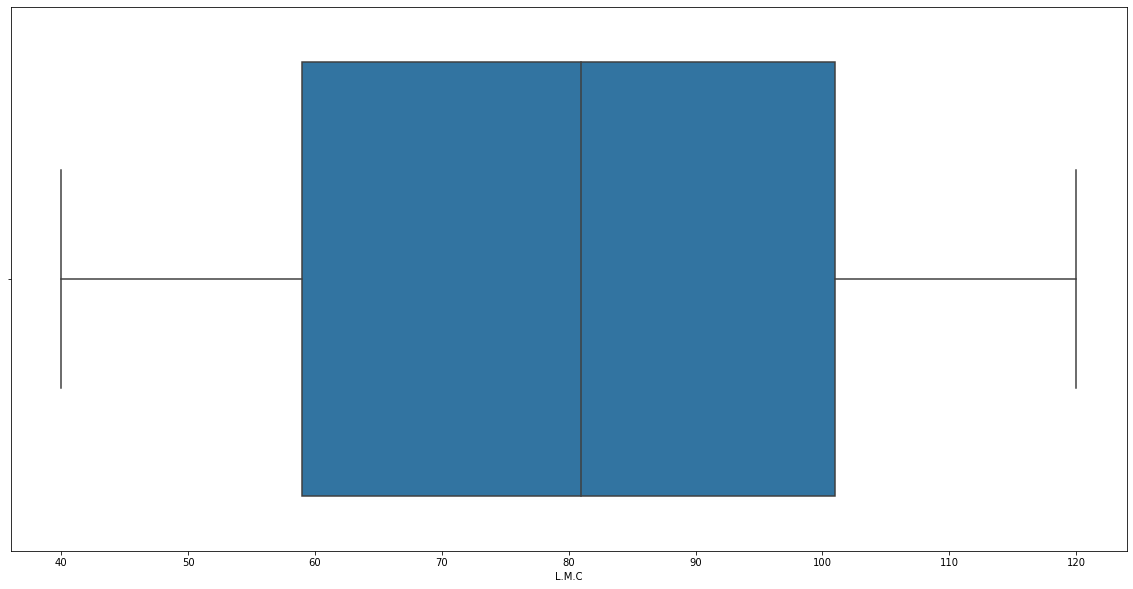

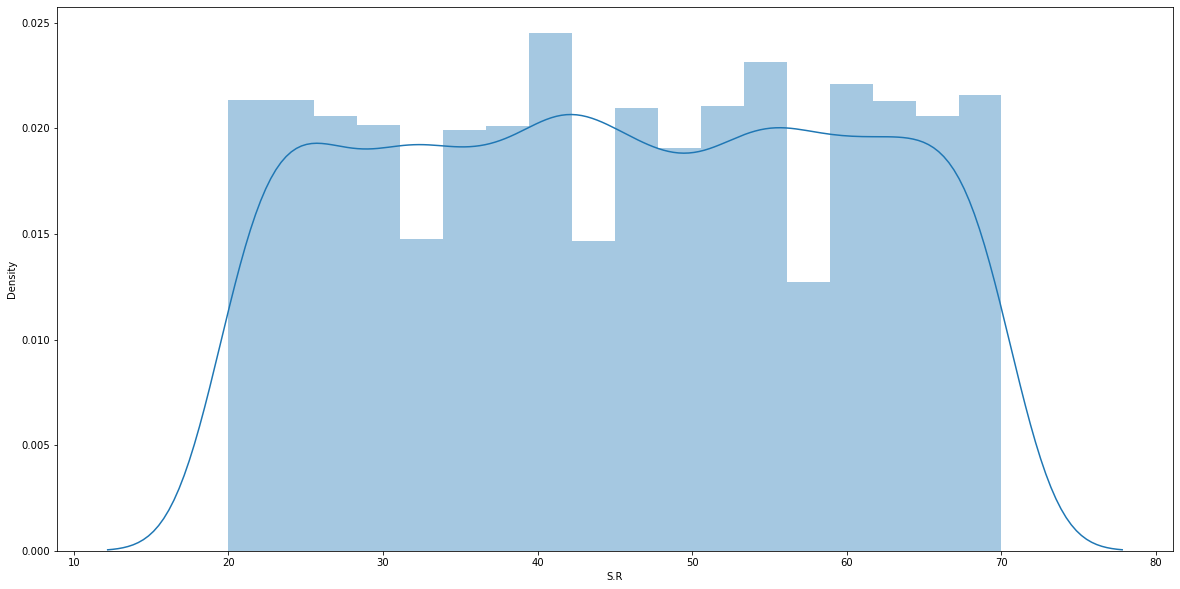

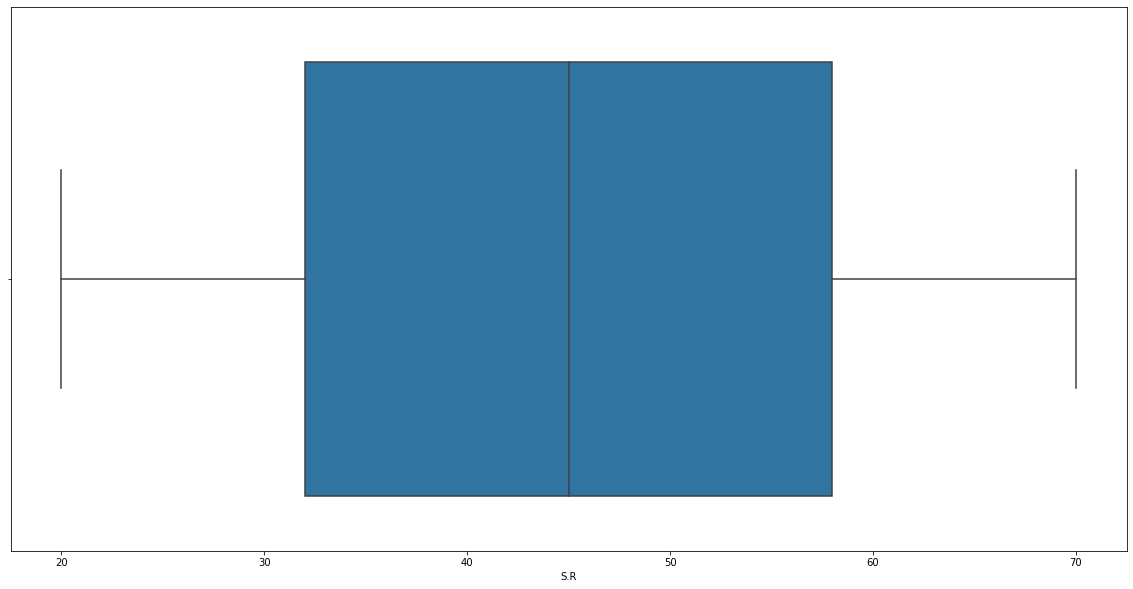

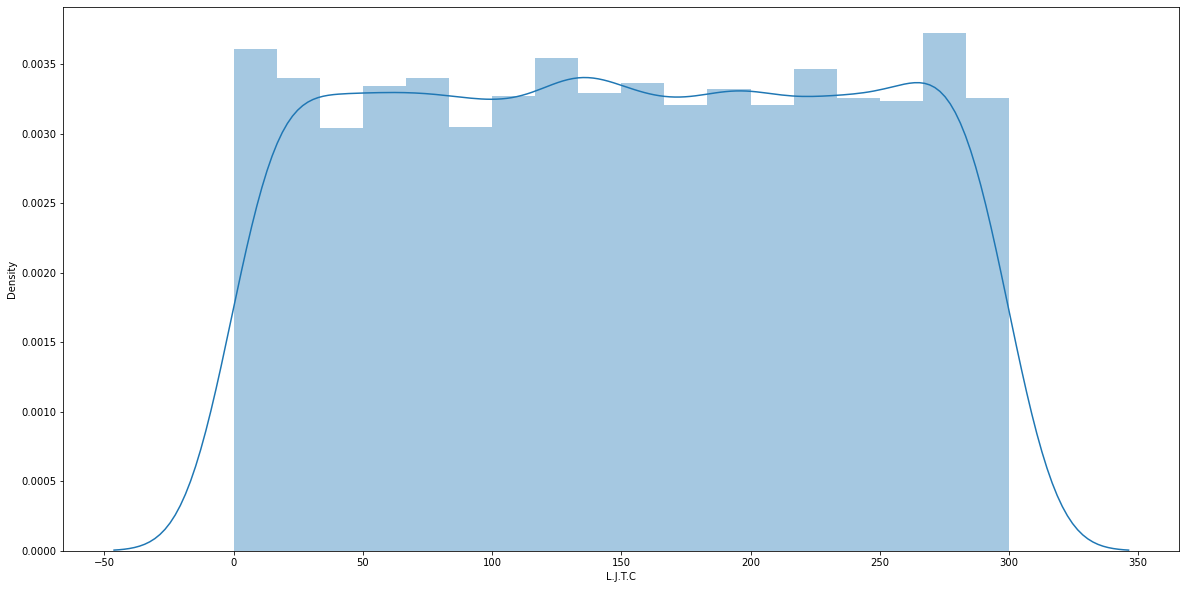

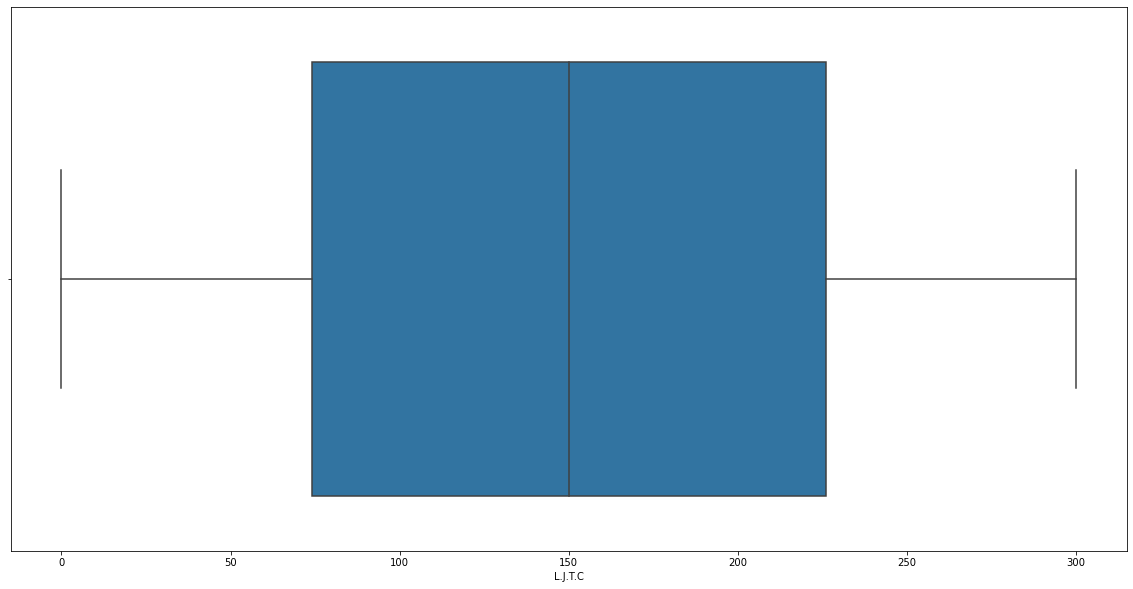

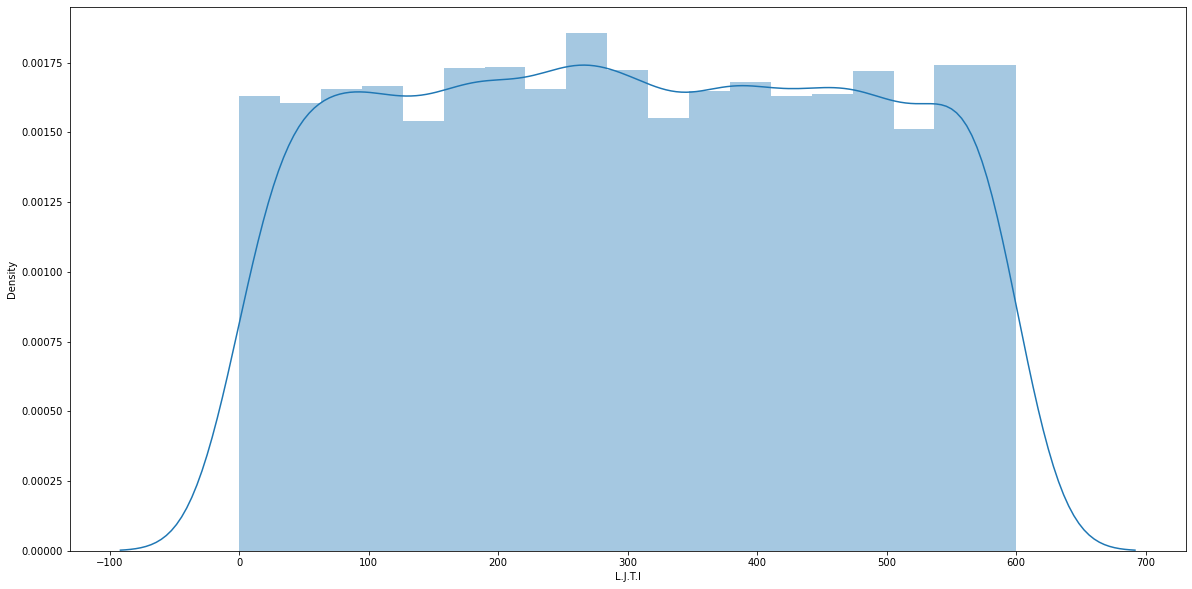

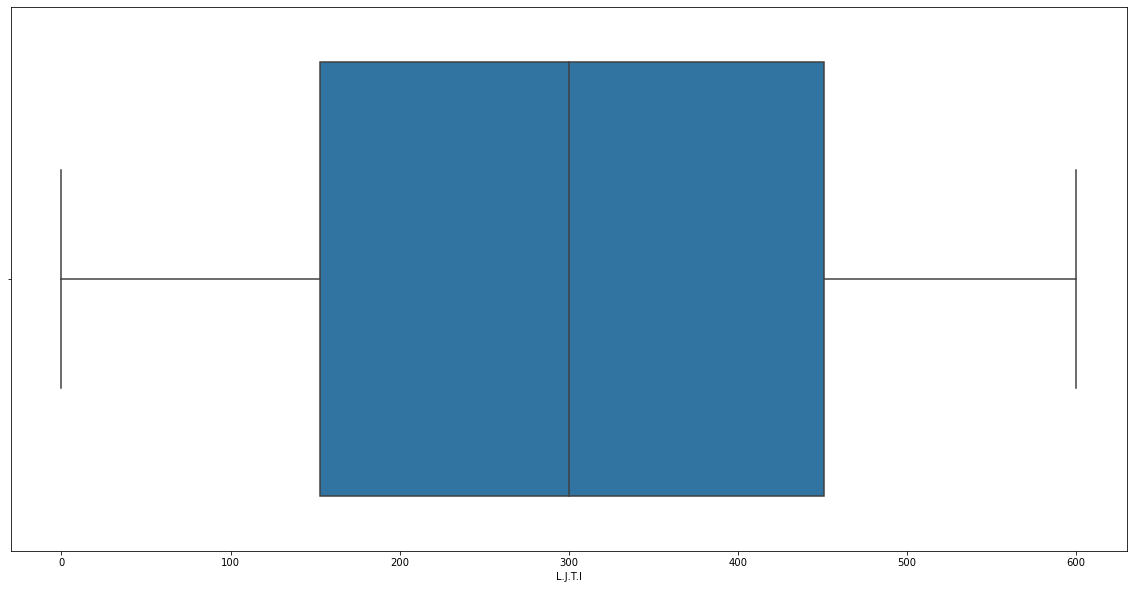

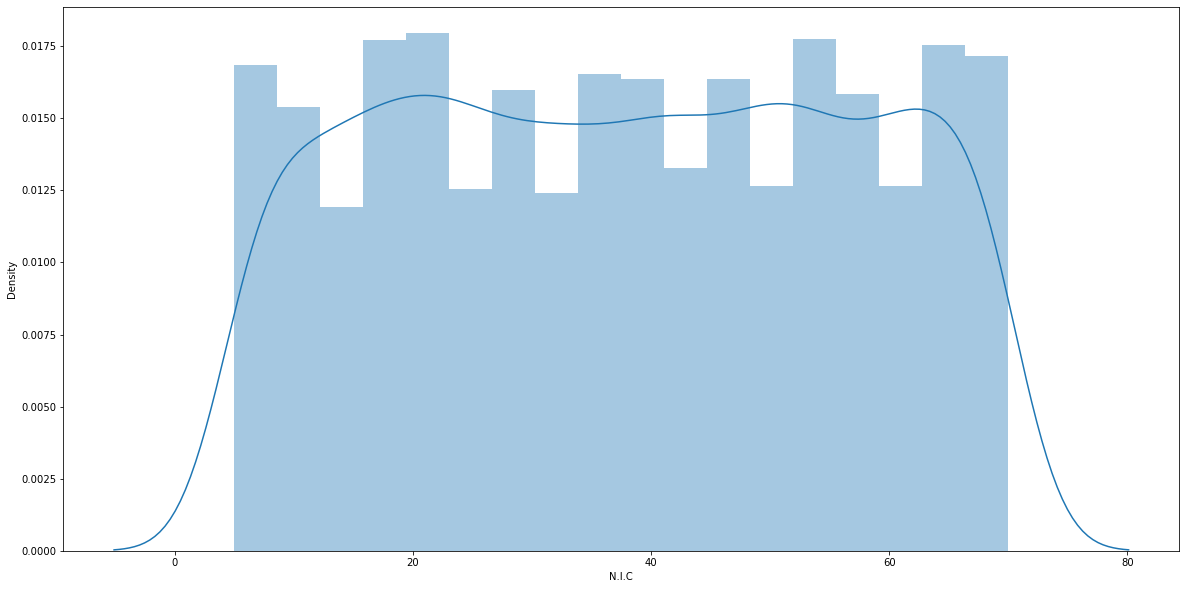

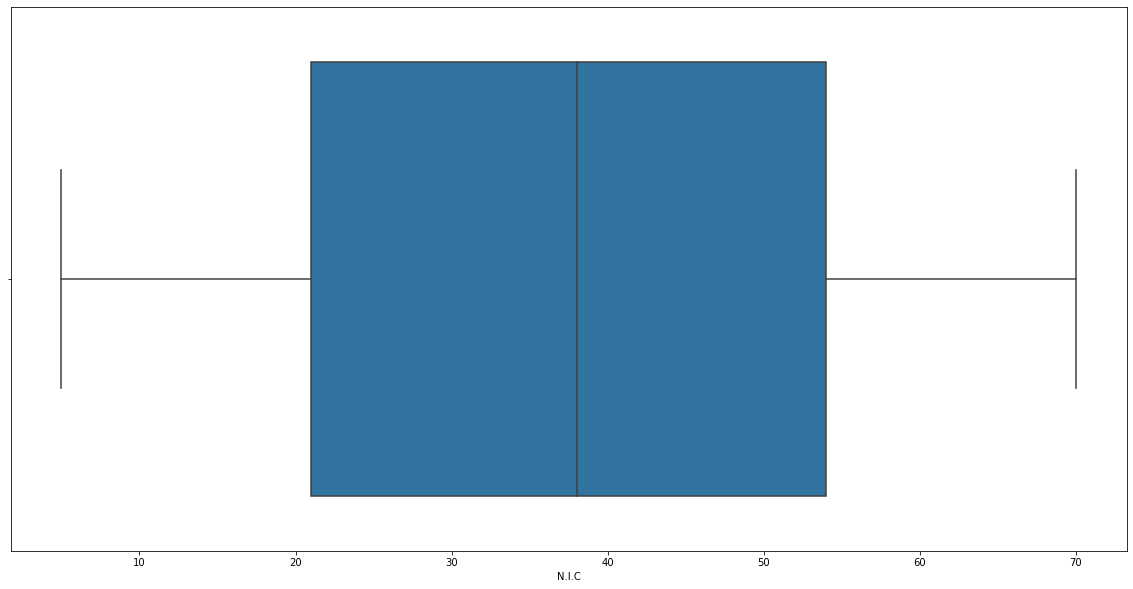

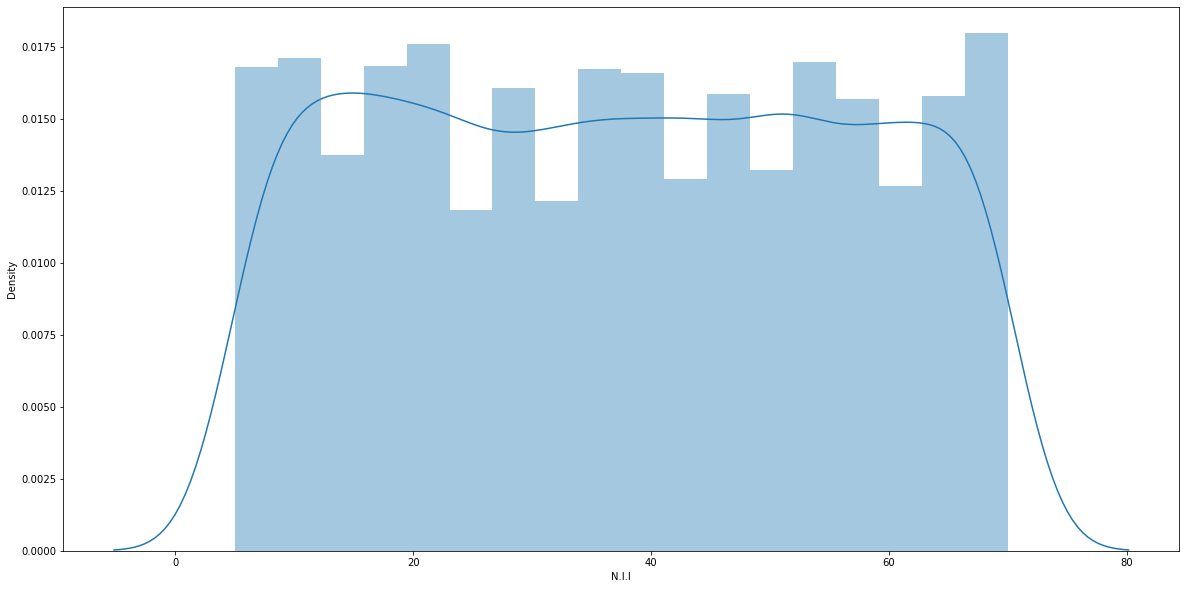

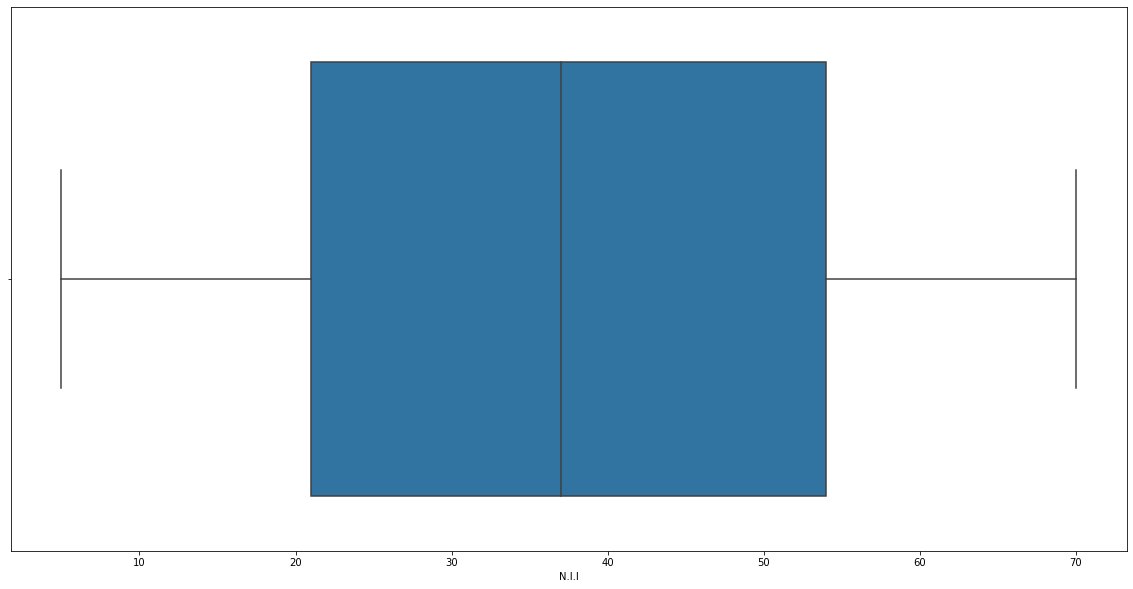

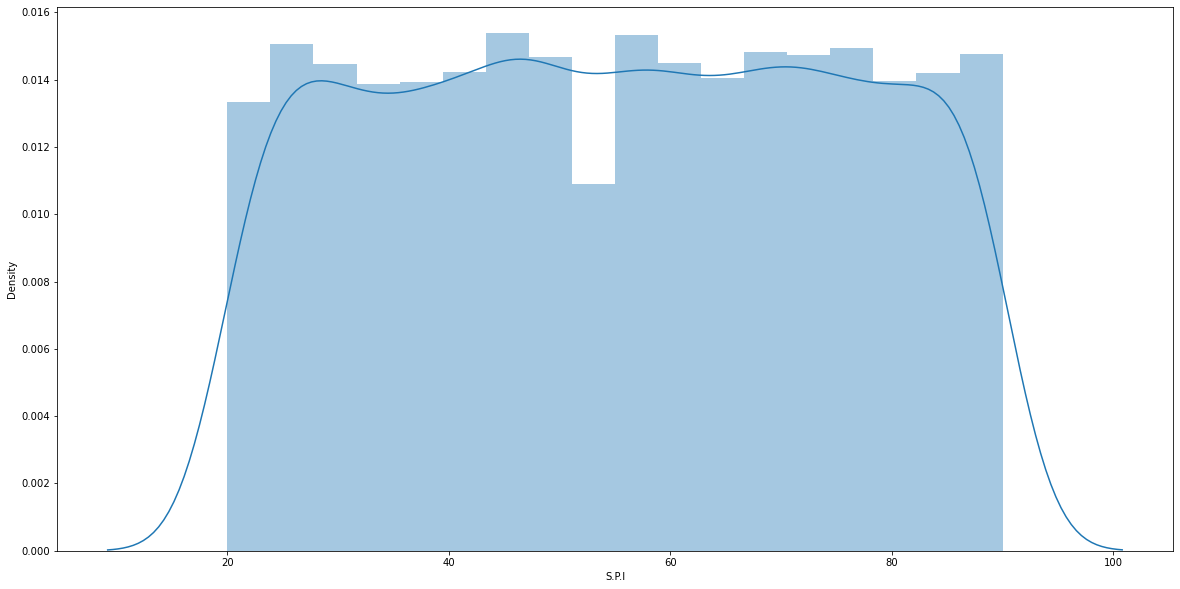

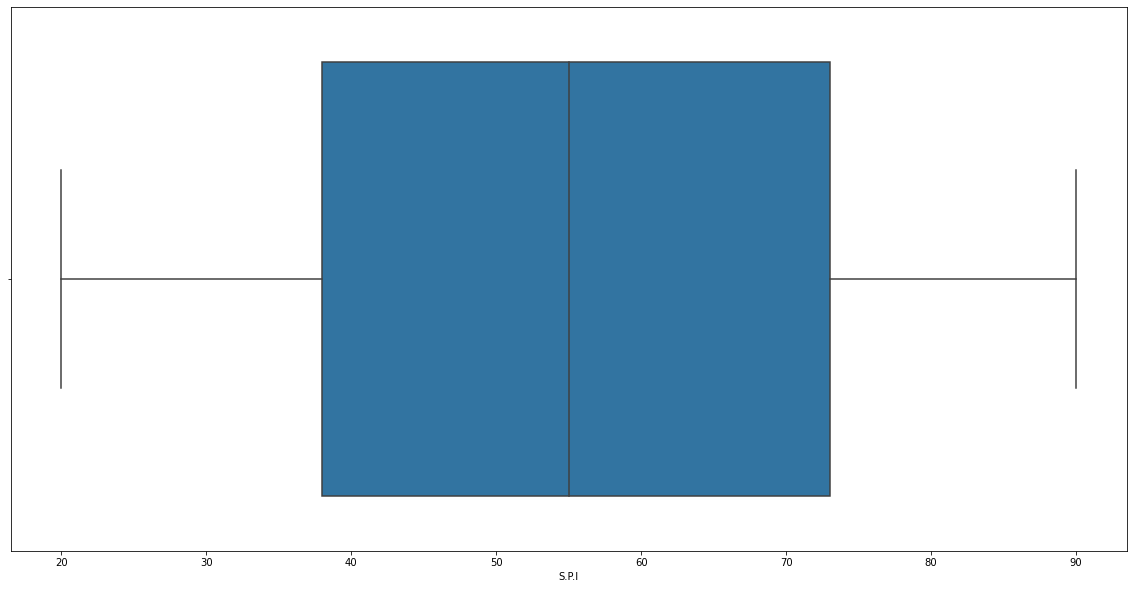

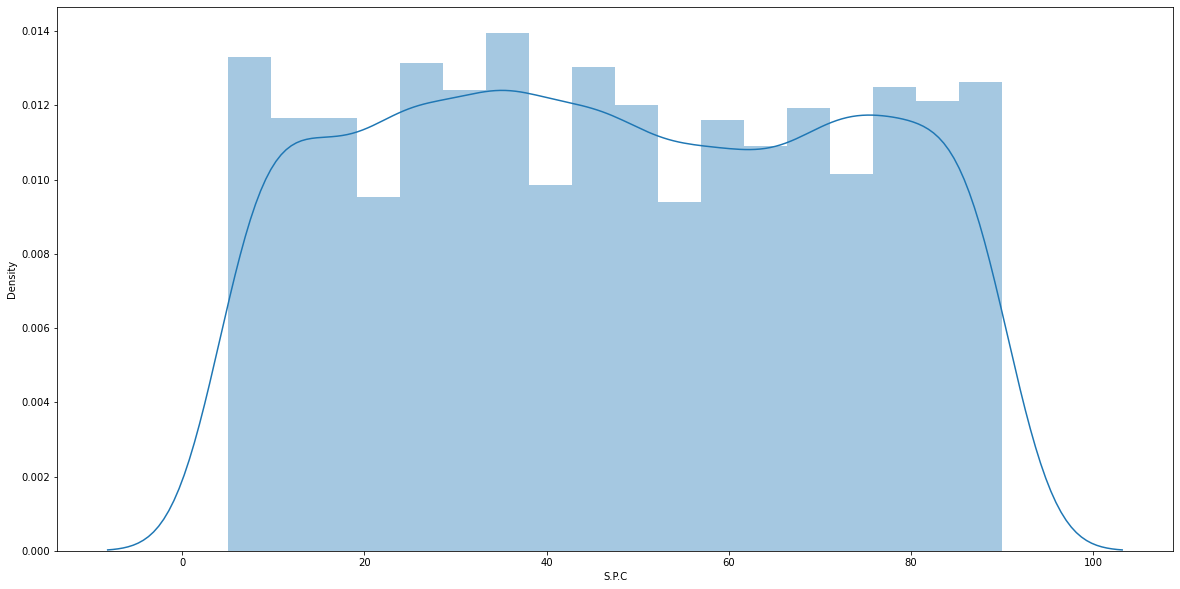

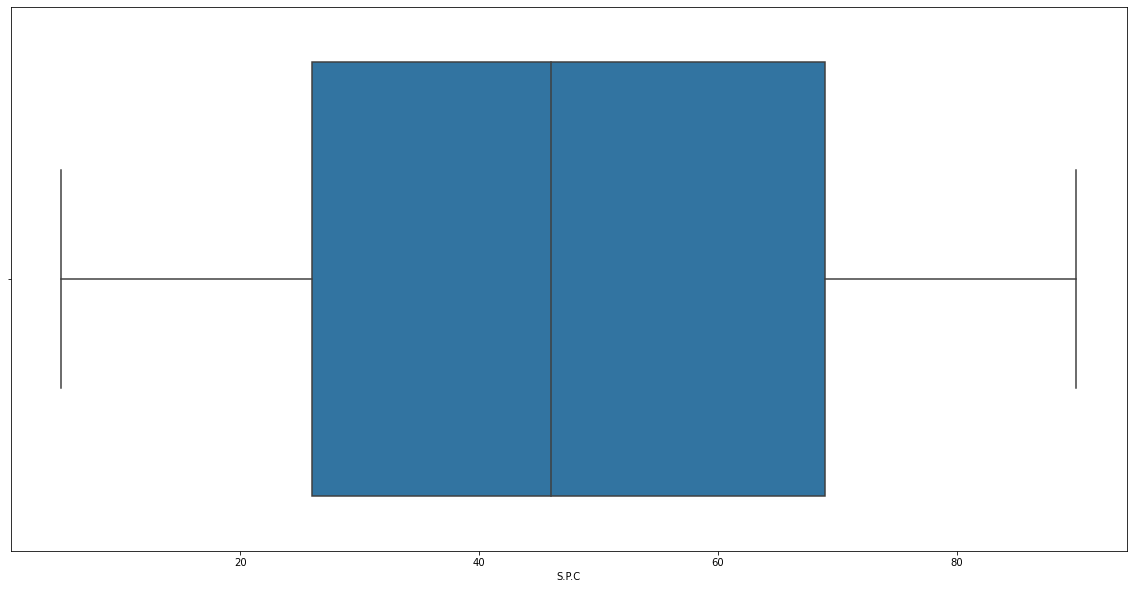

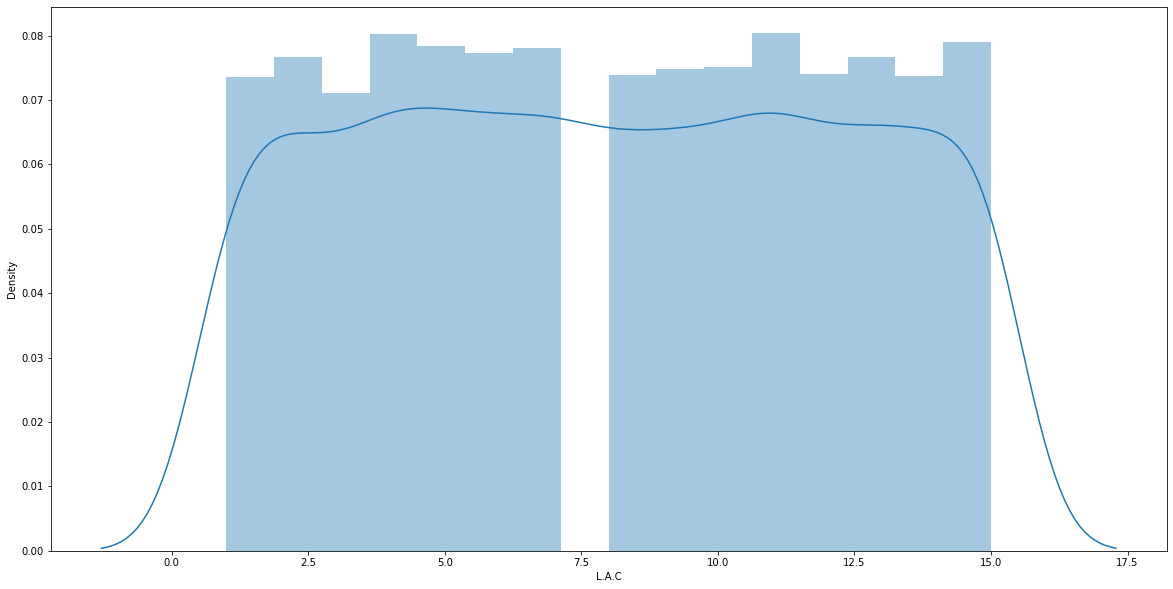

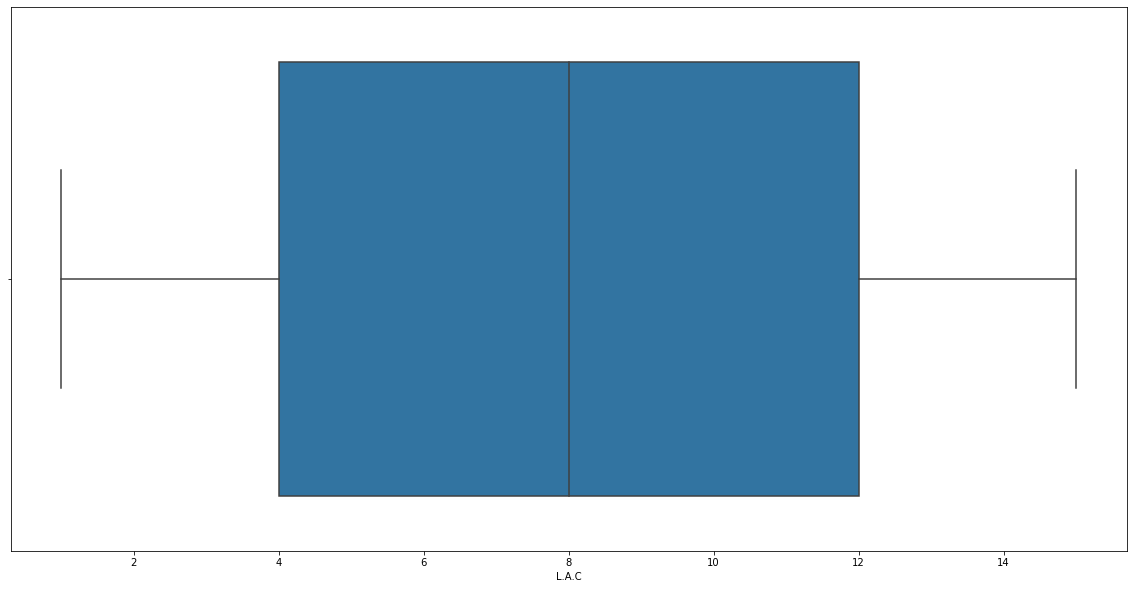

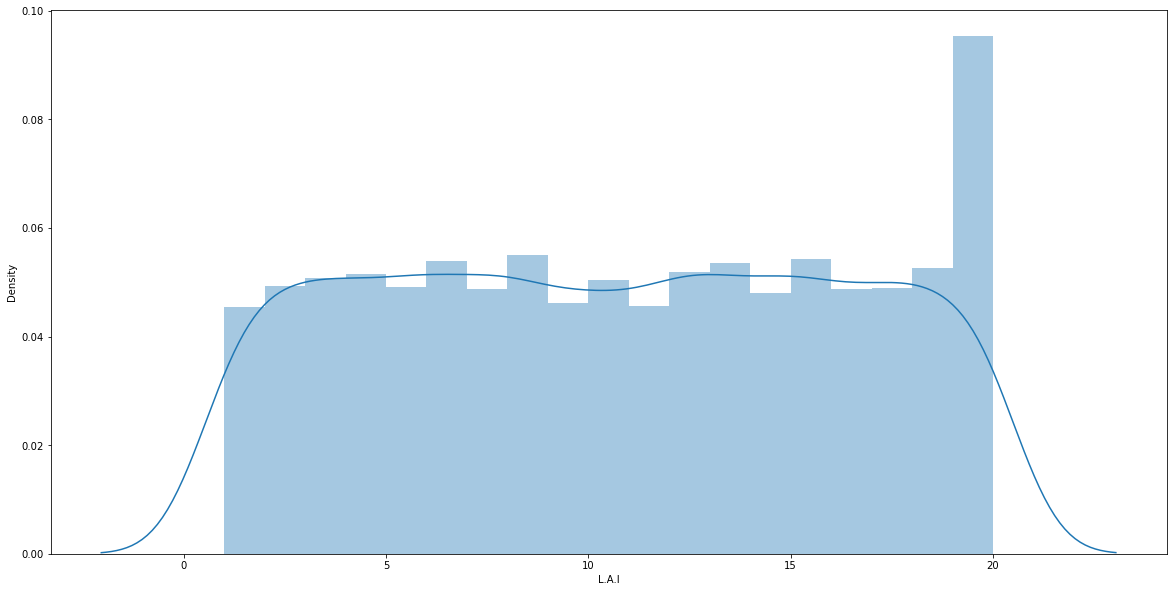

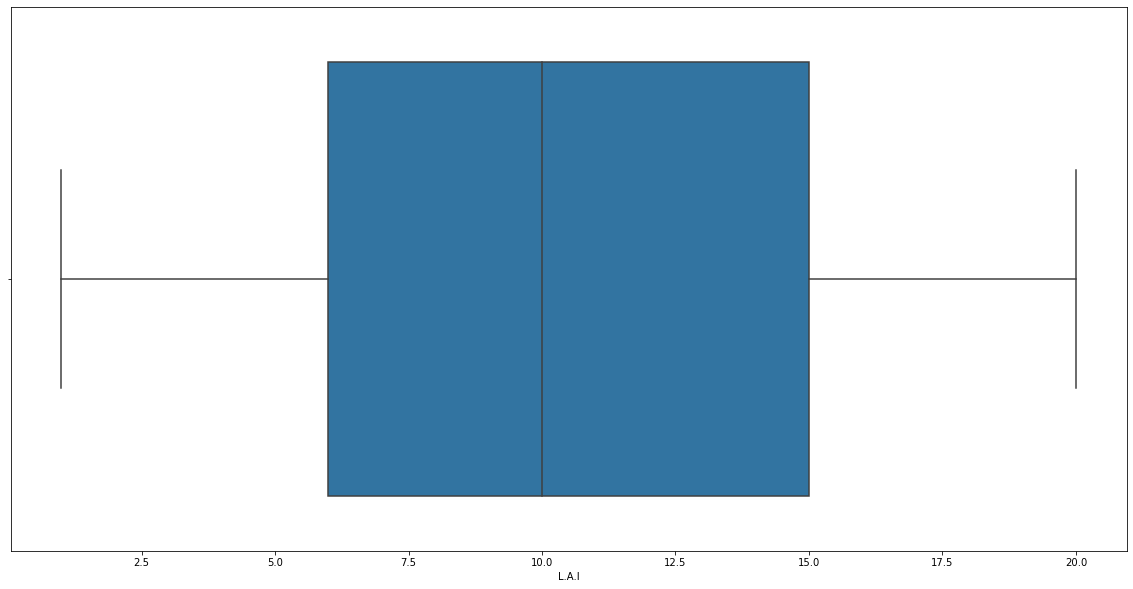

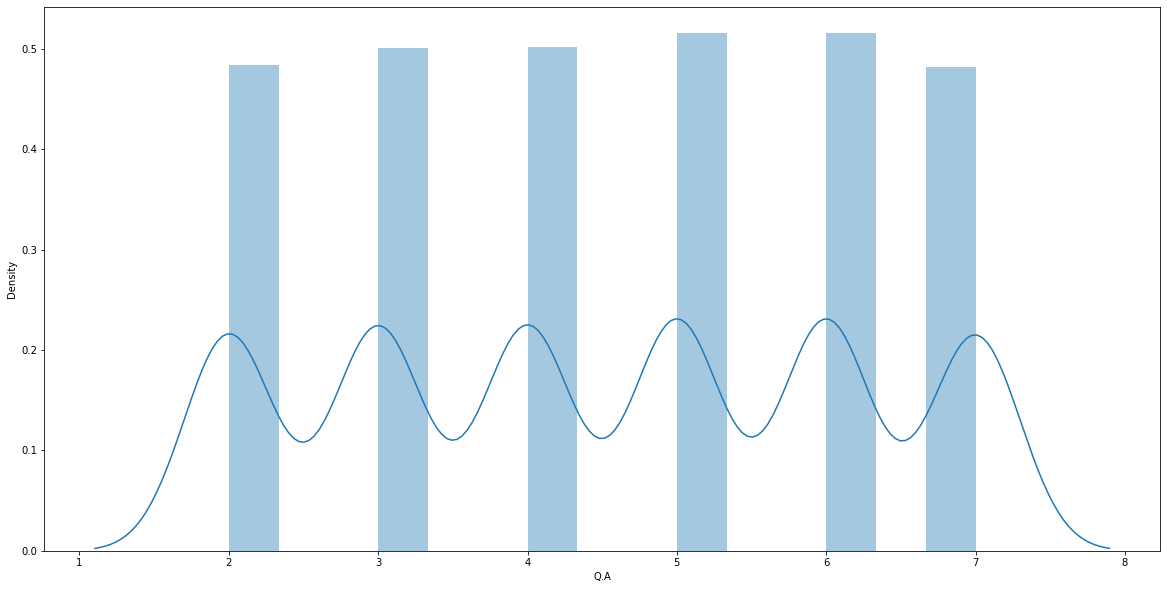

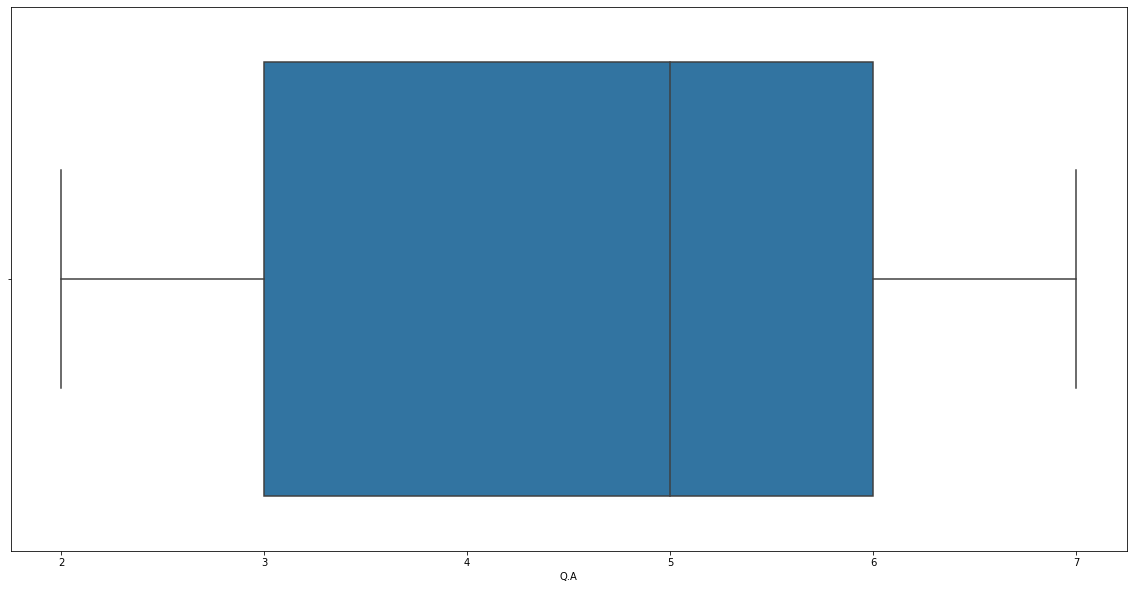

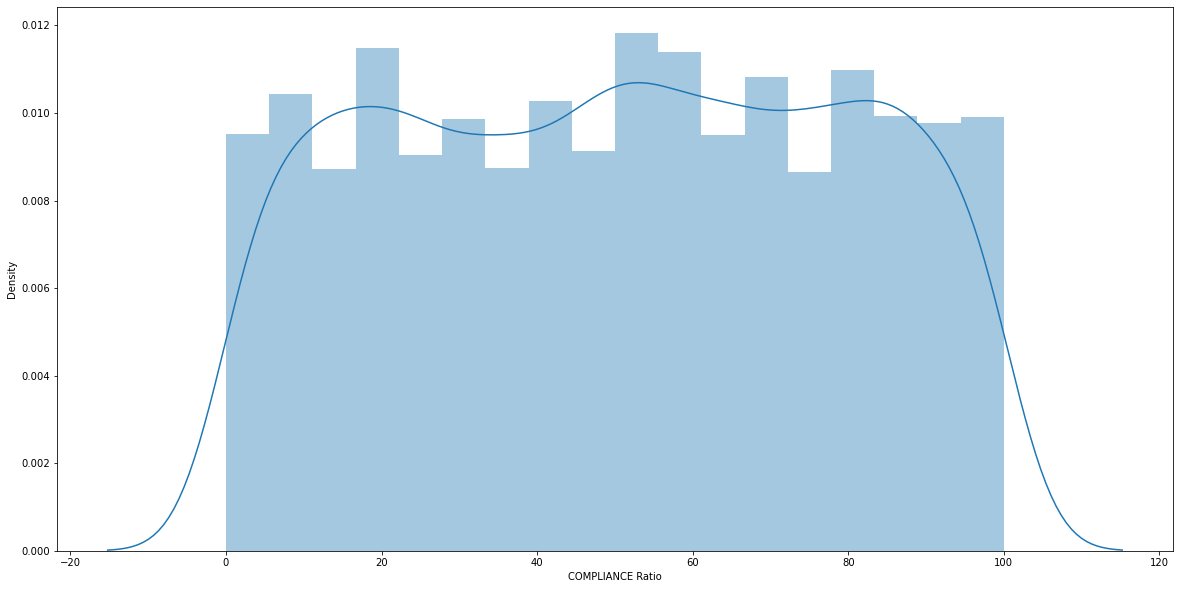

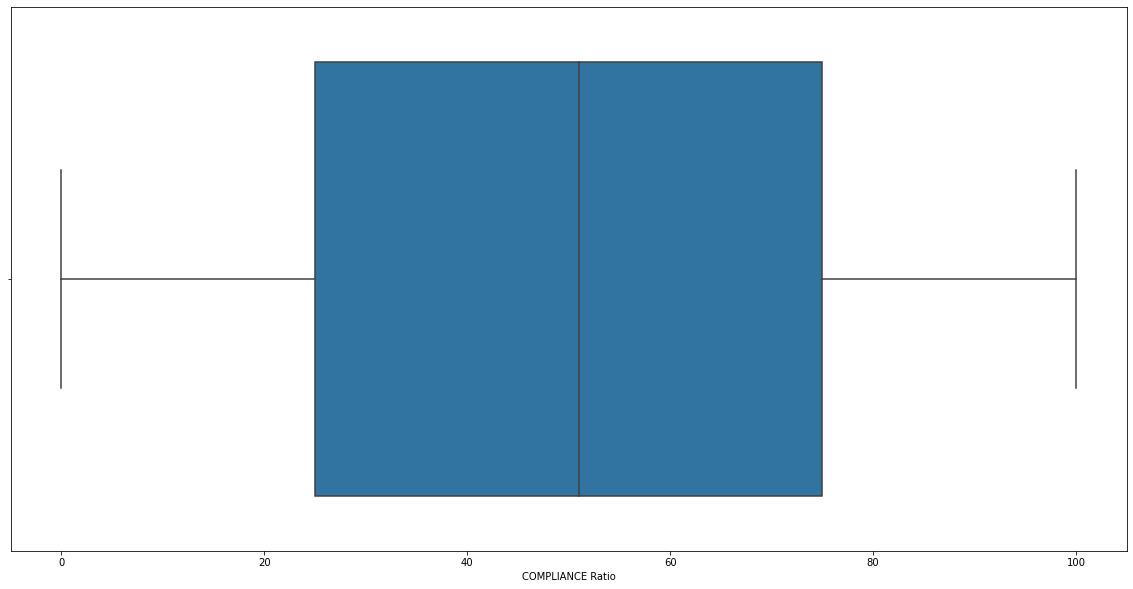

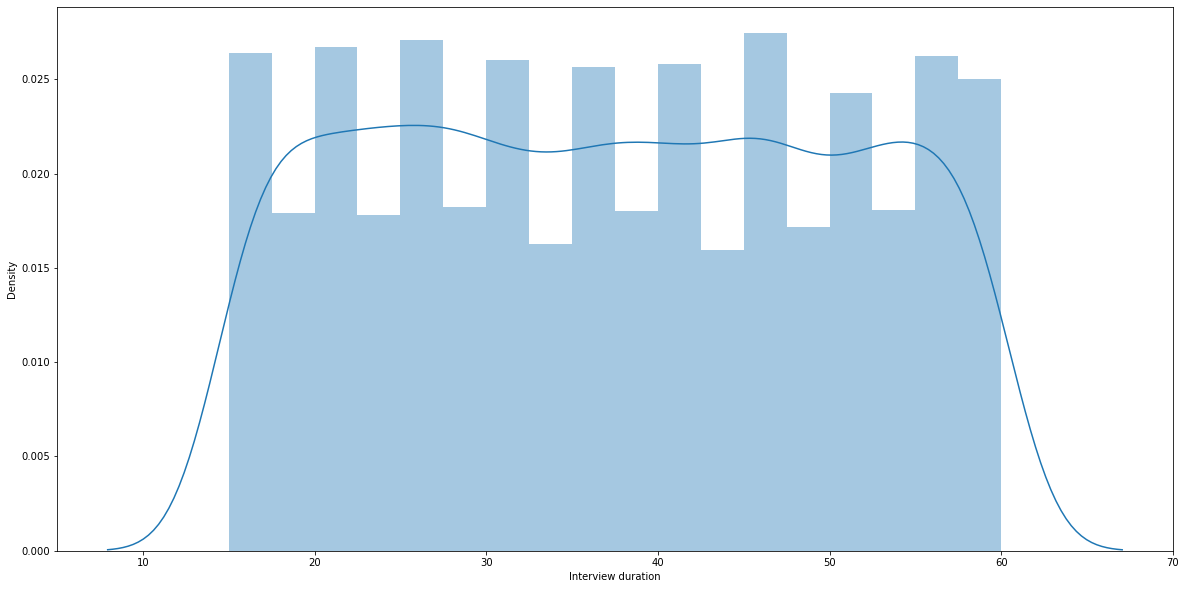

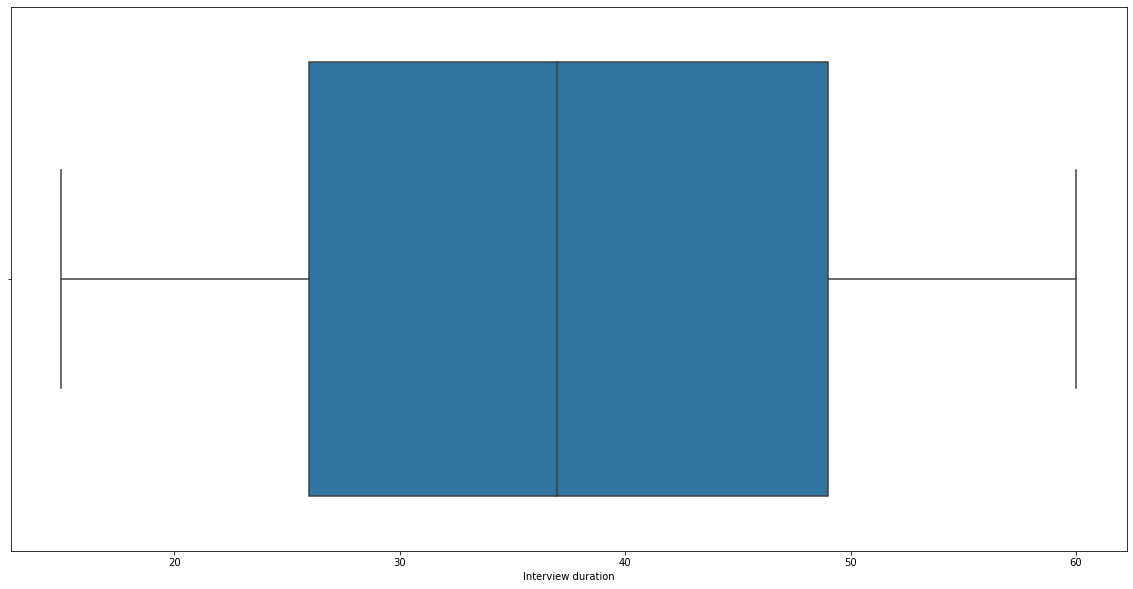

In [8]:
for i in df_num.columns:
    sns.distplot(df_num[i])
    plt.show()
    sns.boxplot(df_num[i])
    plt.show()

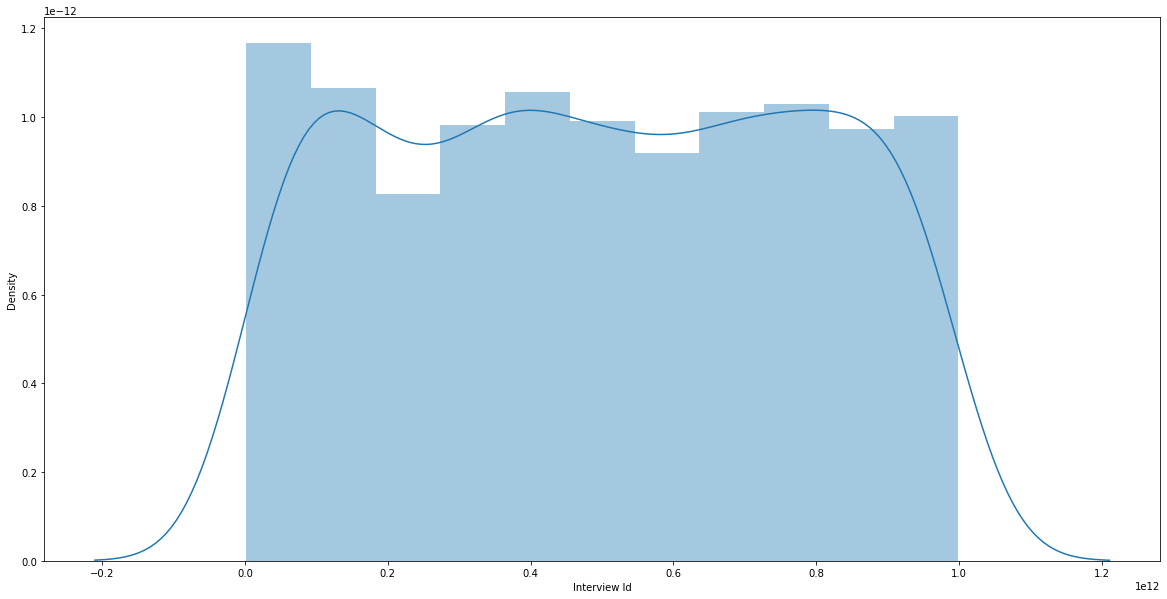

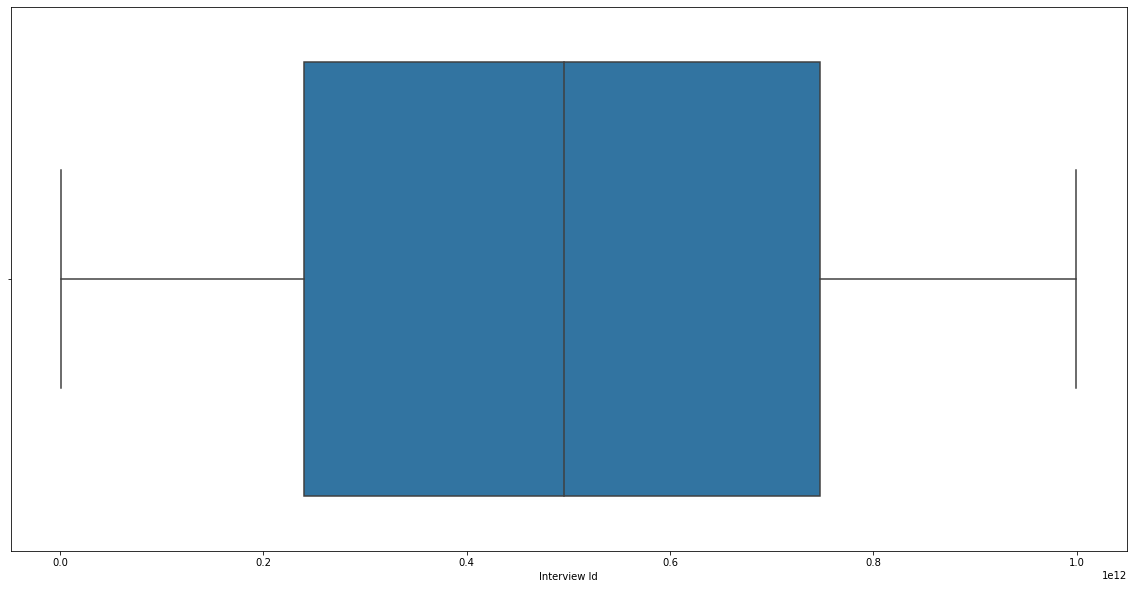

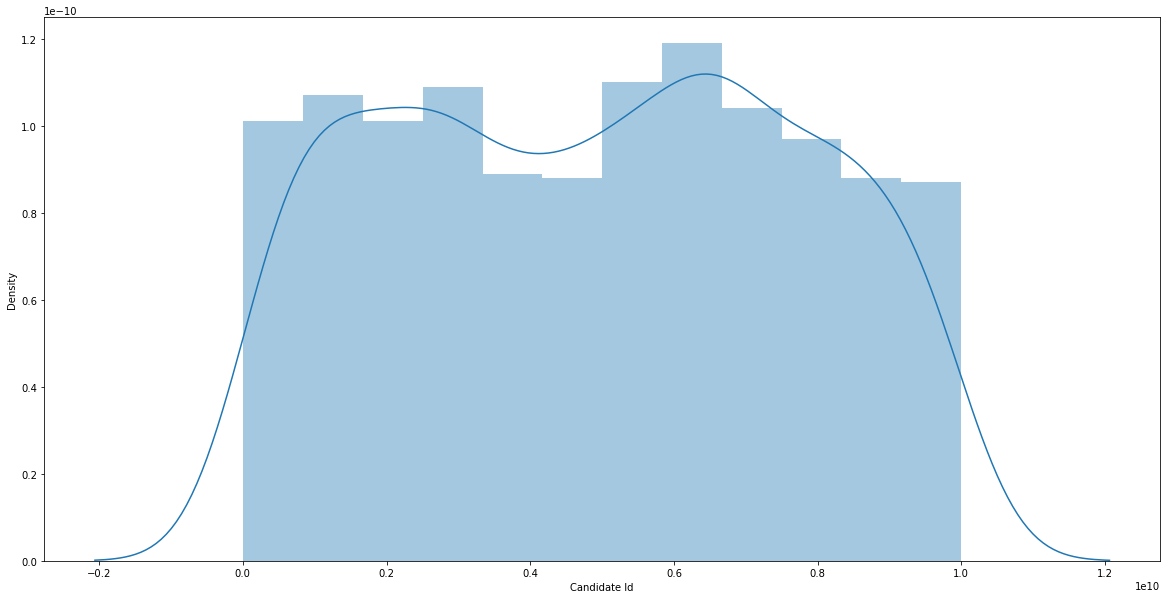

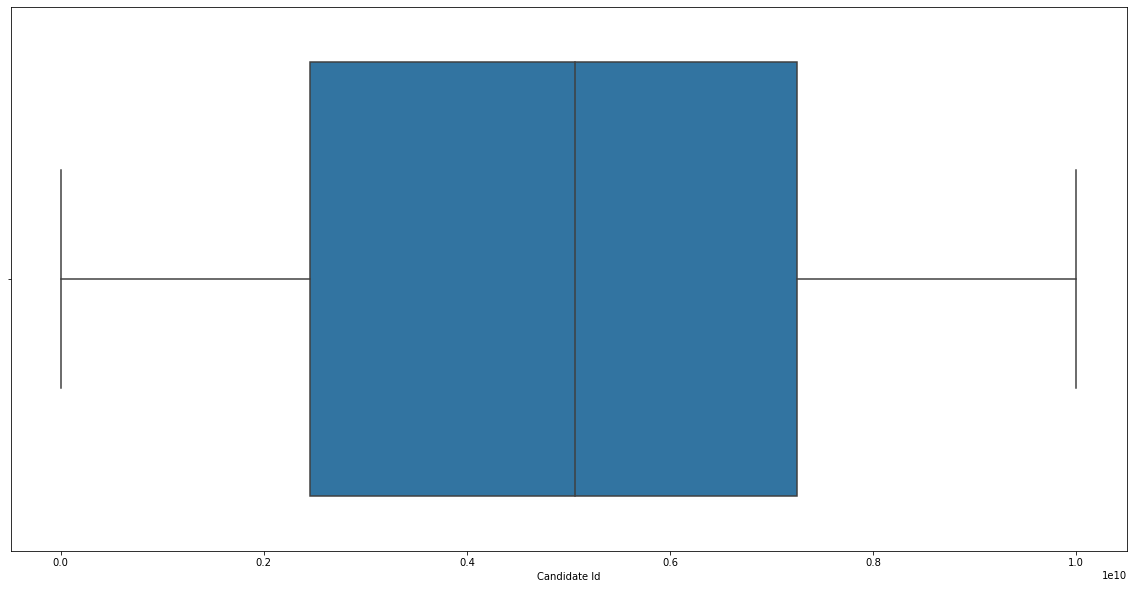

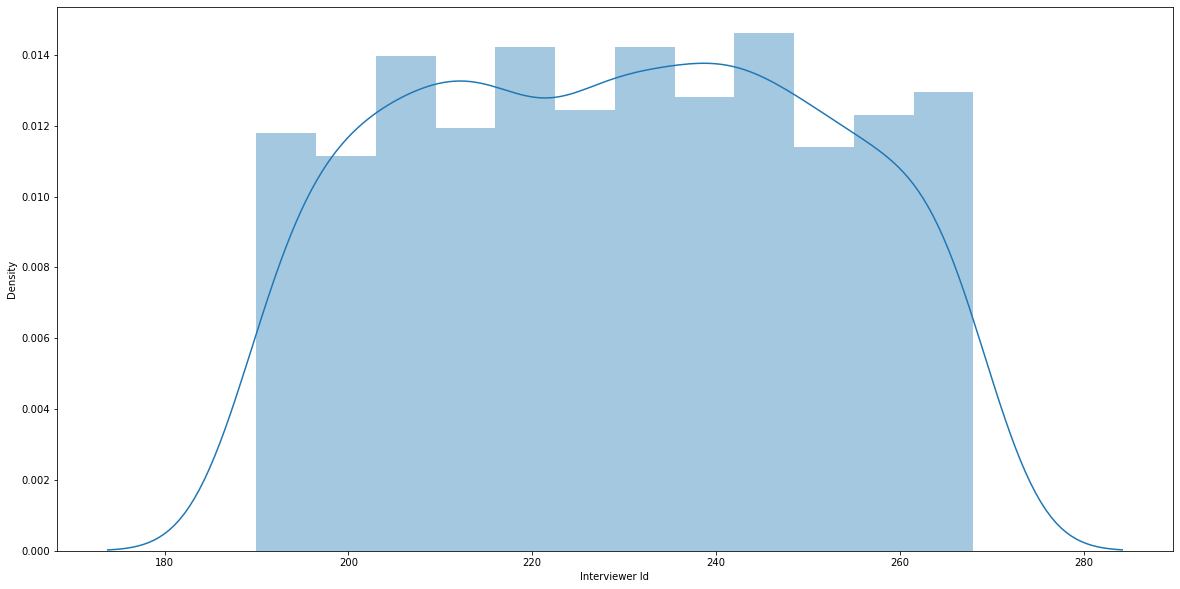

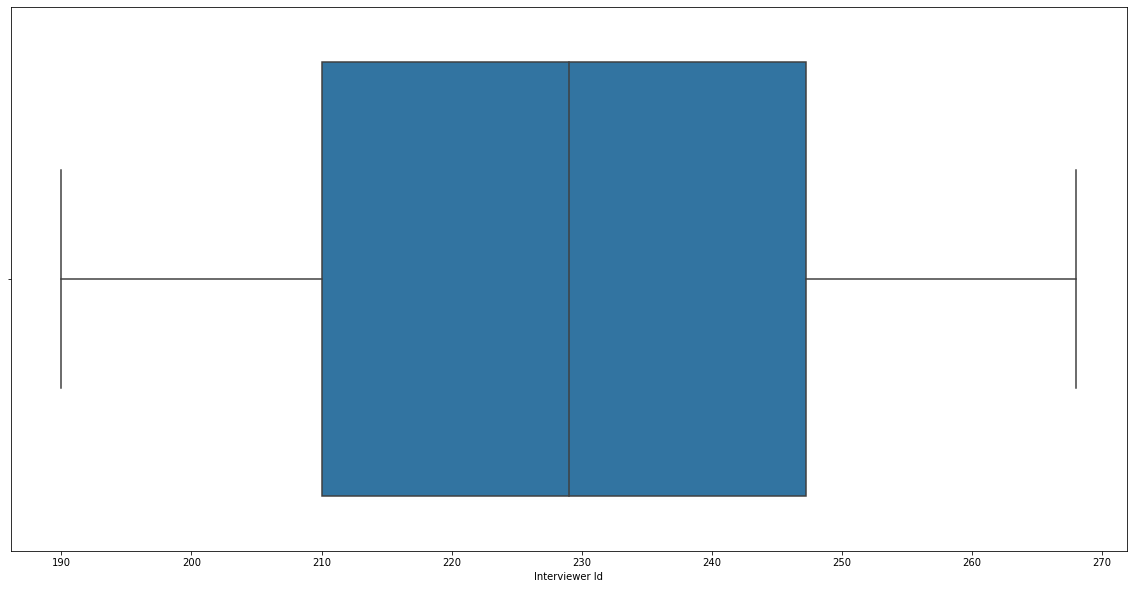

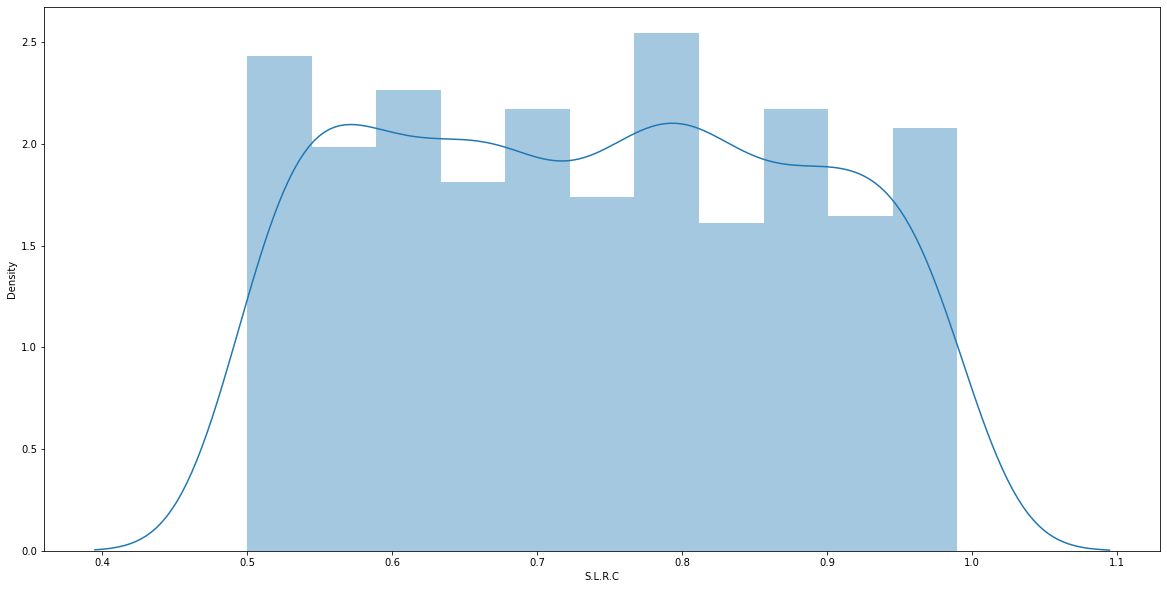

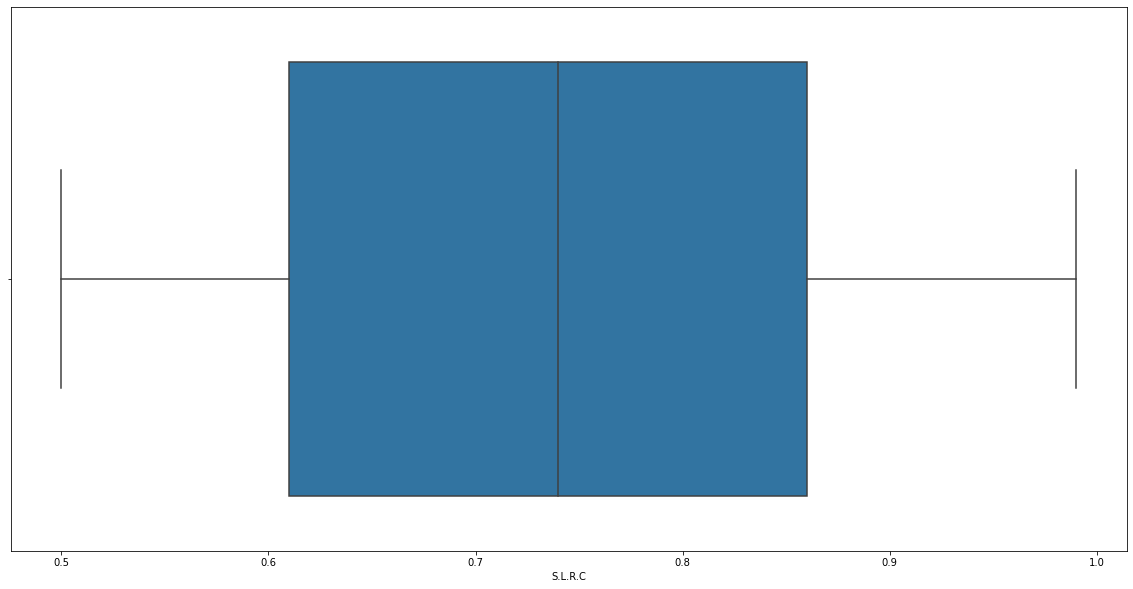

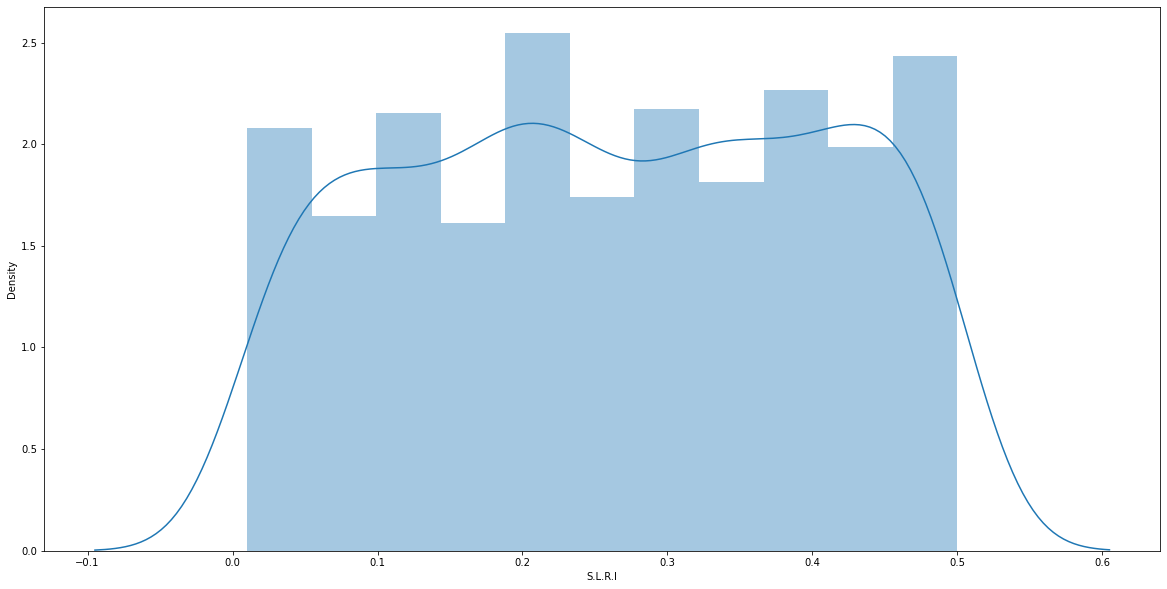

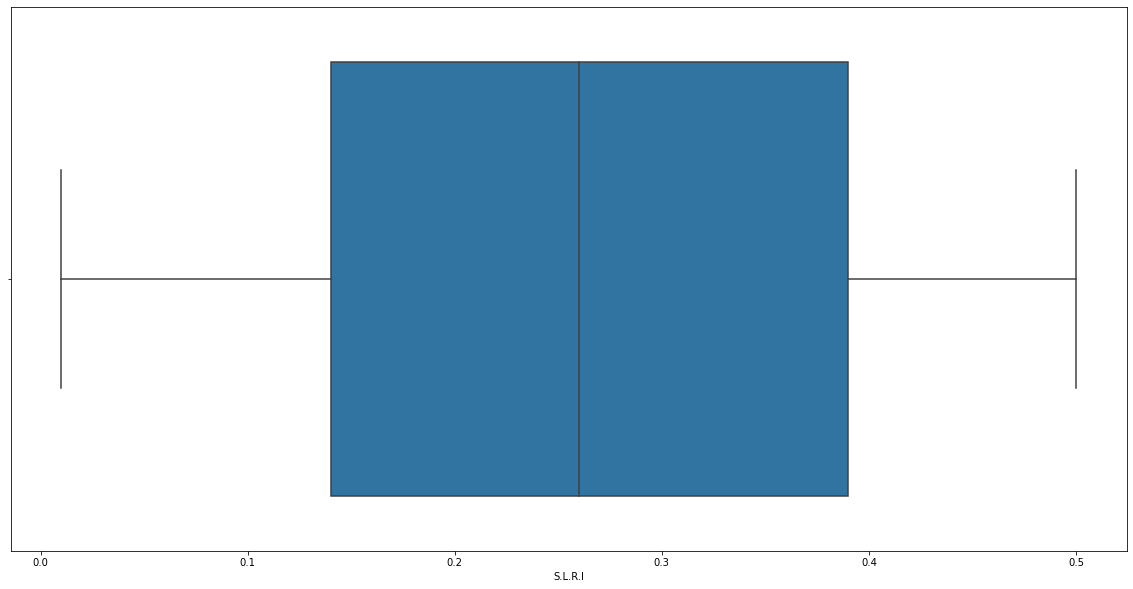

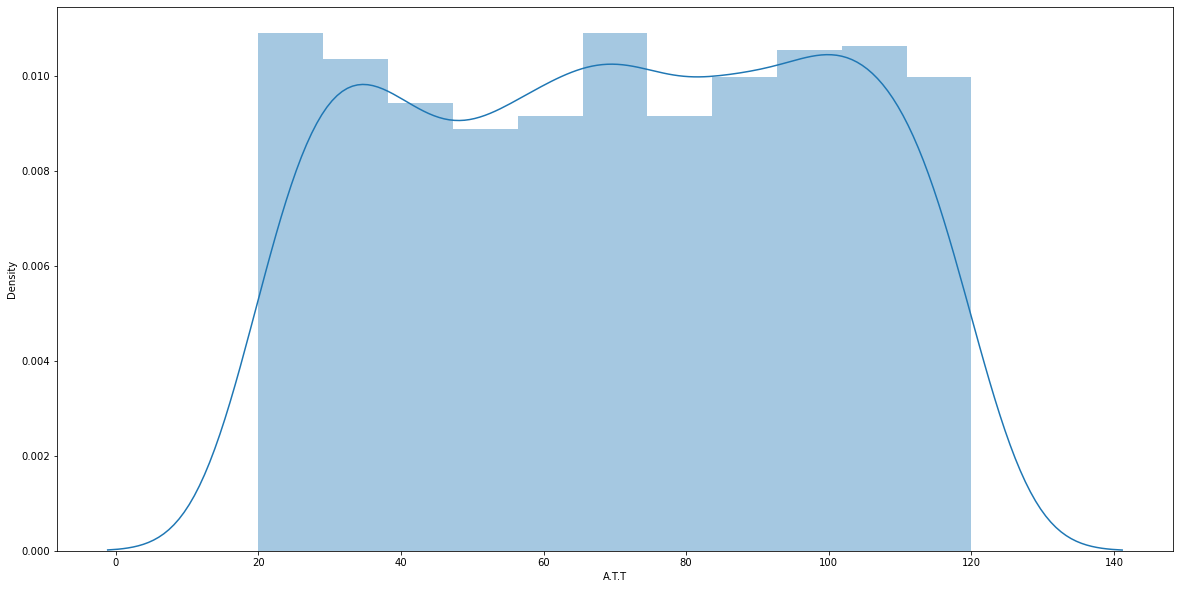

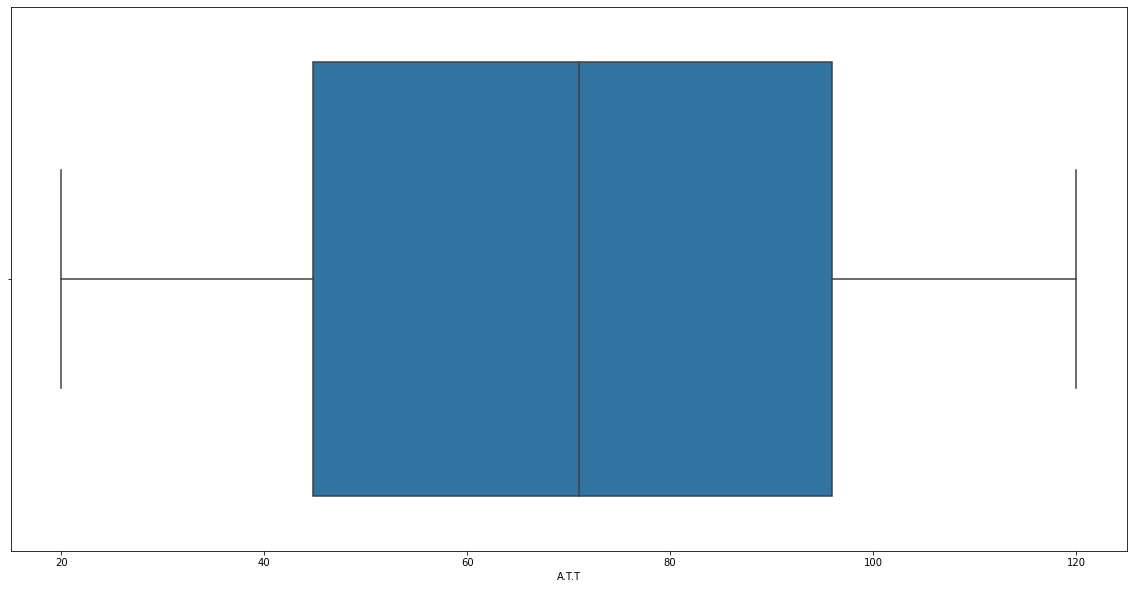

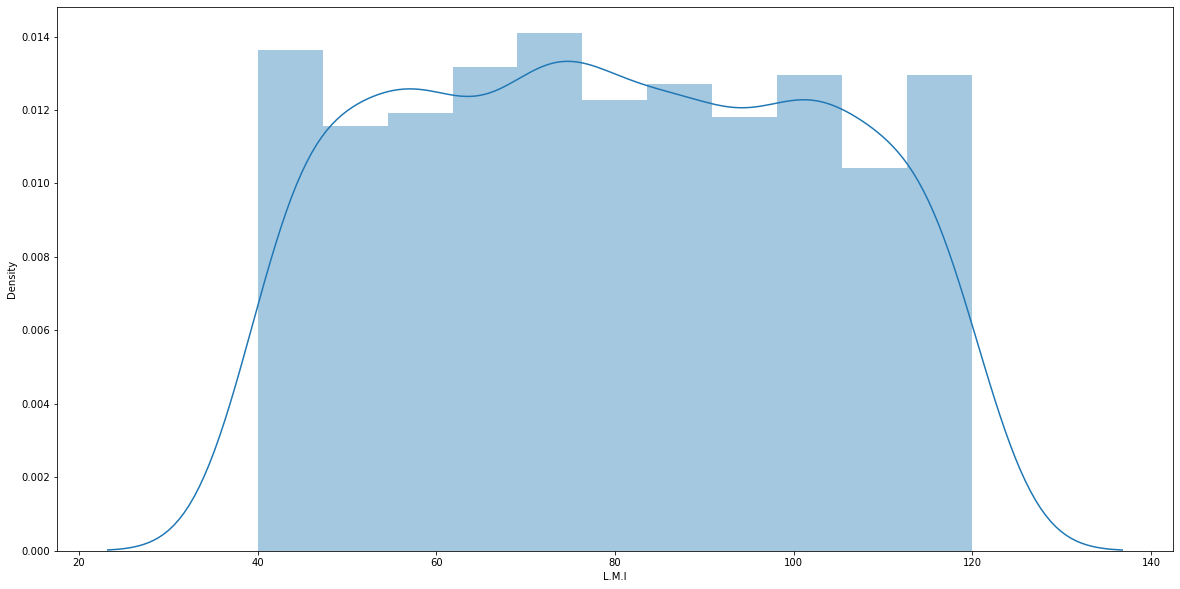

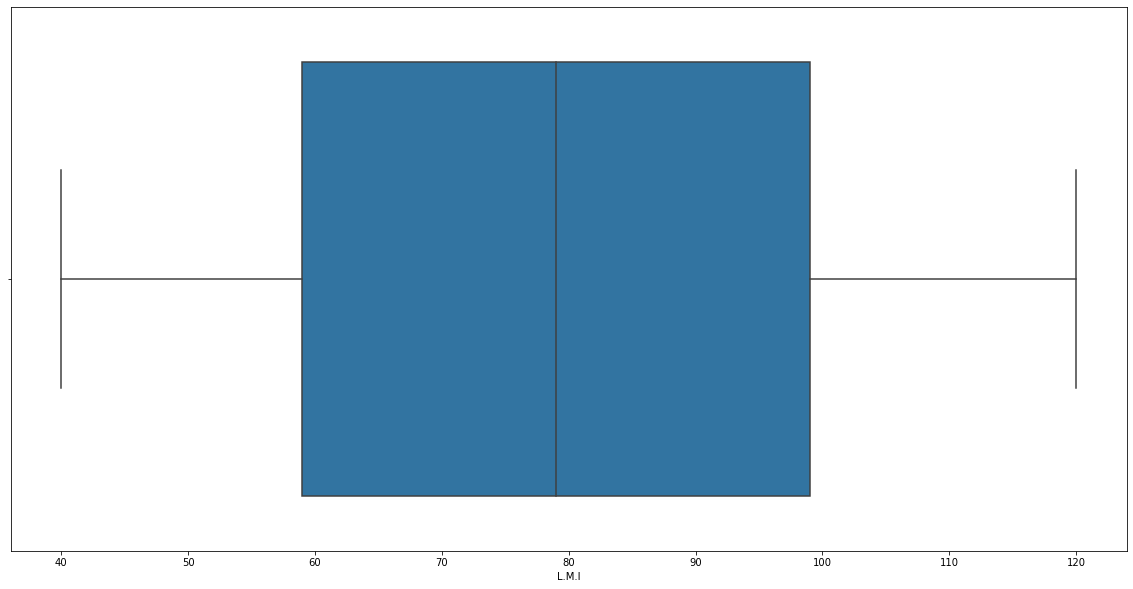

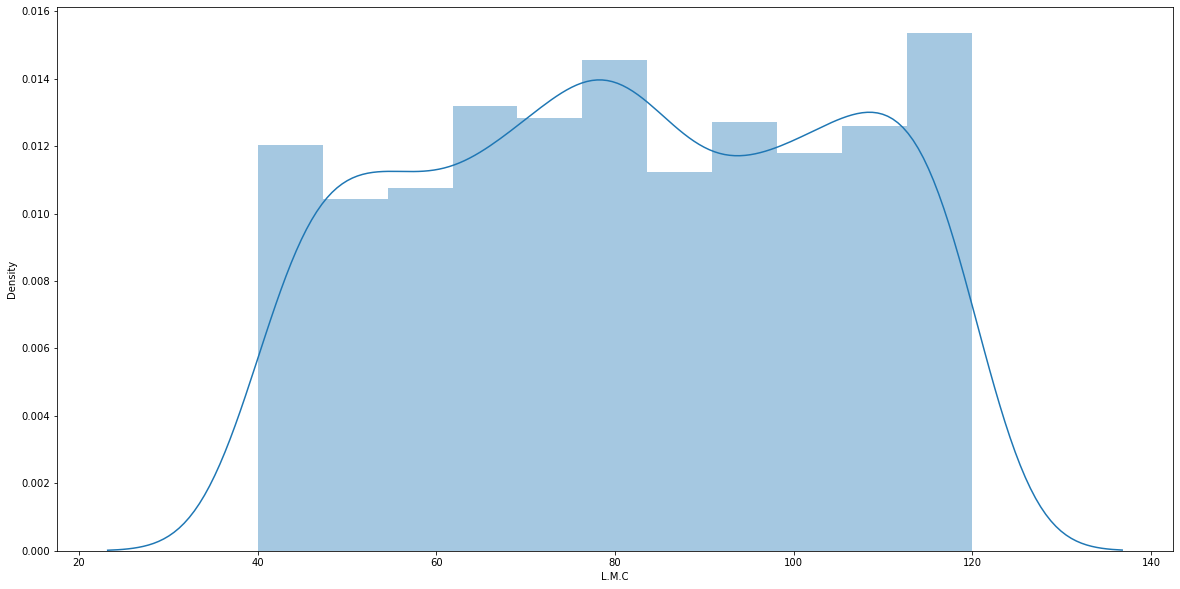

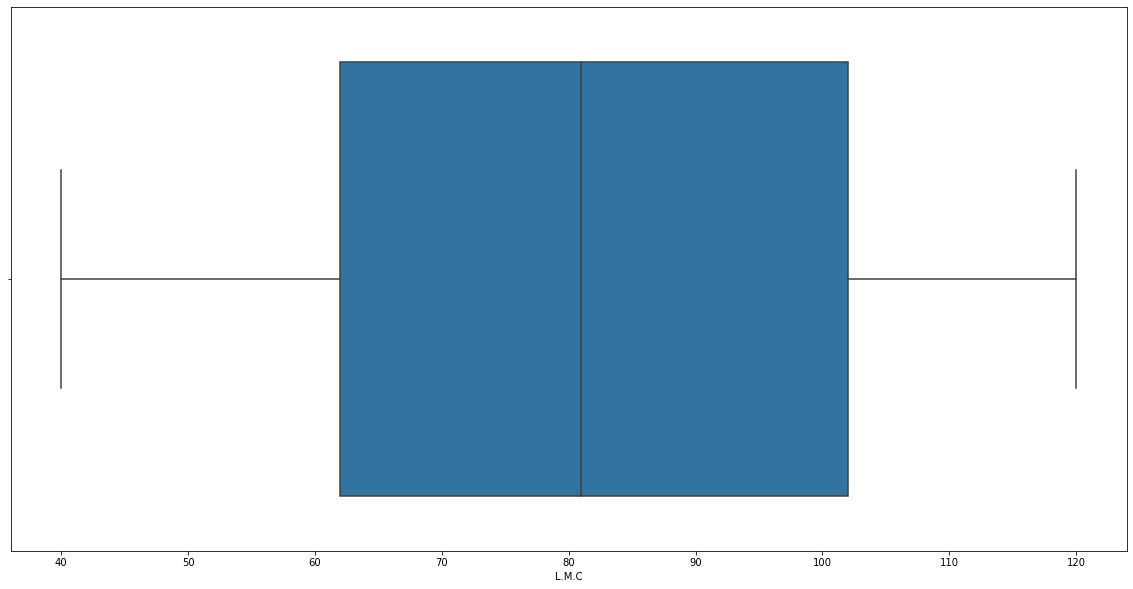

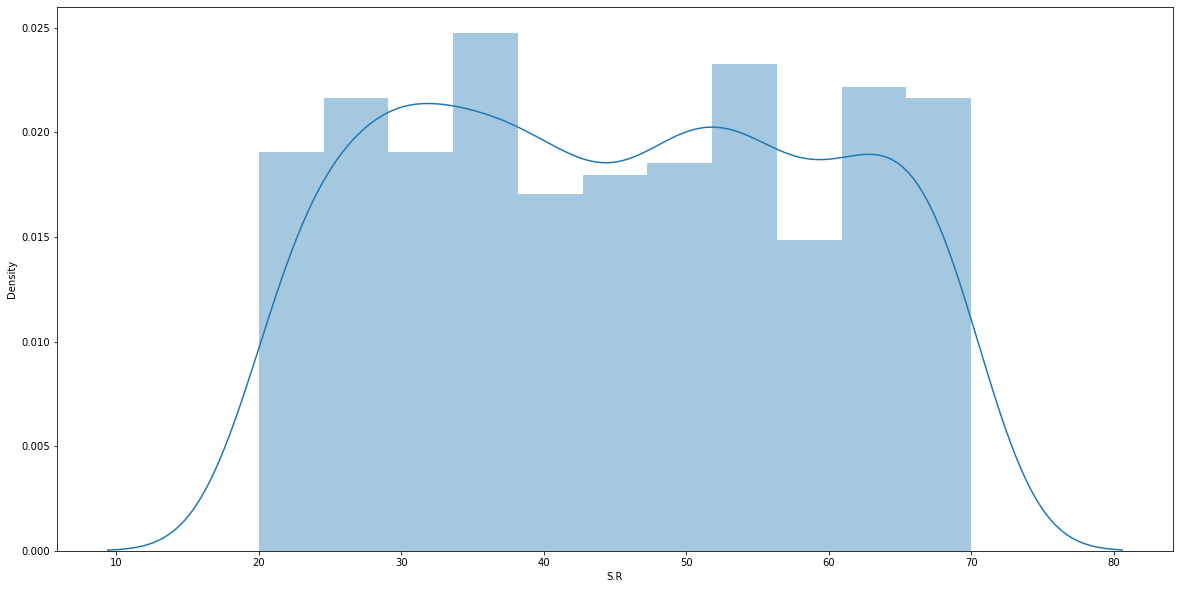

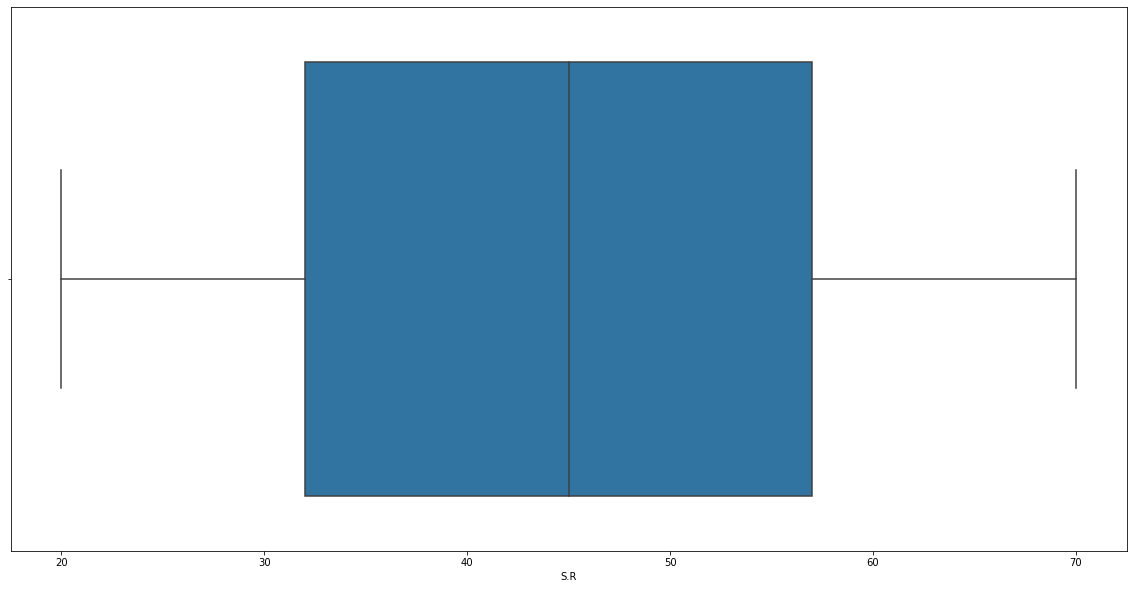

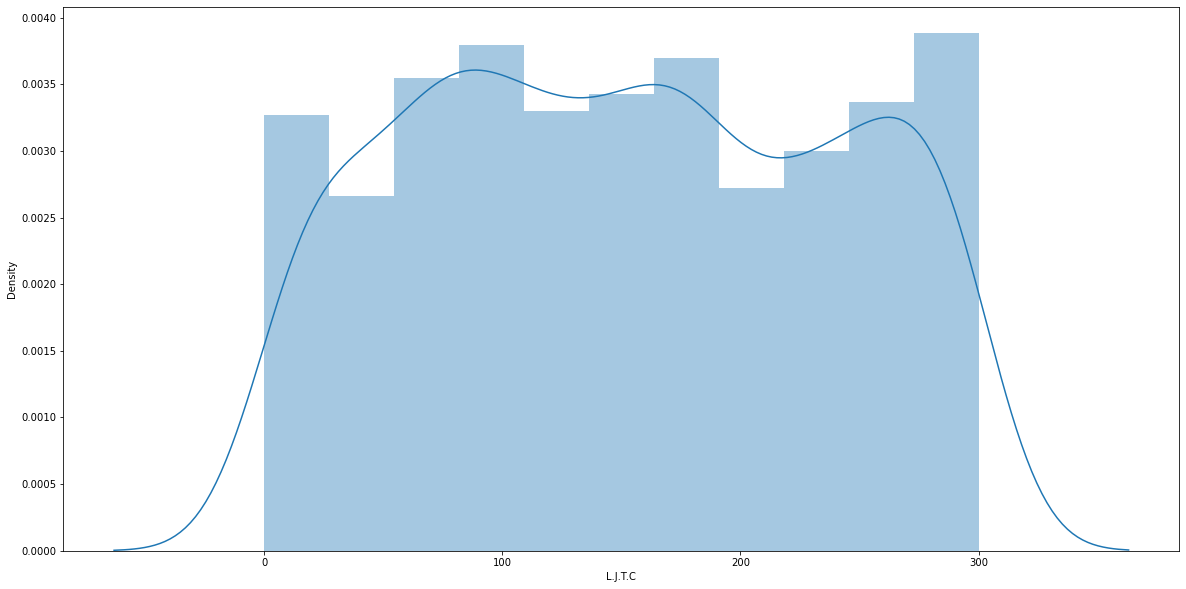

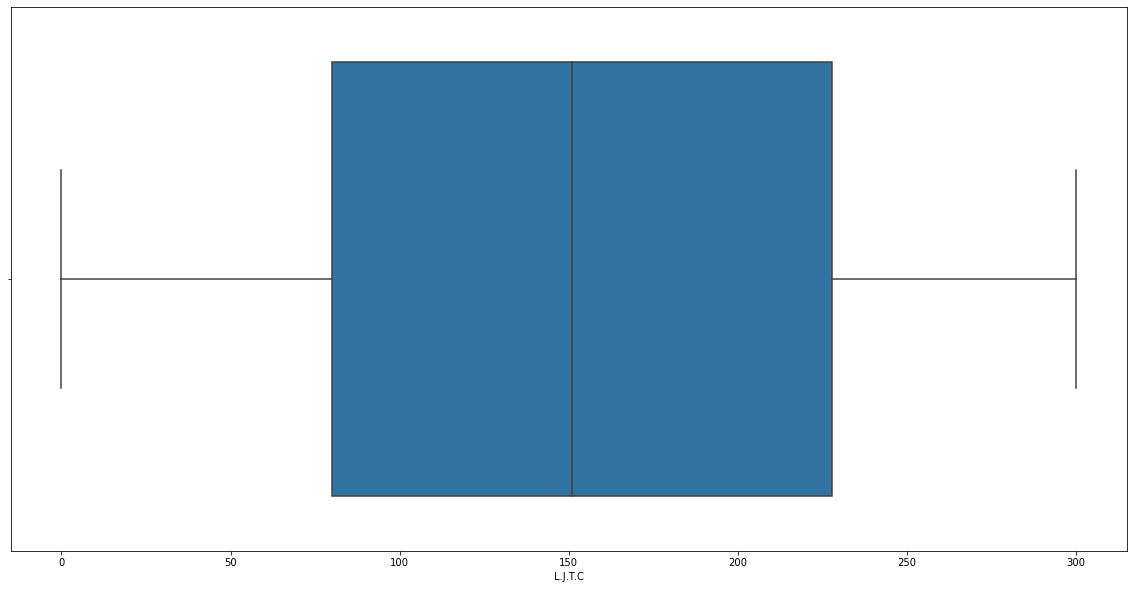

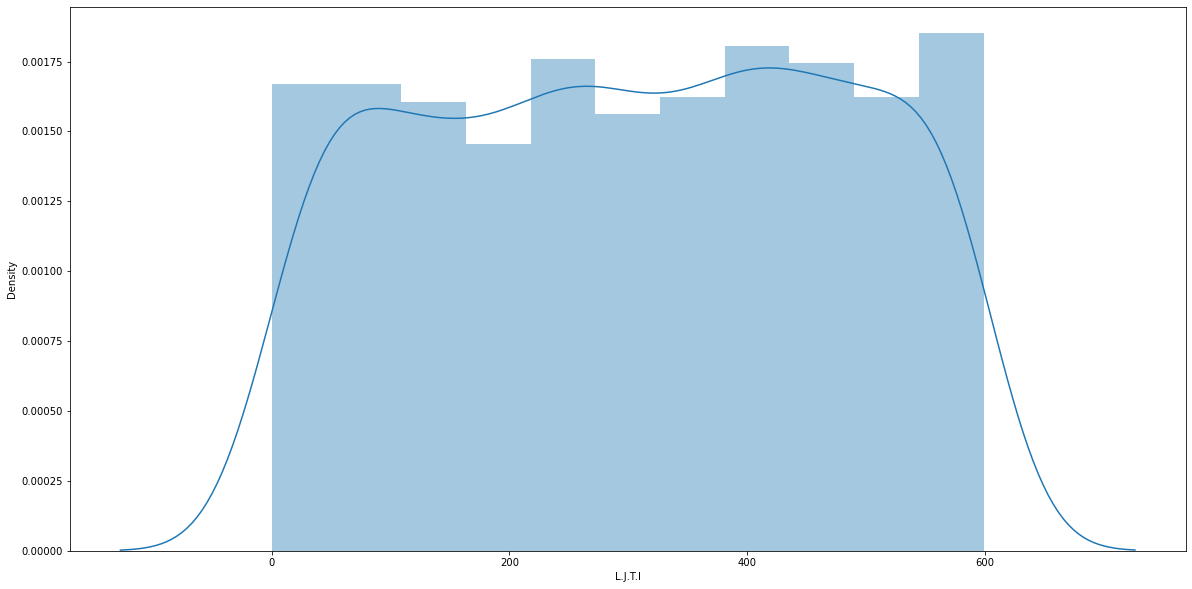

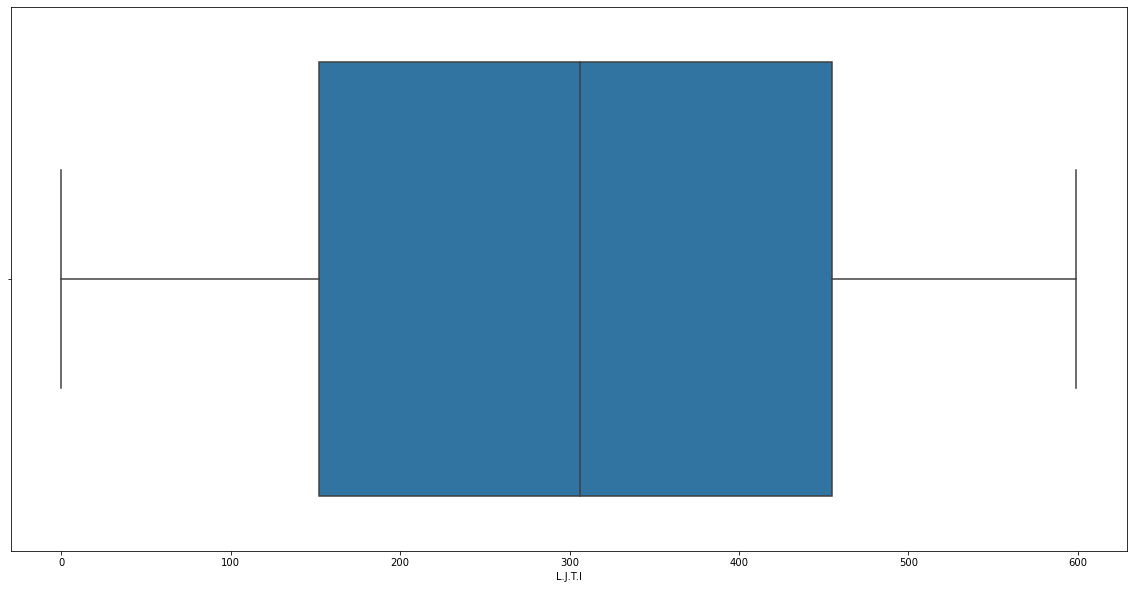

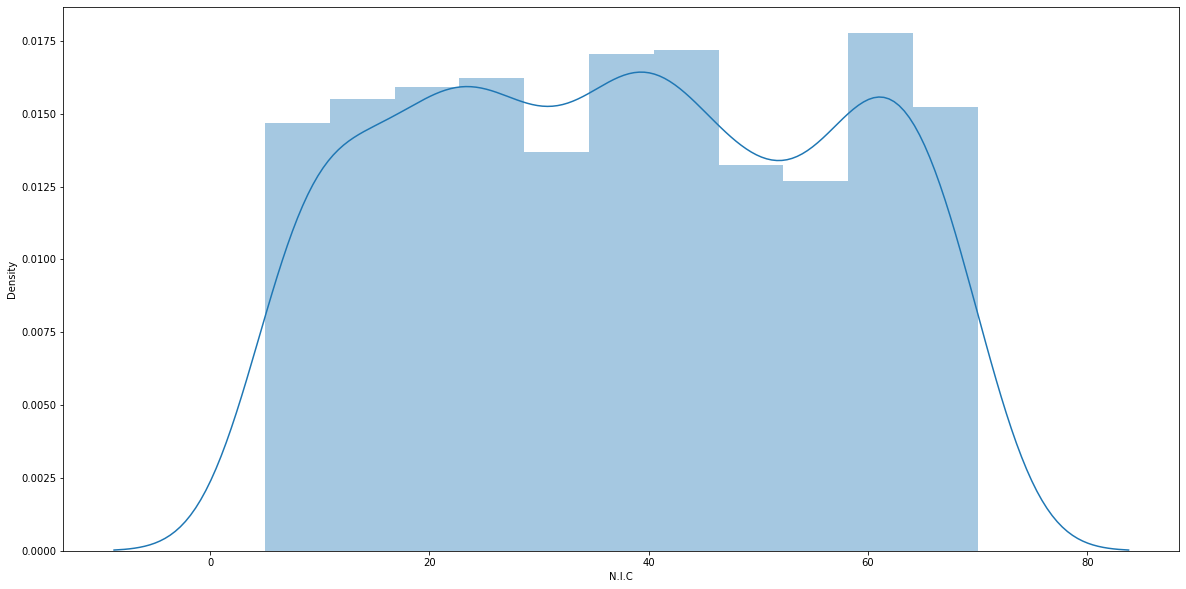

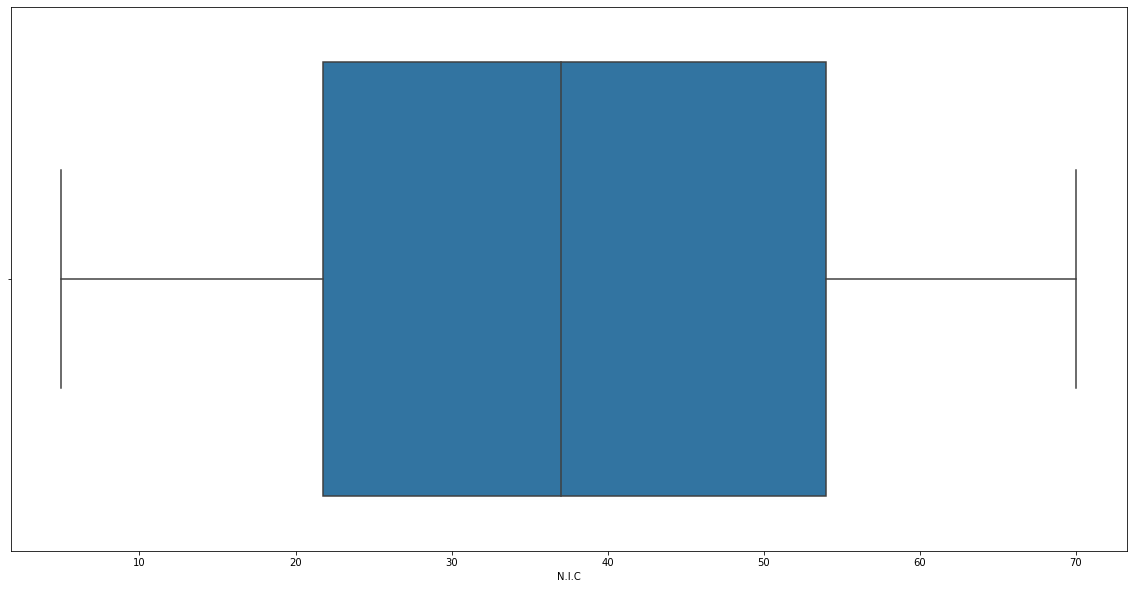

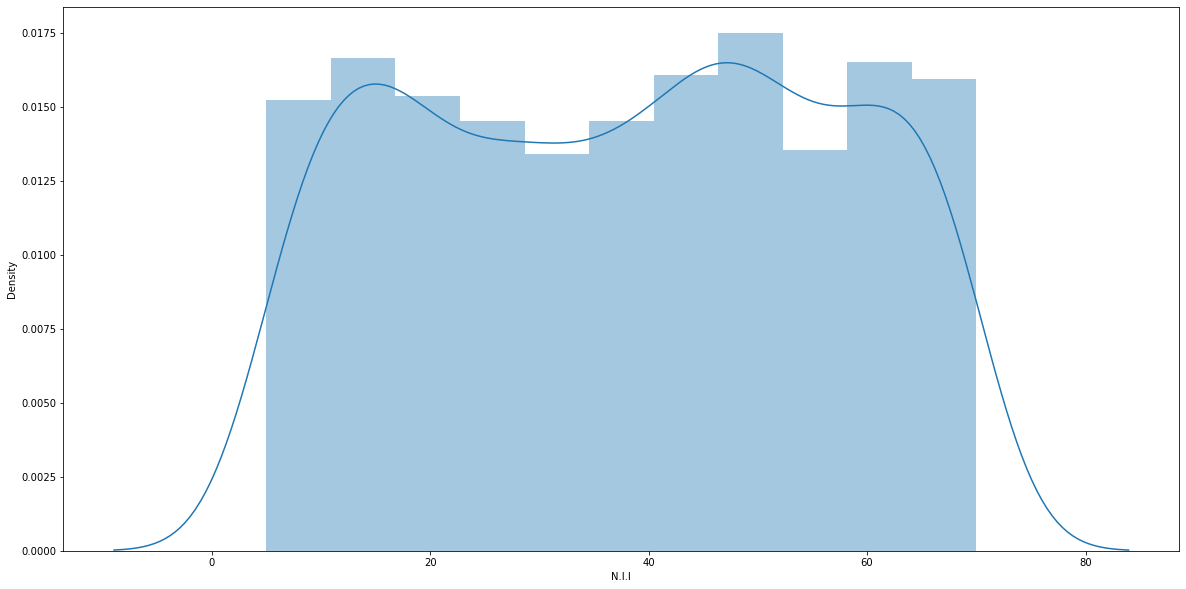

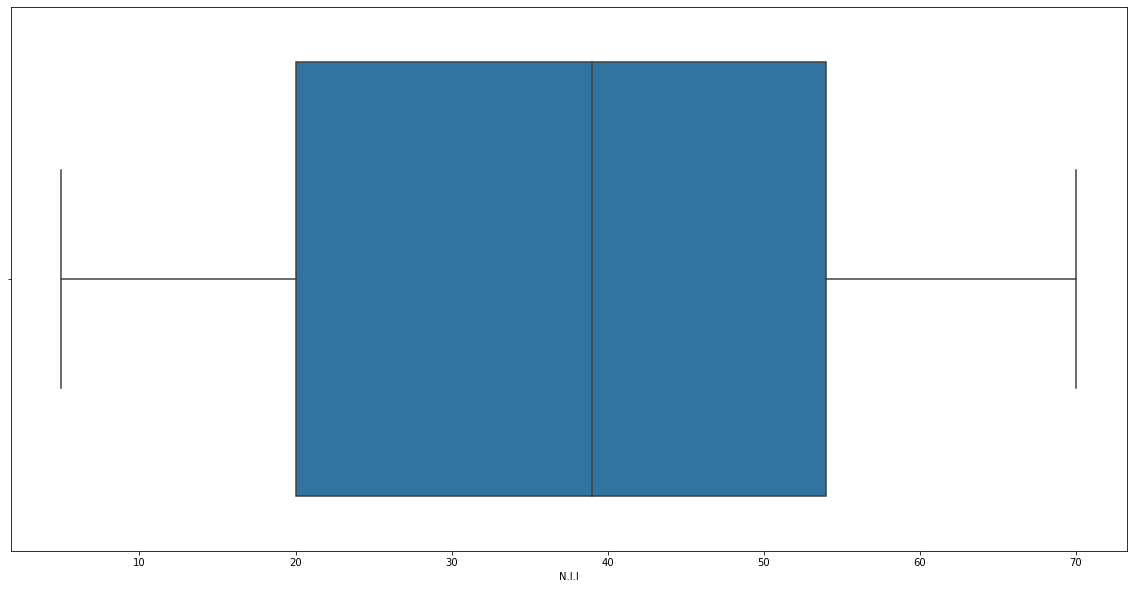

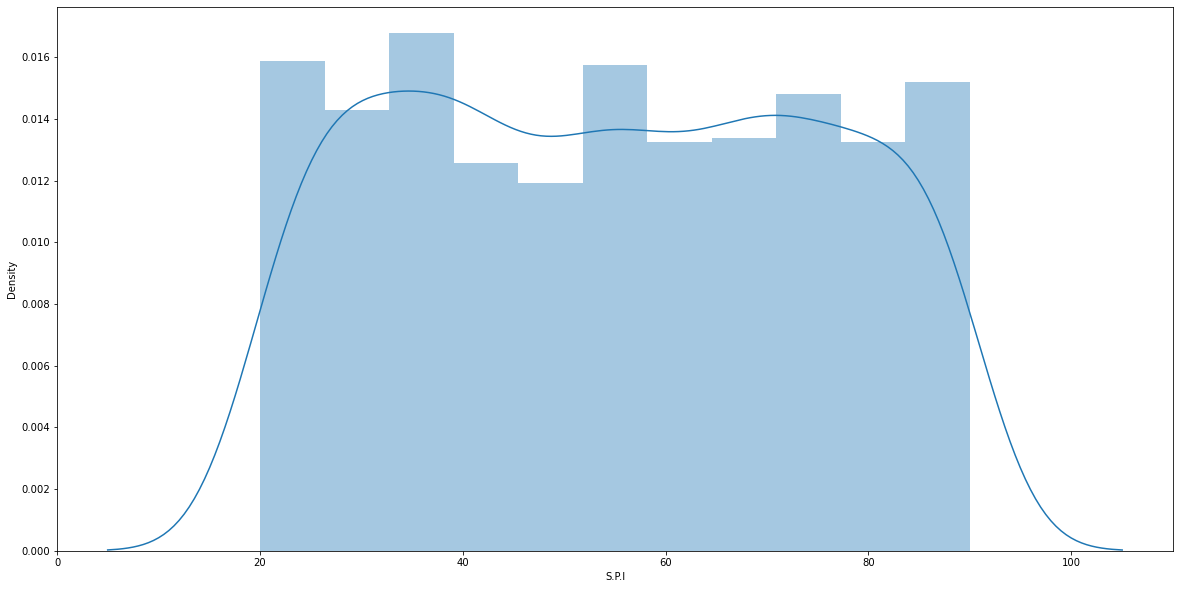

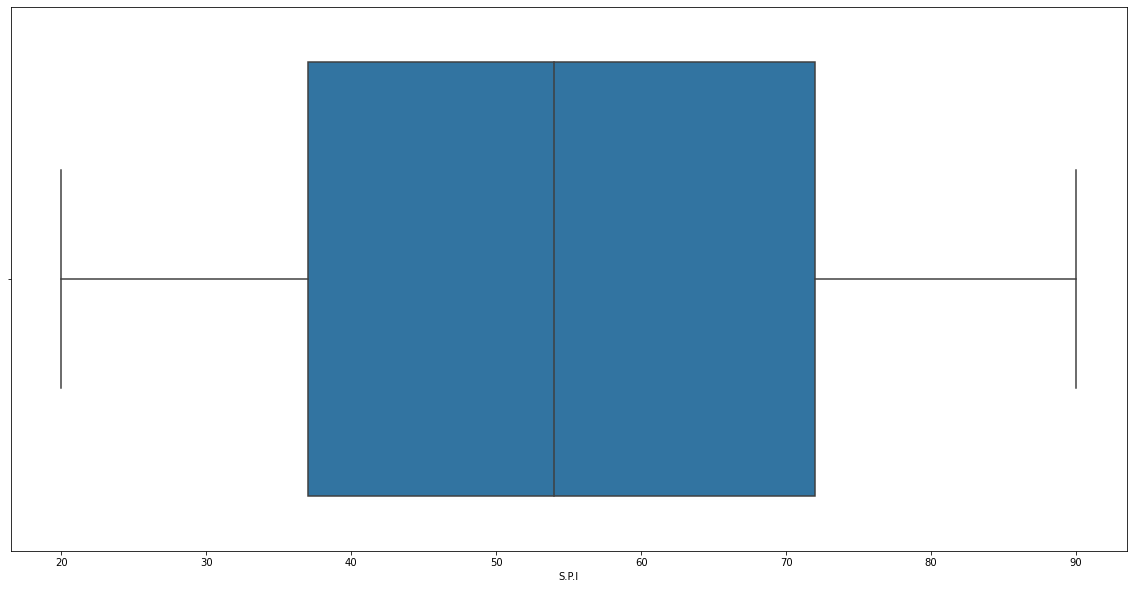

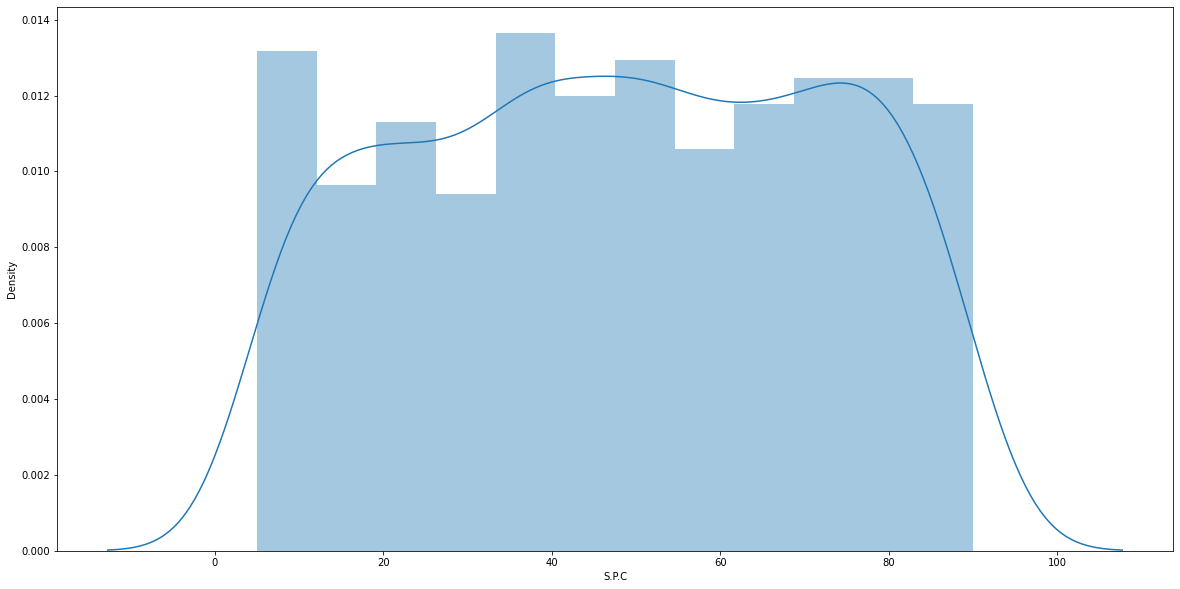

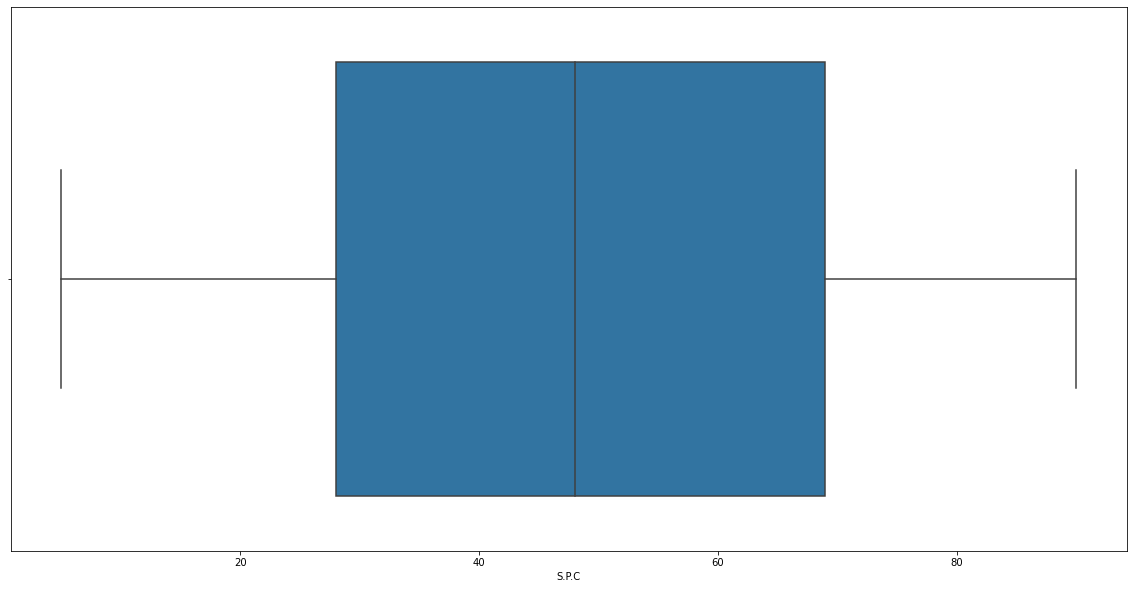

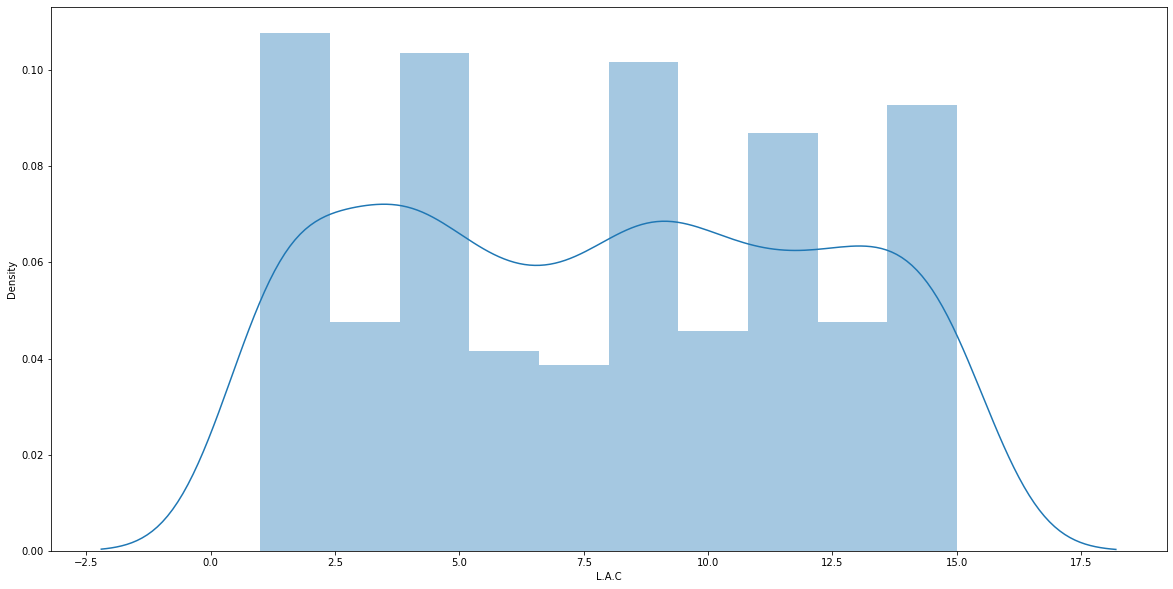

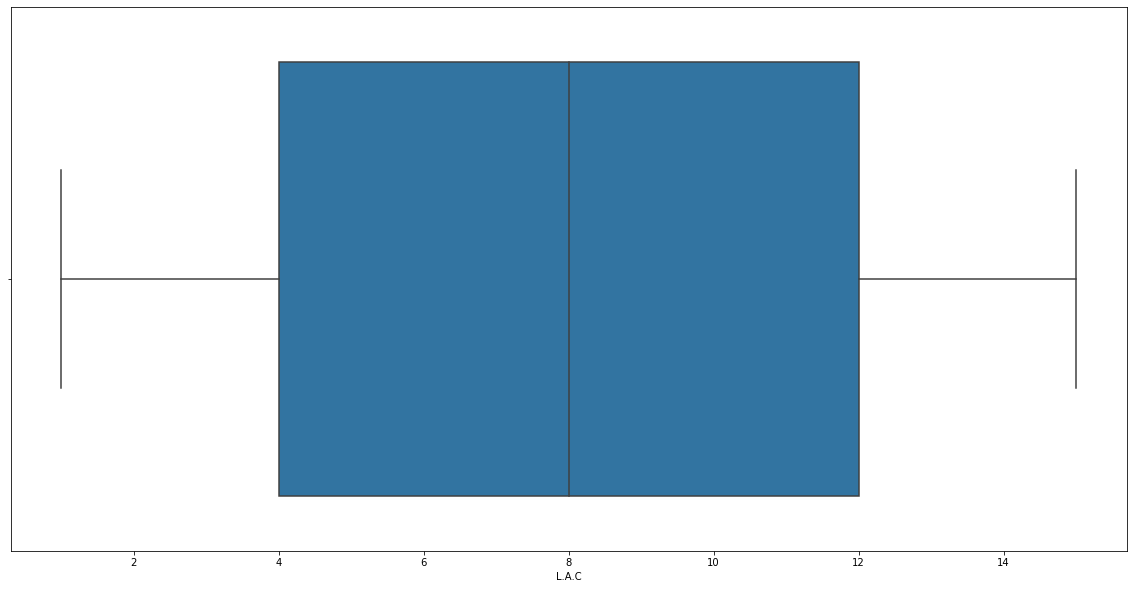

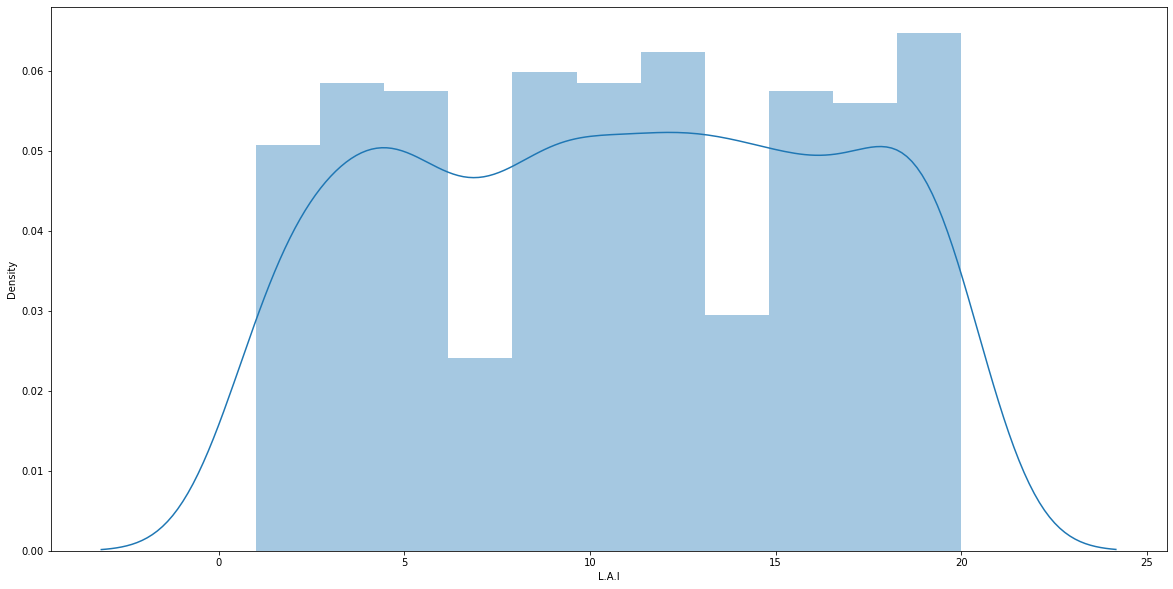

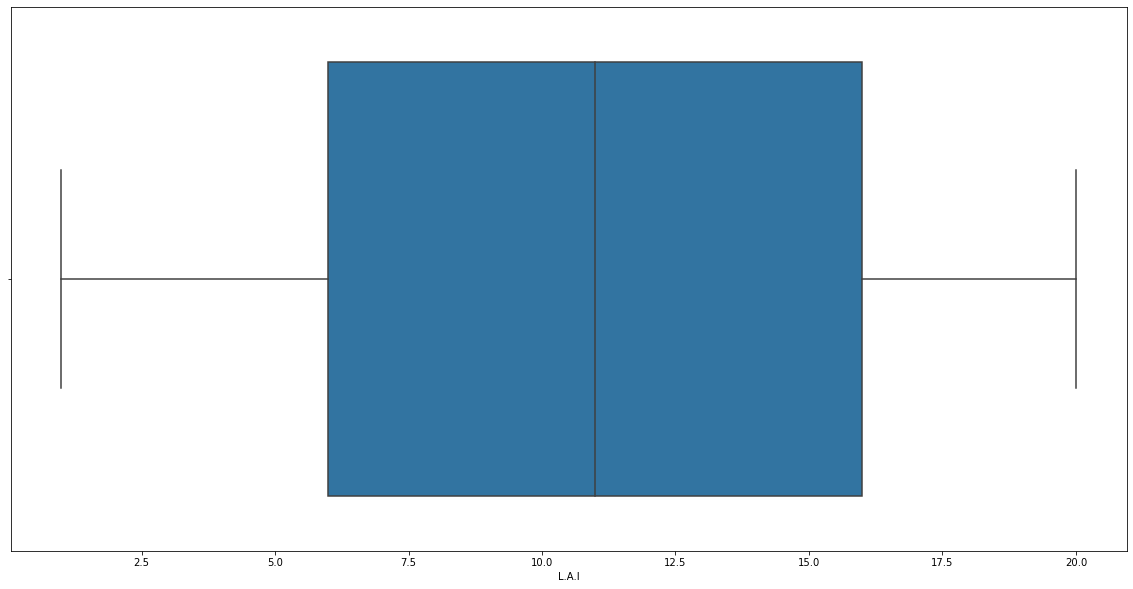

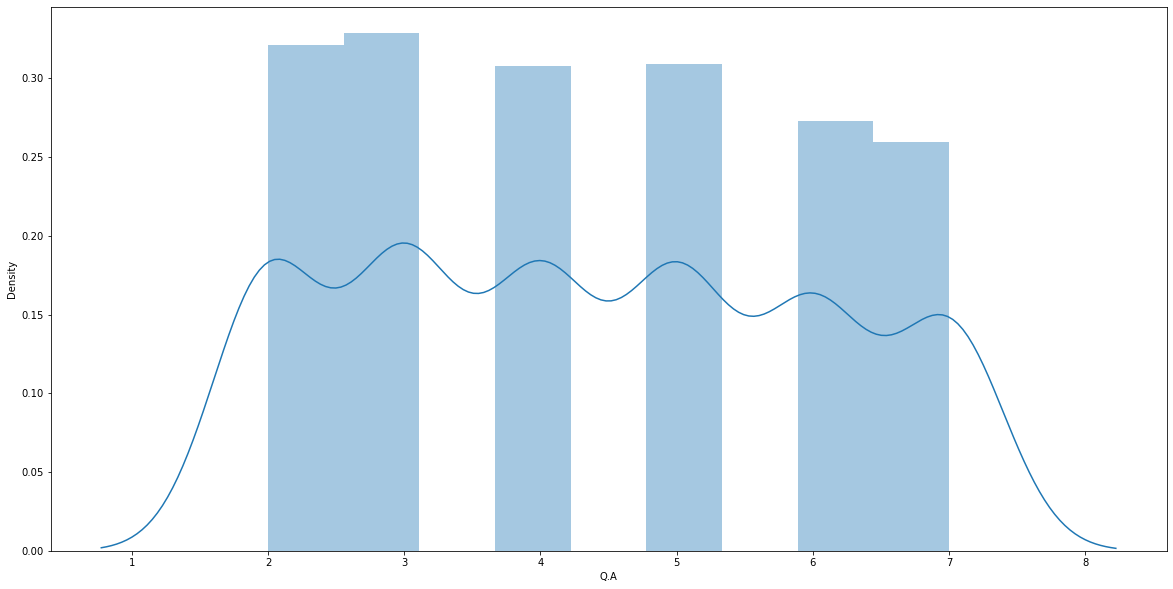

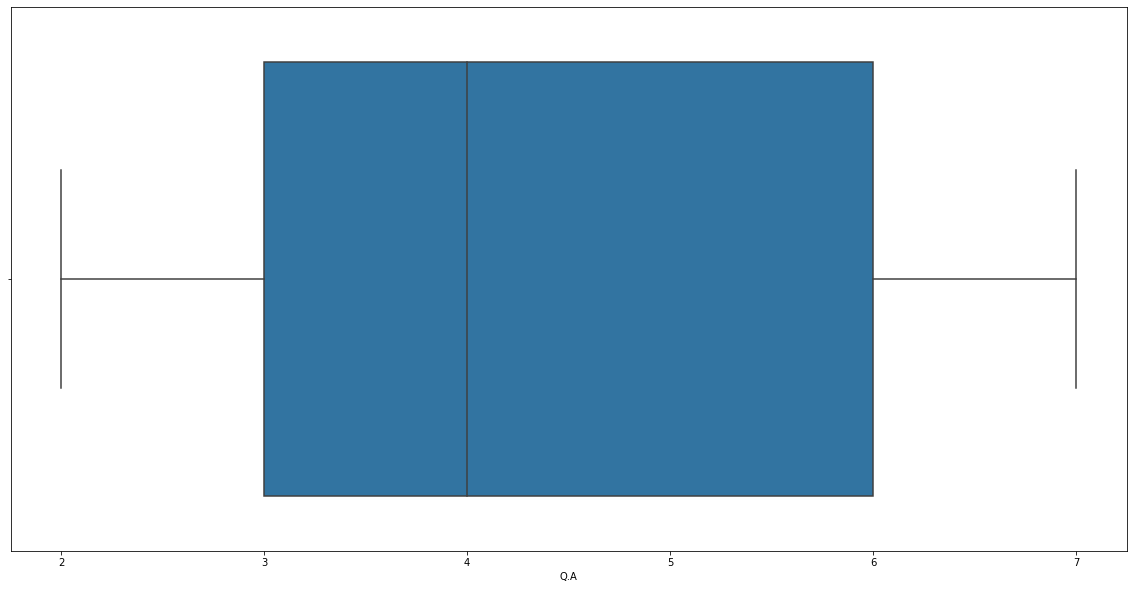

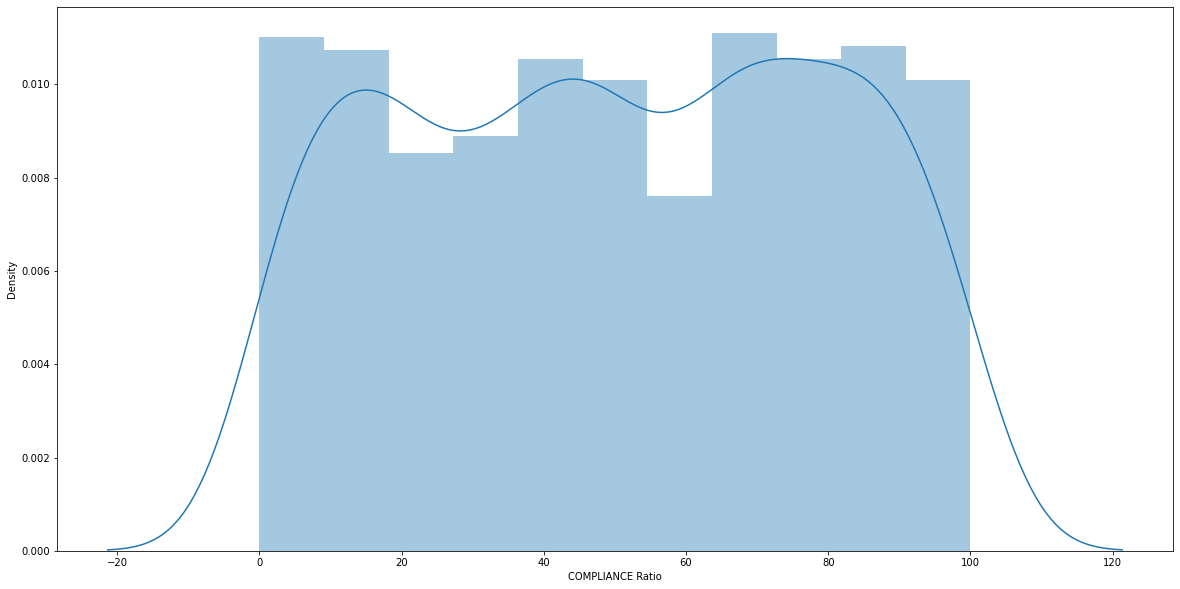

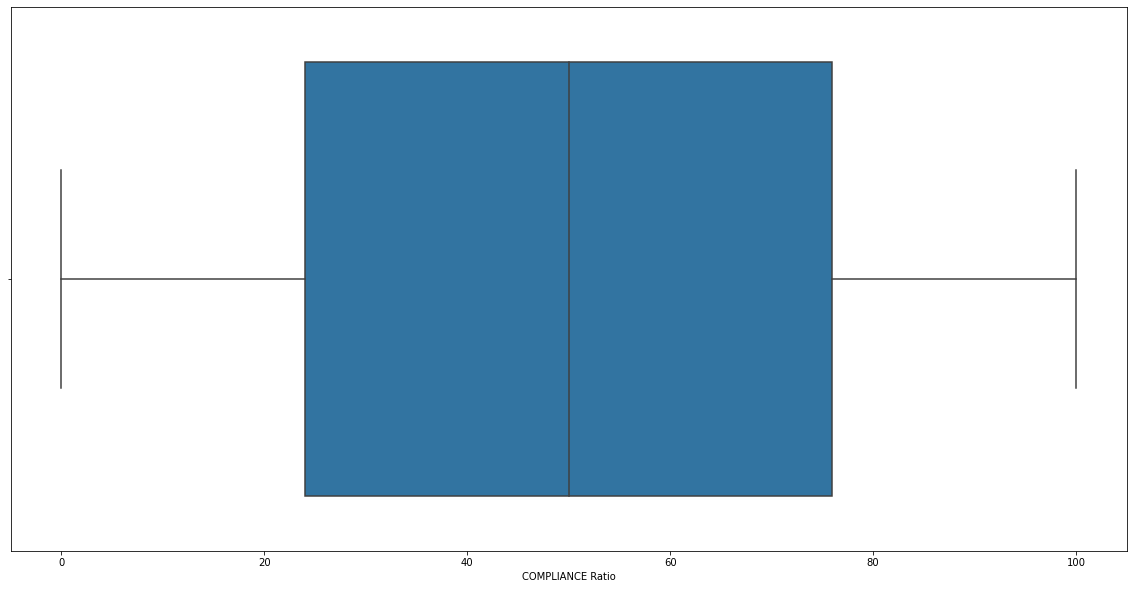

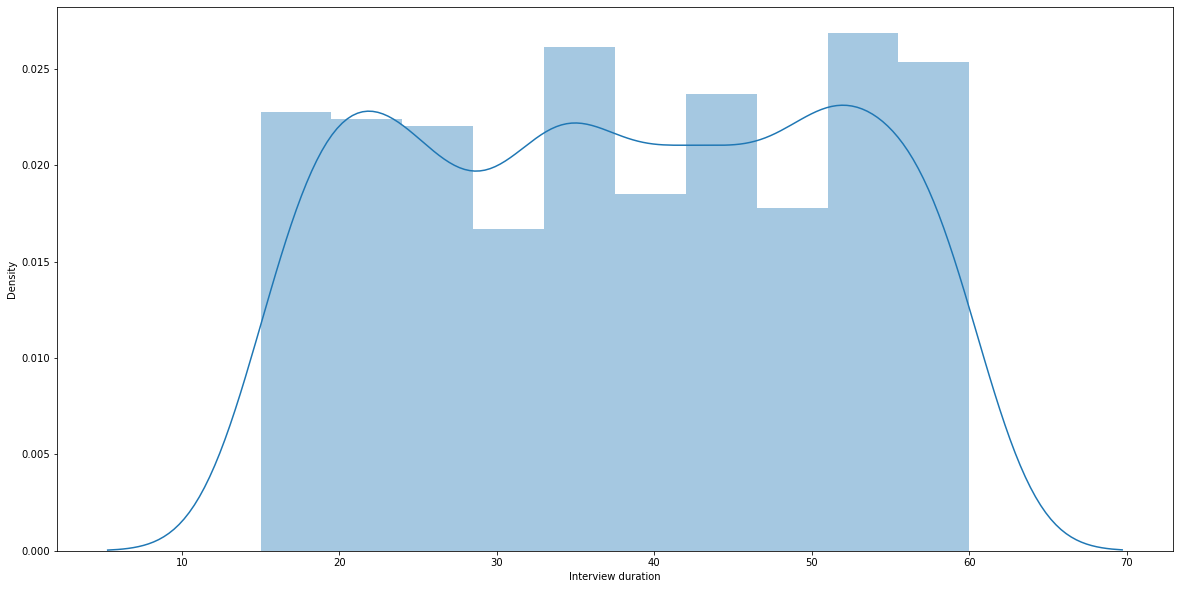

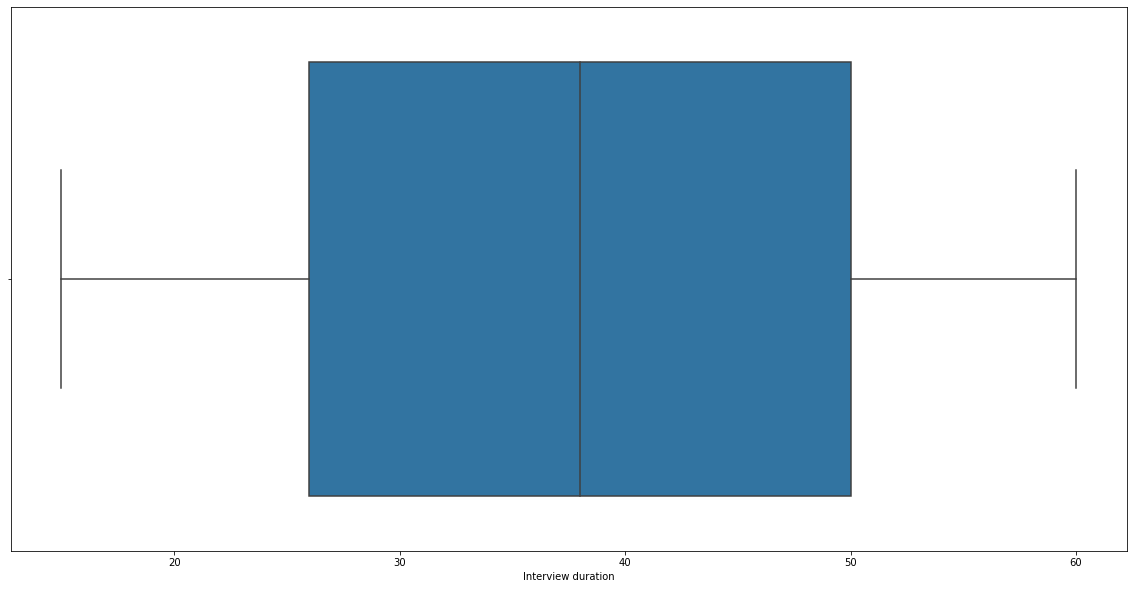

In [9]:
for i in df_n.columns:
    sns.distplot(df_n[i])
    plt.show()
    sns.boxplot(df_n[i])
    plt.show()

In [10]:
for i in df_train.columns:
    print(i,' :')
    print('No. of Unique:')
    print(len(df_train[i].value_counts()))
    print('Value Counts')
    print(df_train[i].value_counts())

Interview Id  :
No. of Unique:
5800
Value Counts
6.913030e+11    1
2.366589e+10    1
3.249524e+10    1
8.382473e+11    1
6.524176e+11    1
               ..
9.360567e+11    1
8.455346e+11    1
6.133017e+11    1
3.587956e+10    1
8.630407e+11    1
Name: Interview Id, Length: 5800, dtype: int64
Candidate Id  :
No. of Unique:
5800
Value Counts
2.655774e+09    1
8.268175e+09    1
3.114702e+09    1
5.961717e+09    1
4.145344e+09    1
               ..
8.414256e+08    1
1.251554e+09    1
4.215287e+09    1
5.796895e+09    1
3.494633e+09    1
Name: Candidate Id, Length: 5800, dtype: int64
Interviewer Id  :
No. of Unique:
79
Value Counts
218    95
216    92
241    90
264    89
215    88
       ..
261    59
235    58
202    58
200    57
204    53
Name: Interviewer Id, Length: 79, dtype: int64
Profile  :
No. of Unique:
10
Value Counts
Developer          618
Account Manager    598
Sales              585
QA Manual          585
QA Automation      577
Marketing          574
Product Manager    571
Pro

In [11]:
for i in df_test.columns:
    print(i,' :')
    print('No. of Unique:')
    print(len(df_test[i].value_counts()))
    print('Value Counts')
    print(df_test[i].value_counts())

Interview Id  :
No. of Unique:
1200
Value Counts
702127796635    1
563020916656    1
539342857864    1
762096897018    1
468433288703    1
               ..
564043833139    1
806146725648    1
383506254050    1
491903103749    1
480519602140    1
Name: Interview Id, Length: 1200, dtype: int64
Candidate Id  :
No. of Unique:
1200
Value Counts
2.381365e+09    1
1.981793e+09    1
1.636147e+09    1
4.652726e+09    1
3.139400e+09    1
               ..
6.377775e+08    1
6.048707e+08    1
9.838516e+09    1
9.252557e+09    1
3.065201e+09    1
Name: Candidate Id, Length: 1200, dtype: int64
Interviewer Id  :
No. of Unique:
79
Value Counts
267    23
216    23
203    22
237    22
227    22
       ..
238    10
195    10
260    10
266     8
204     8
Name: Interviewer Id, Length: 79, dtype: int64
Profile  :
No. of Unique:
10
Value Counts
Account Manager    133
Program Manager    130
HR                 126
Marketing          123
QA Automation      120
Sales              120
Developer          117
Dat

In [12]:
null = df_test.isnull().sum()
null[null>0]

S.L.R.I              1
L.J.T.C              1
S.P.I                2
L.A.I                1
Q.A                  1
P.E.I                2
P.E.C                2
COMPLIANCE Ratio     1
Interviewer Intro    2
dtype: int64

In [13]:
null = df_train.isnull().sum()
null[null>0]

P.E.I                1
P.E.C                3
Interviewer Intro    1
Opp to ask           1
Status               4
dtype: int64

In [14]:
df_test['L.J.T.C'].nunique()

294

In [15]:
df_train['L.J.T.C'].nunique()

301

In [16]:
df_train.groupby(['Status','Q.A'])["Status"].size()

Status        Q.A
Consider      2      378
              3      408
              4      363
              5      424
              6      380
              7      358
May Consider  2      310
              3      316
              4      332
              5      318
              6      313
              7      301
Not Consider  2      248
              3      243
              4      275
              5      253
              6      304
              7      272
Name: Status, dtype: int64

In [17]:
sn = df_train.Status.isnull()
sn[sn]

349     True
3807    True
3816    True
5795    True
Name: Status, dtype: bool

In [18]:
df_train.iloc[[349,3807,3816,5795],:]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
349,6.099996e+11,2.295937e+09,237,QA Automation,0.83,0.17,37,93,102,28,30,393,49,23,58,49,13,9,4,Neutral,Positive,75,23,No,No,No,NaN
3807,4.068795e+10,3.910784e+09,209,QA Manual,0.98,0.02,112,99,98,65,267,499,33,62,24,53,15,18,3,Negative,Positive,27,19,No,Yes,No,NaN
3816,6.587907e+11,6.044150e+09,260,Account Manager,0.57,0.43,47,100,83,31,172,424,34,55,41,40,4,15,5,Negative,Neutral,0,42,No,Yes,No,NaN
5795,3.186849e+11,7.483571e+09,192,Marketing,0.58,0.42,52,51,119,42,274,100,13,15,59,6,6,13,5,Negative,Neutral,16,25,Yes,Yes,No,NaN


In [19]:
df_train.Status.iloc[[349, 3807, 3816, 5795]]=['Consider', 'Consider', 'May Consider', 'Consider']

In [20]:
df_train.isnull().any()

Interview Id          False
Candidate Id          False
Interviewer Id        False
Profile               False
S.L.R.C               False
S.L.R.I               False
A.T.T                 False
L.M.I                 False
L.M.C                 False
S.R                   False
L.J.T.C               False
L.J.T.I               False
N.I.C                 False
N.I.I                 False
S.P.I                 False
S.P.C                 False
L.A.C                 False
L.A.I                 False
Q.A                   False
P.E.I                  True
P.E.C                  True
COMPLIANCE Ratio      False
Interview duration    False
Interviewer Intro      True
Candidate into        False
Opp to ask             True
Status                False
dtype: bool

In [21]:
df_train.dropna(axis=0,inplace = True)

In [22]:
df_train.isnull().any()

Interview Id          False
Candidate Id          False
Interviewer Id        False
Profile               False
S.L.R.C               False
S.L.R.I               False
A.T.T                 False
L.M.I                 False
L.M.C                 False
S.R                   False
L.J.T.C               False
L.J.T.I               False
N.I.C                 False
N.I.I                 False
S.P.I                 False
S.P.C                 False
L.A.C                 False
L.A.I                 False
Q.A                   False
P.E.I                 False
P.E.C                 False
COMPLIANCE Ratio      False
Interview duration    False
Interviewer Intro     False
Candidate into        False
Opp to ask            False
Status                False
dtype: bool

In [23]:
df_s = df_test.select_dtypes('object')
df_str = df_train.select_dtypes('object')

In [24]:
for column in df_test:
    if df_test[column].isnull().any():
        if(column in df_s):
            df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
        else:
            df_test[column]=df_test[column].fillna(df_test[column].median())

In [25]:
null = df_test.isnull().sum()
null[null>0]

Series([], dtype: int64)

In [26]:
df_test.isnull().any()

Interview Id          False
Candidate Id          False
Interviewer Id        False
Profile               False
S.L.R.C               False
S.L.R.I               False
A.T.T                 False
L.M.I                 False
L.M.C                 False
S.R                   False
L.J.T.C               False
L.J.T.I               False
N.I.C                 False
N.I.I                 False
S.P.I                 False
S.P.C                 False
L.A.C                 False
L.A.I                 False
Q.A                   False
P.E.I                 False
P.E.C                 False
COMPLIANCE Ratio      False
Interview duration    False
Interviewer Intro     False
Candidate into        False
Opp to ask            False
dtype: bool

In [39]:
df=pd.concat([df_train,df_test],axis=0)
df.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88.0,106,41,66,42.0,47,13,15.0,6.0,Neutral,Neutral,98.0,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93.0,313,28,62,32.0,52,5,15.0,4.0,Neutral,Negative,54.0,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52.0,67,26,14,57.0,34,4,7.0,3.0,Positive,Positive,31.0,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115.0,166,62,55,65.0,75,10,10.0,7.0,Positive,Negative,24.0,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190.0,394,7,32,36.0,74,13,7.0,3.0,Negative,Positive,73.0,60,Yes,Yes,No,Consider


In [40]:
df1=df.copy(deep=True)

In [41]:
df.drop(['Interview Id','Candidate Id','Interviewer Id'],axis=1,inplace=True)

<AxesSubplot:xlabel='Q.A', ylabel='count'>

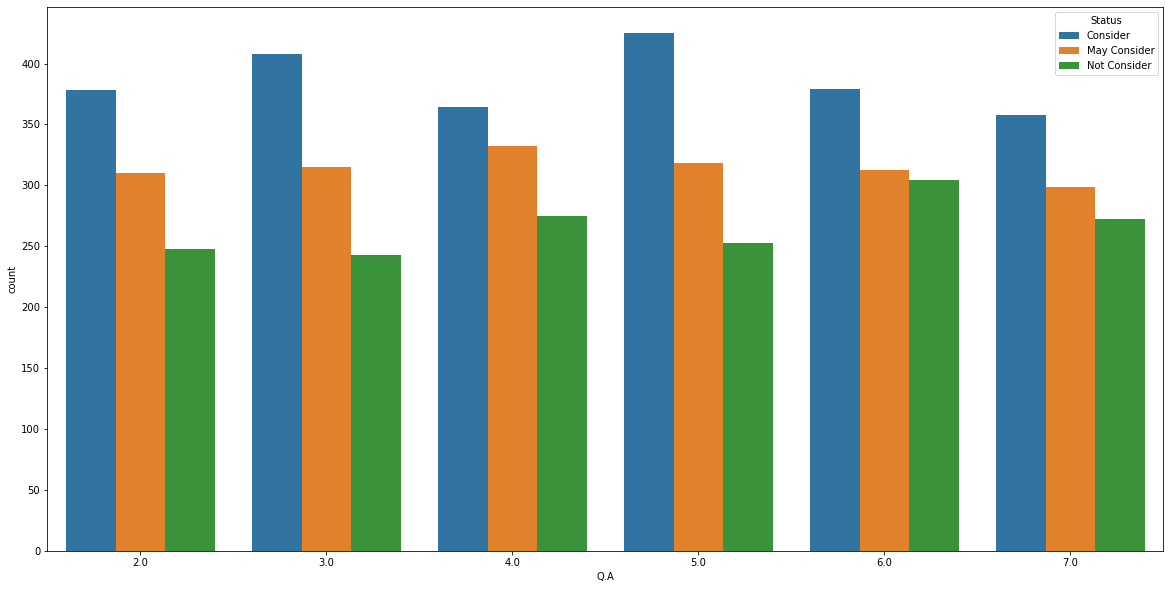

In [42]:
sns.countplot(df['Q.A'],hue= df['Status'])

<AxesSubplot:xlabel='Profile', ylabel='count'>

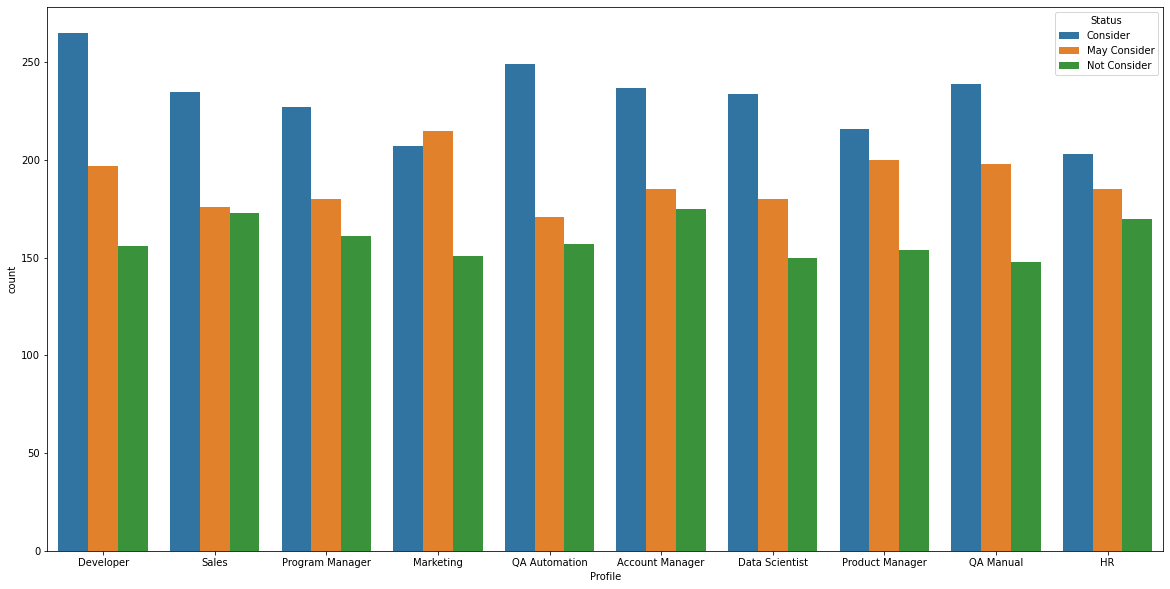

In [43]:
sns.countplot(df['Profile'],hue= df['Status'])

Profile


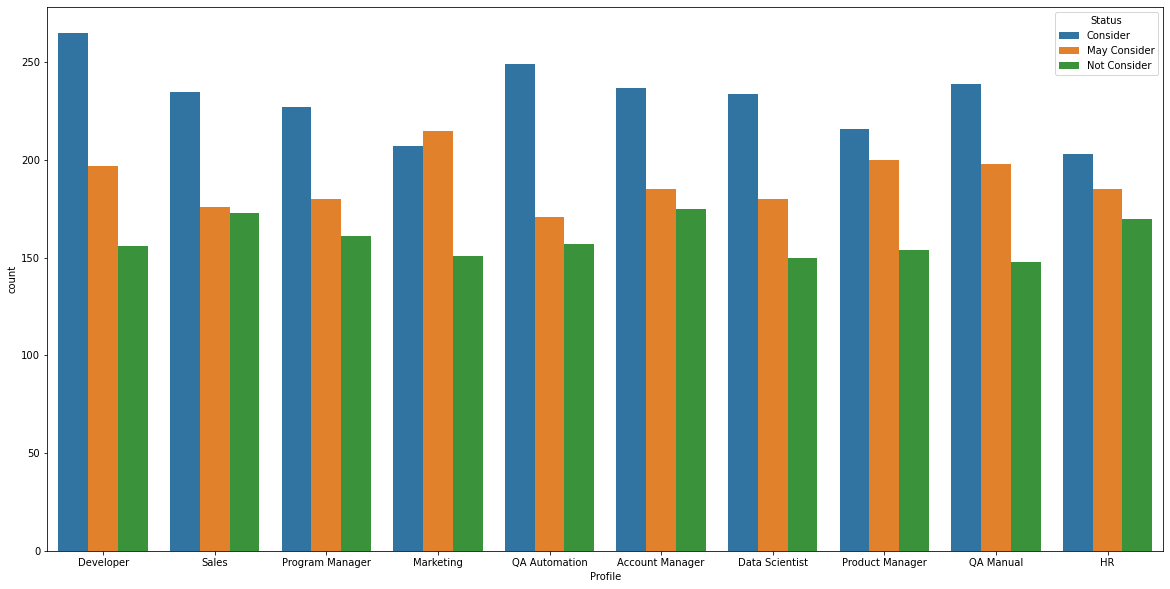

S.L.R.C


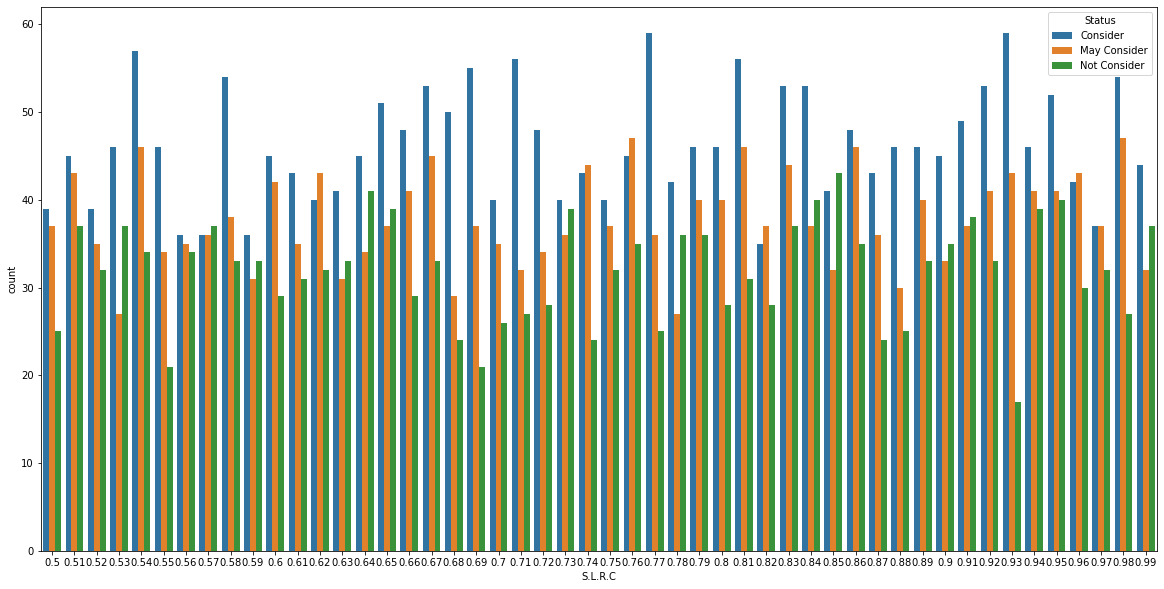

S.L.R.I


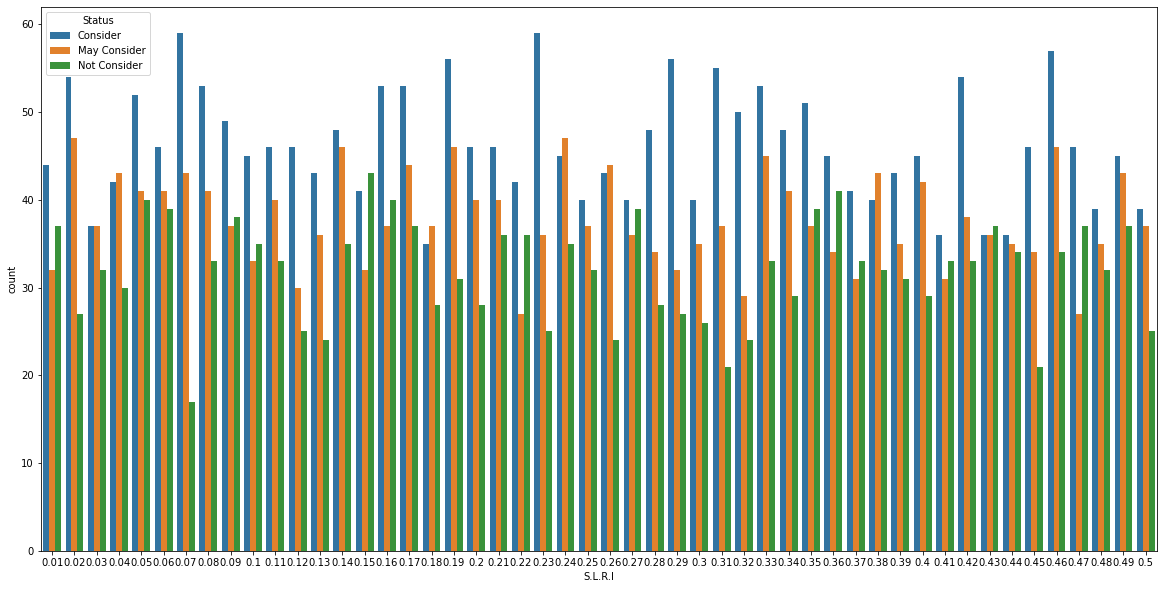

A.T.T


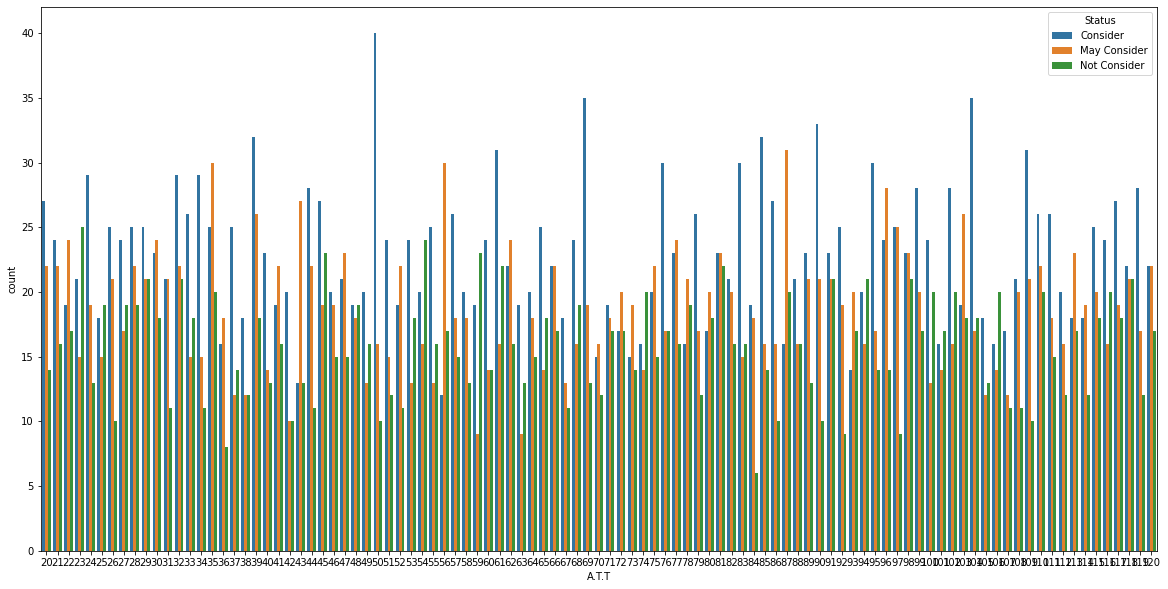

L.M.I


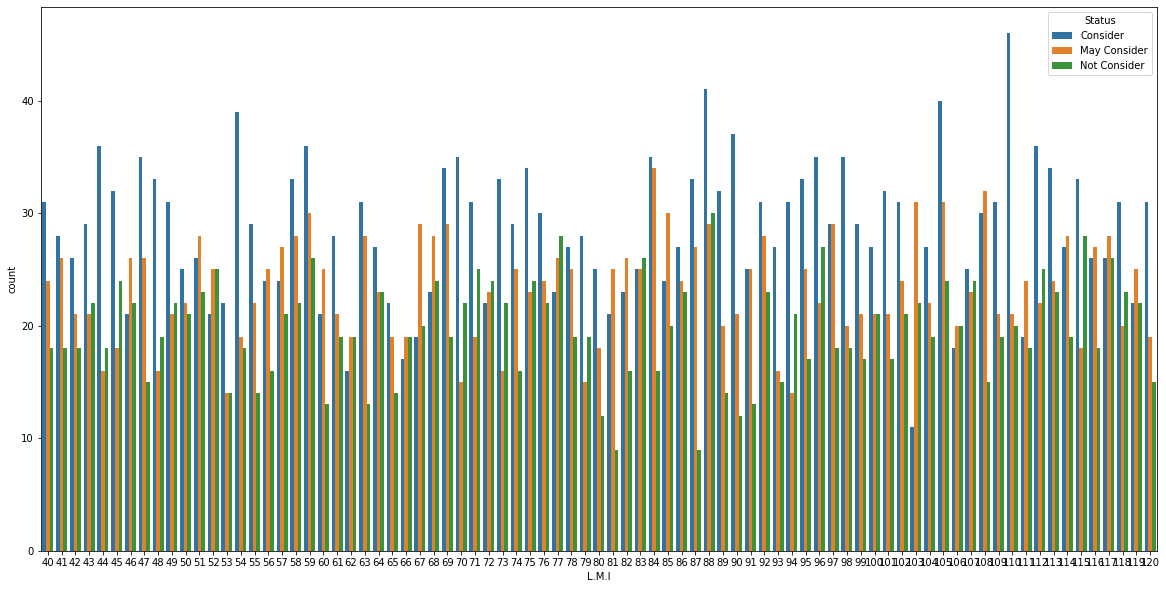

L.M.C


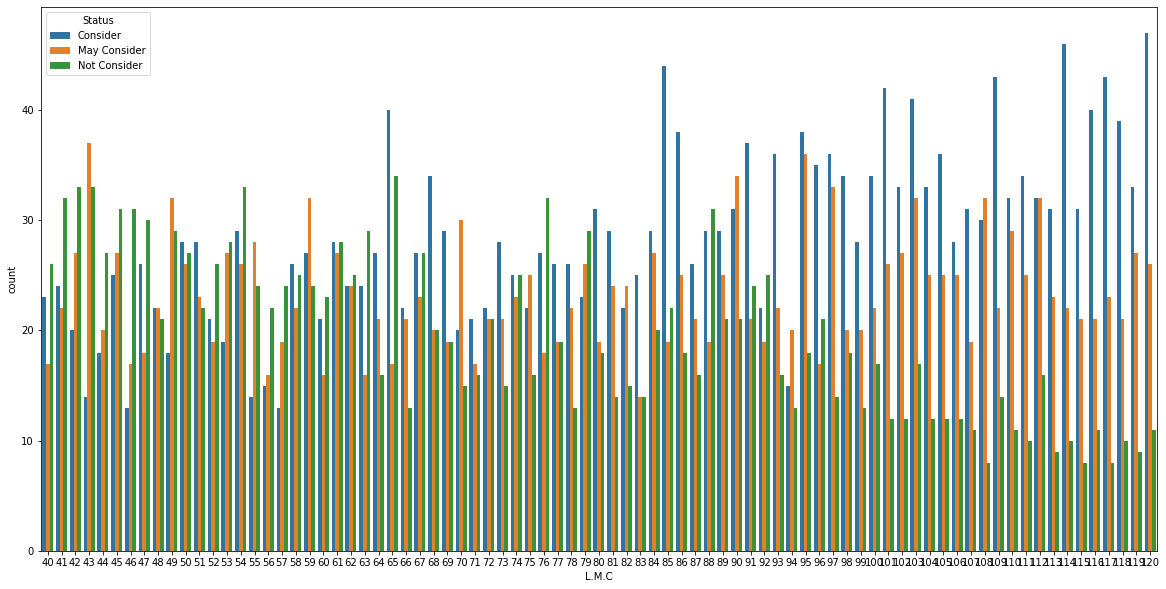

S.R


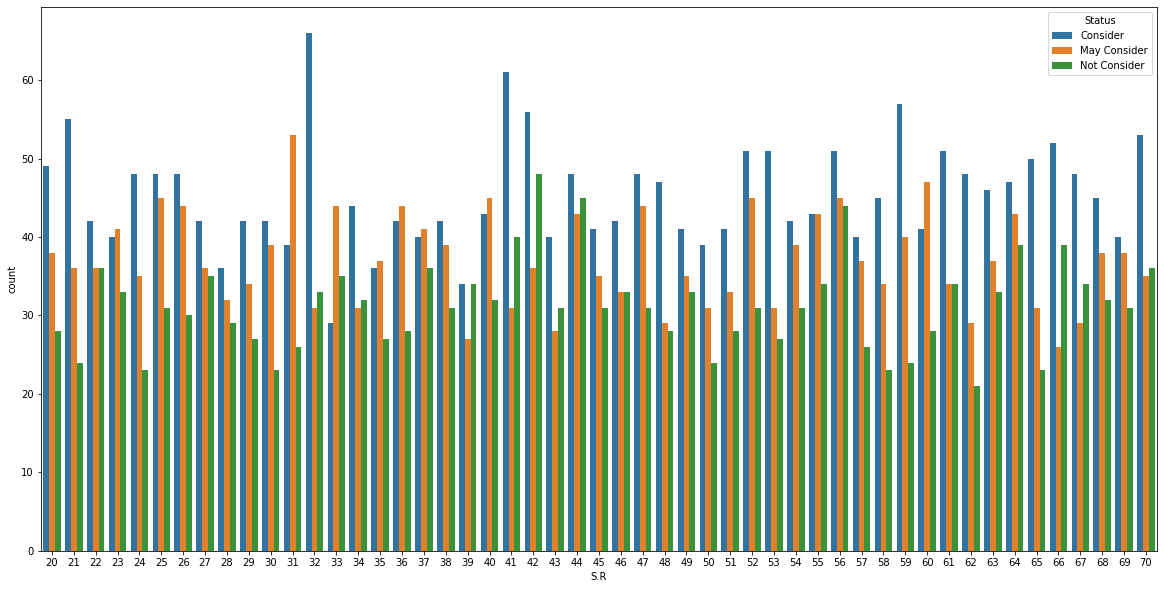

L.J.T.C


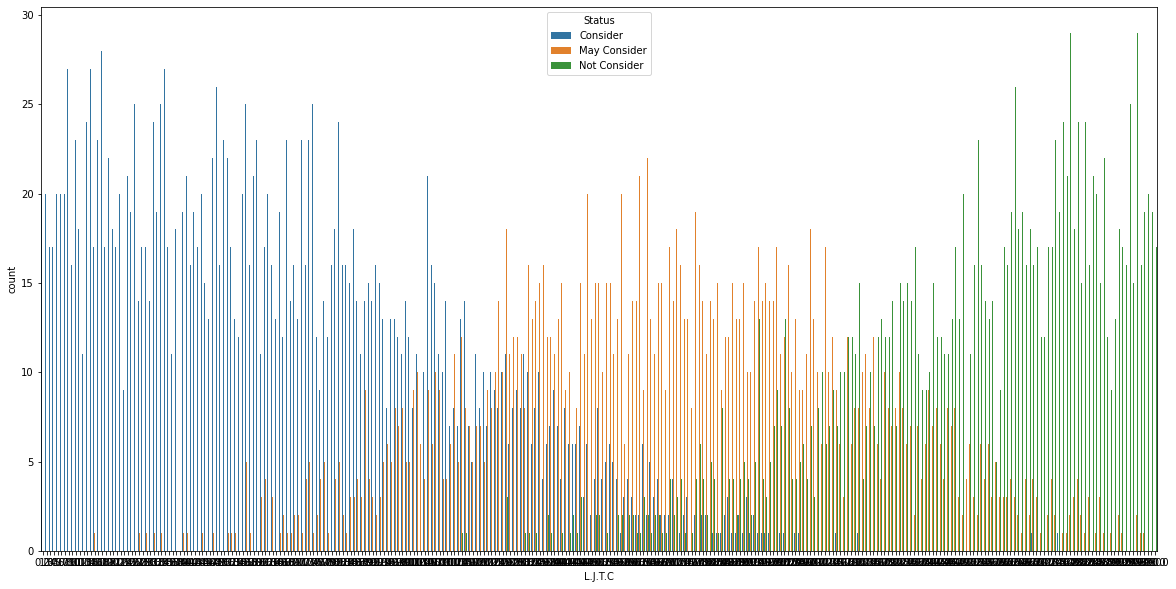

L.J.T.I


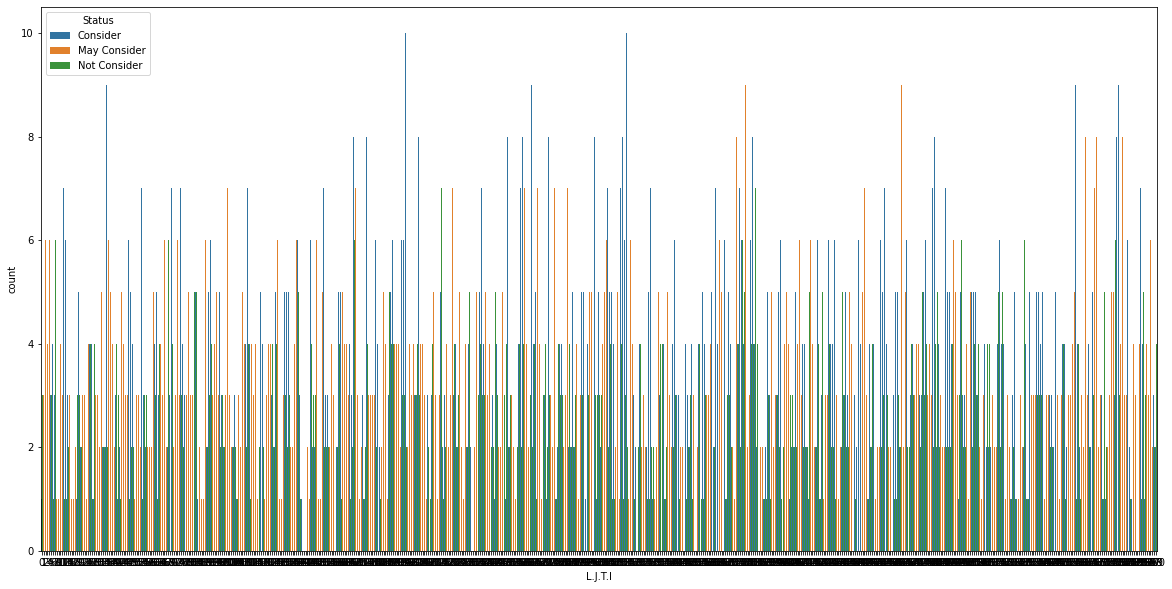

N.I.C


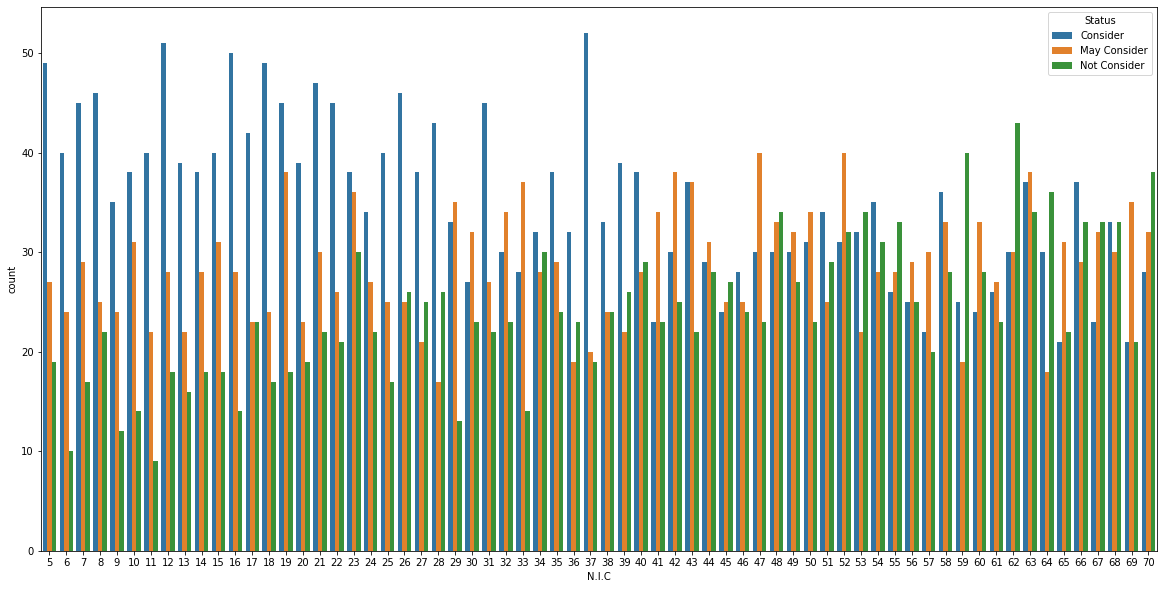

N.I.I


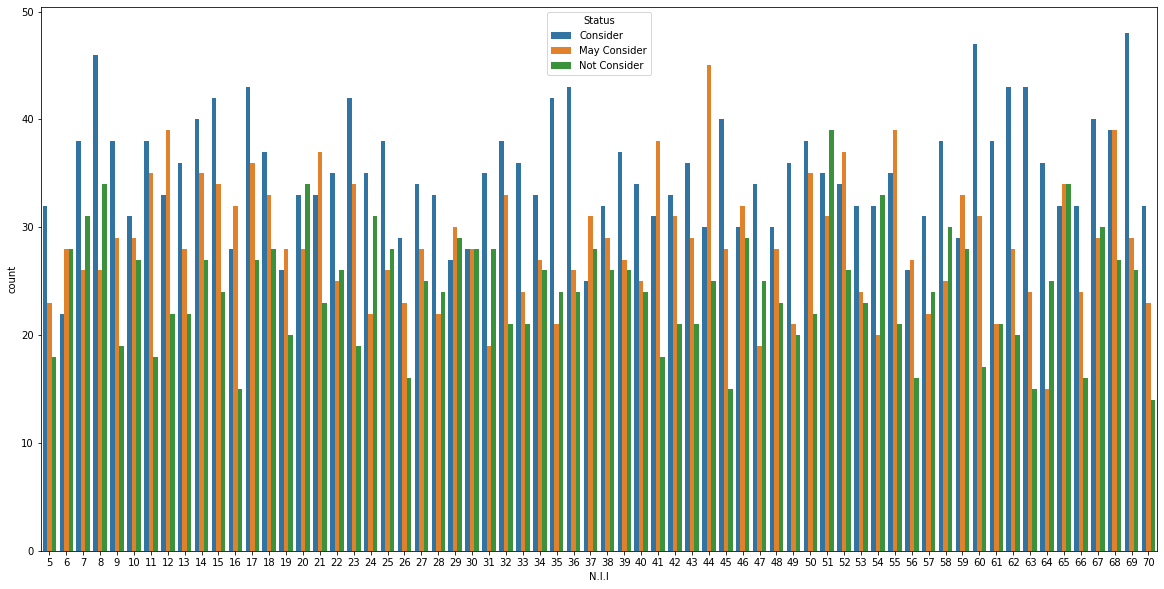

S.P.I


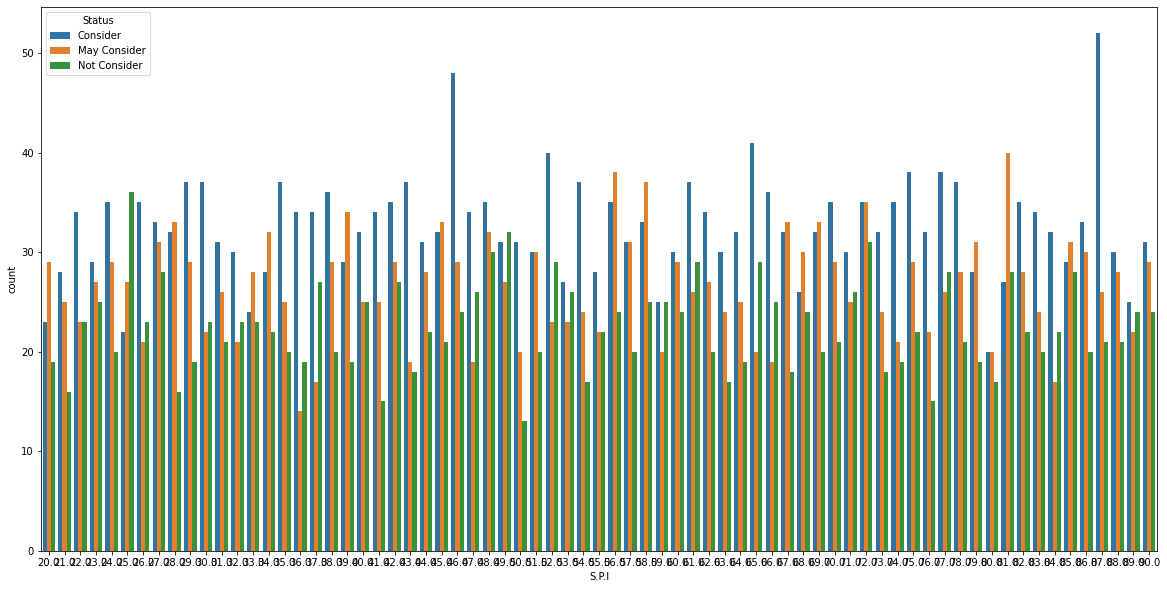

S.P.C


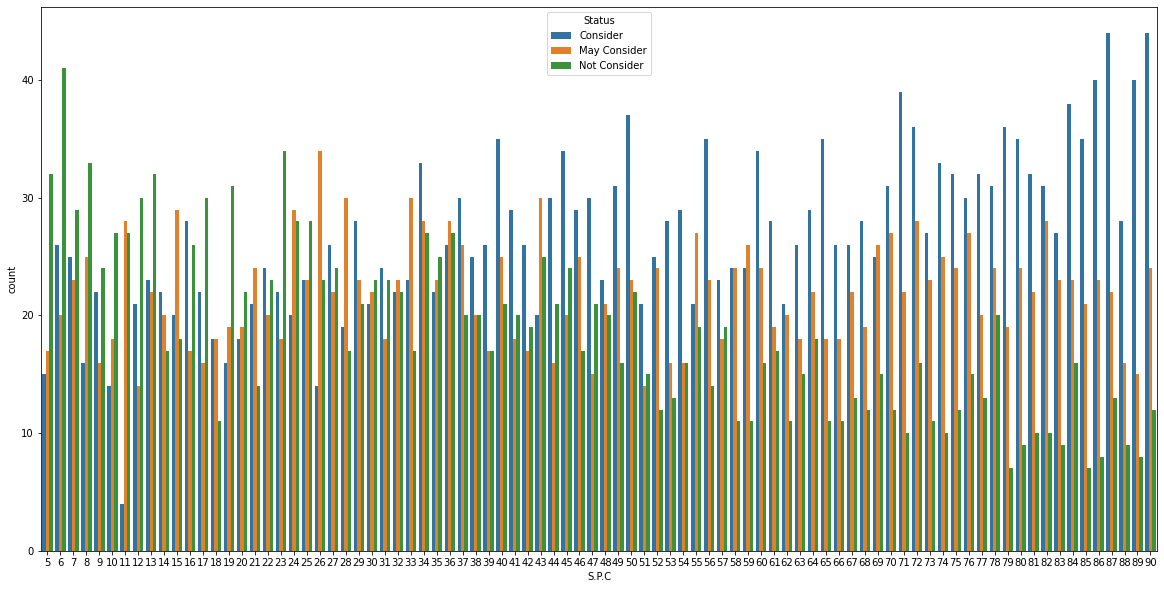

L.A.C


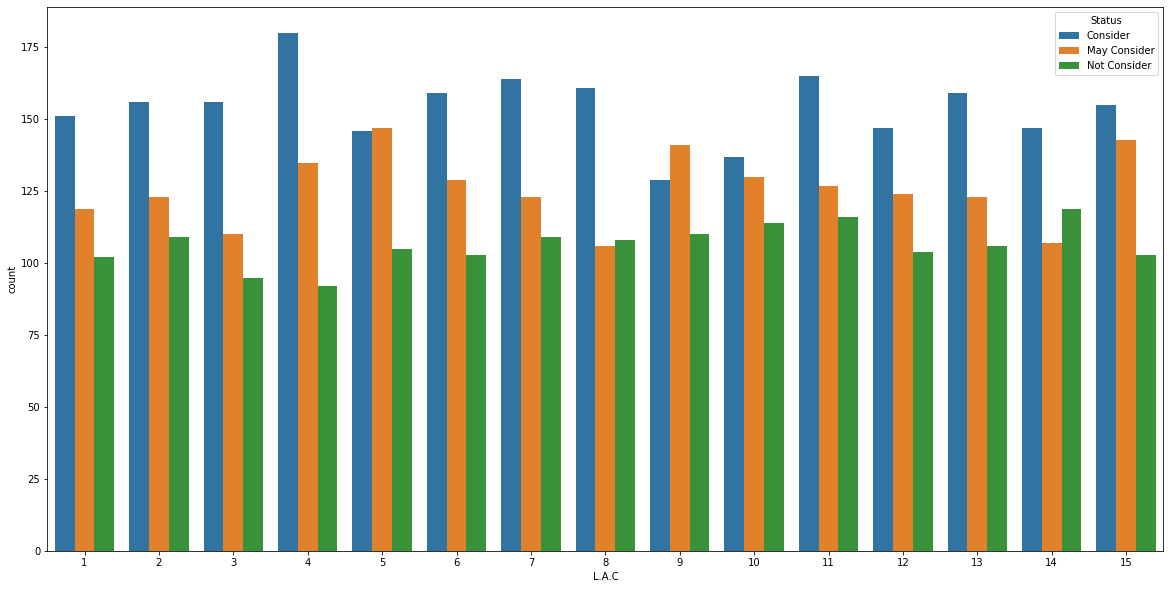

L.A.I


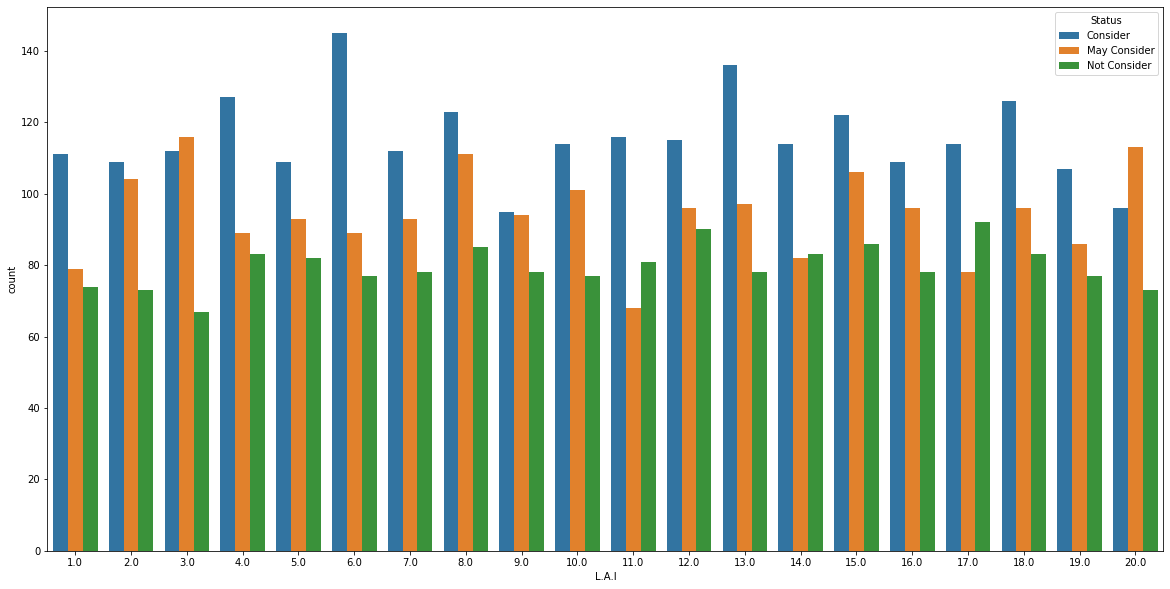

Q.A


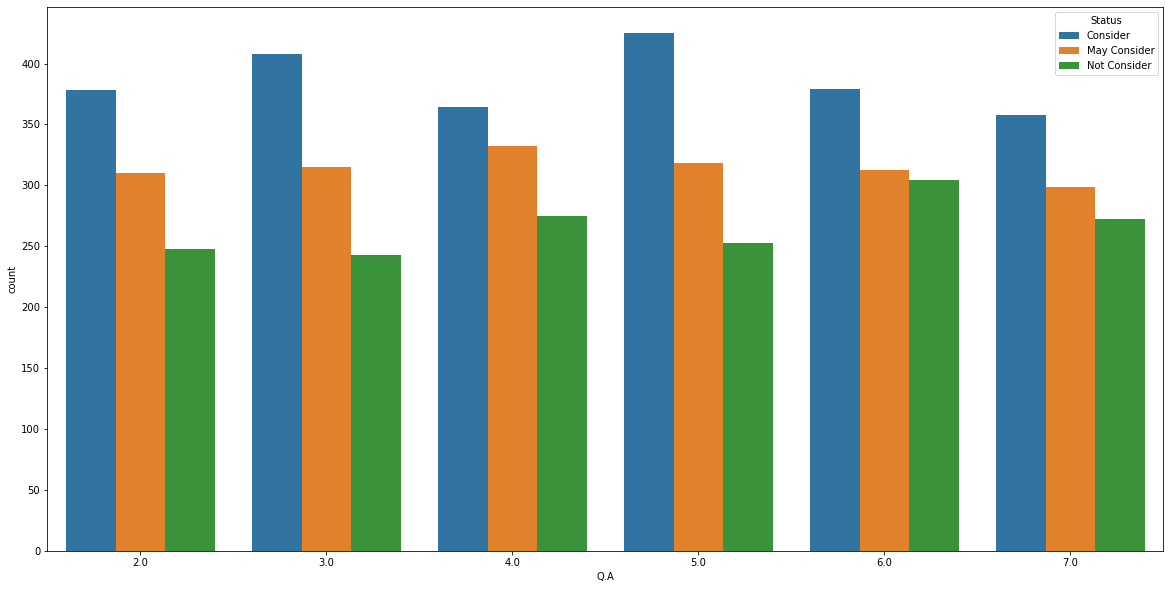

P.E.I


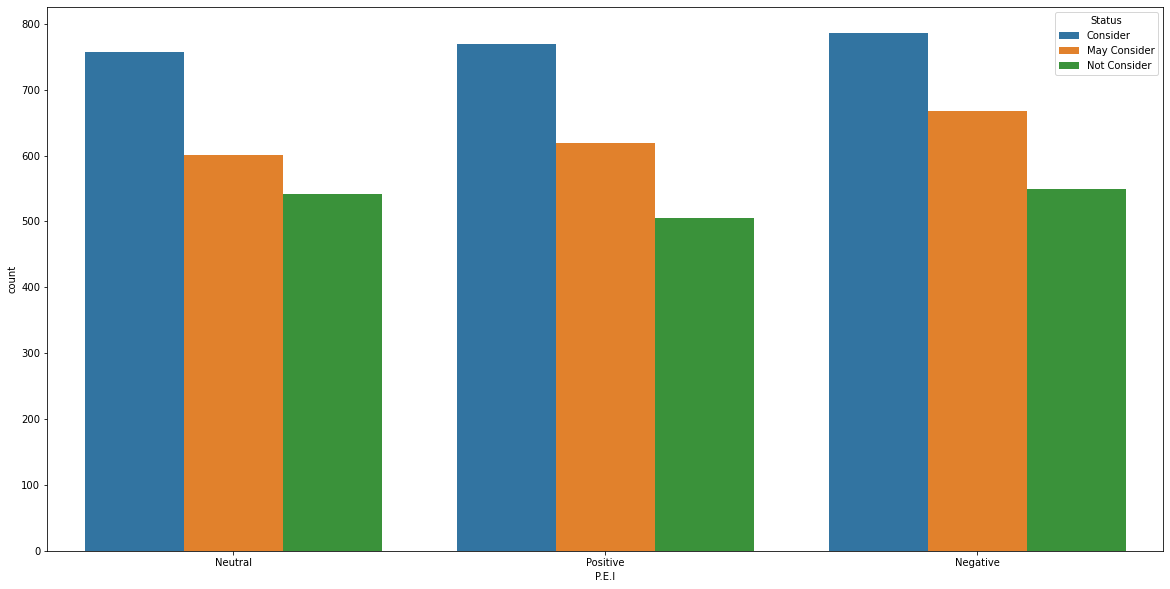

P.E.C


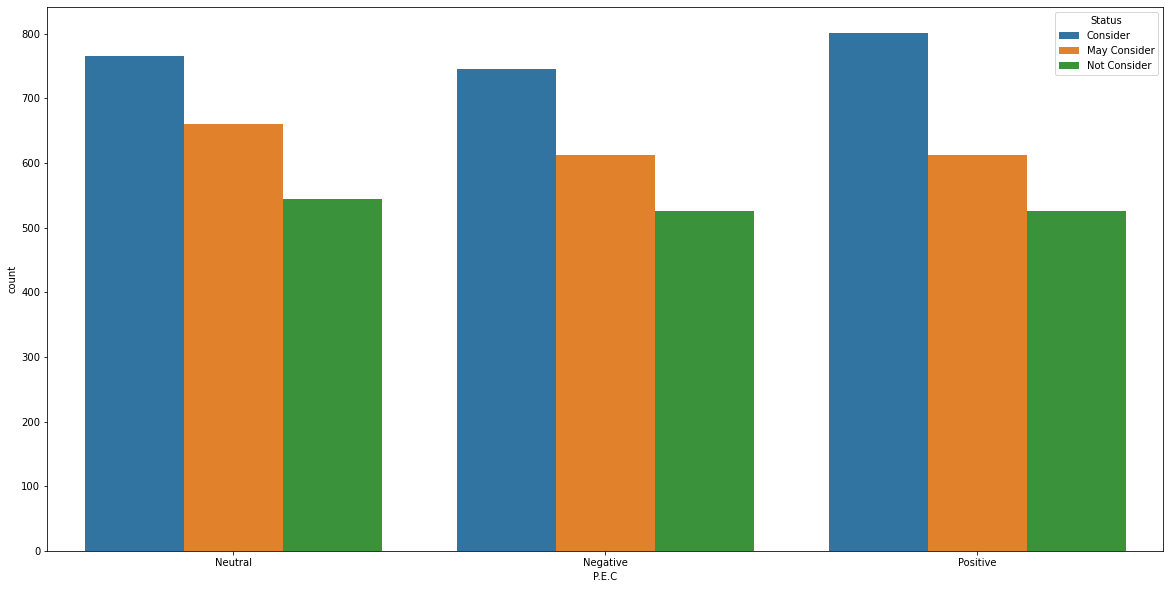

COMPLIANCE Ratio


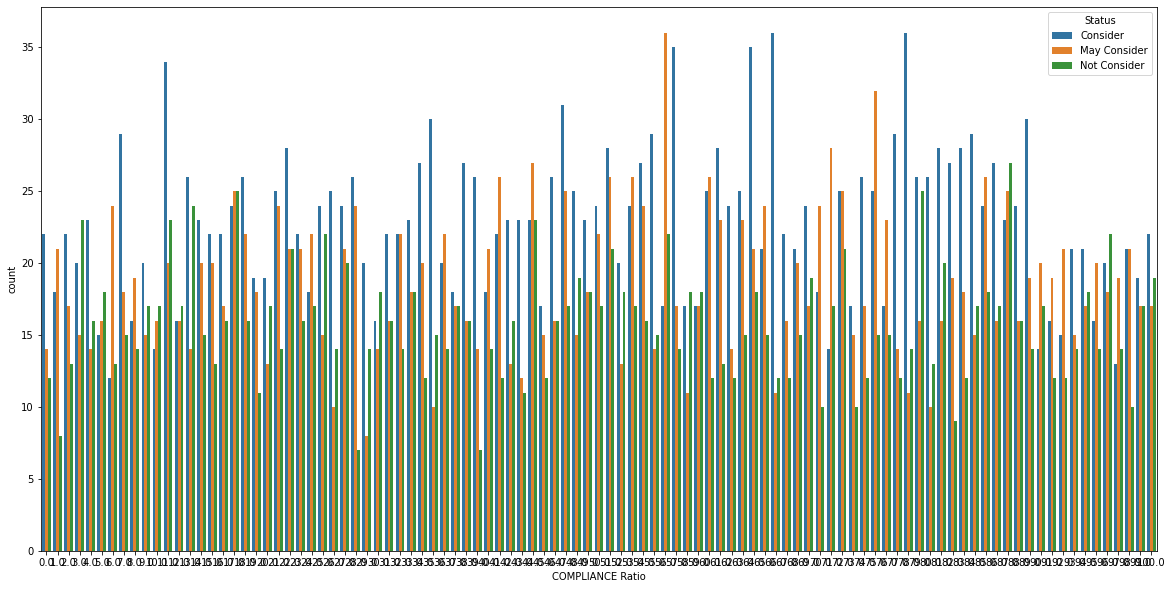

Interview duration


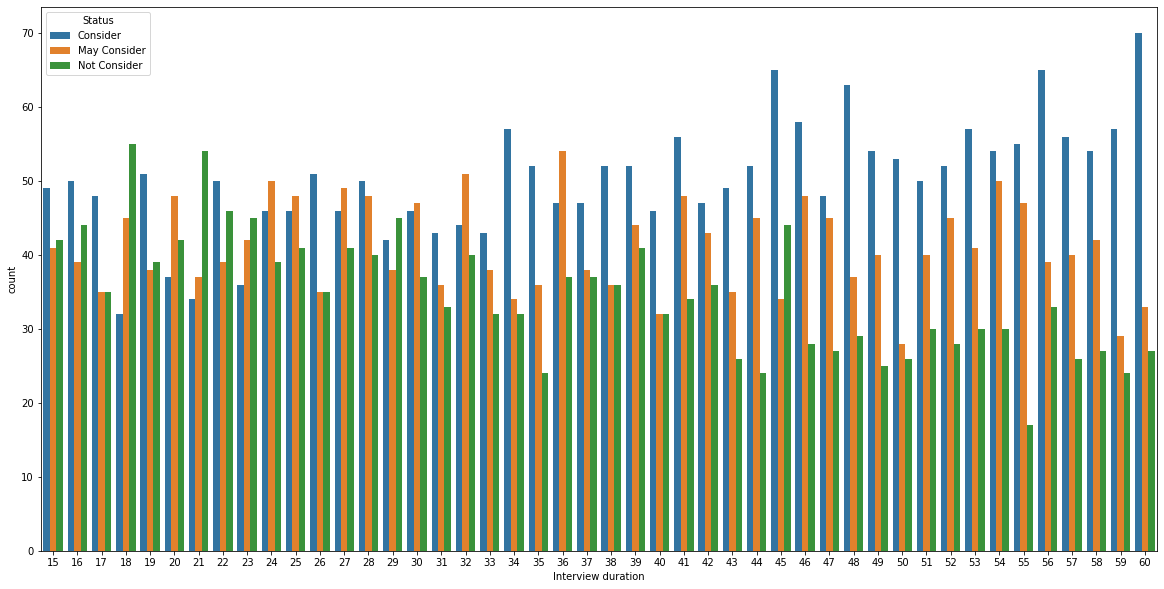

Interviewer Intro


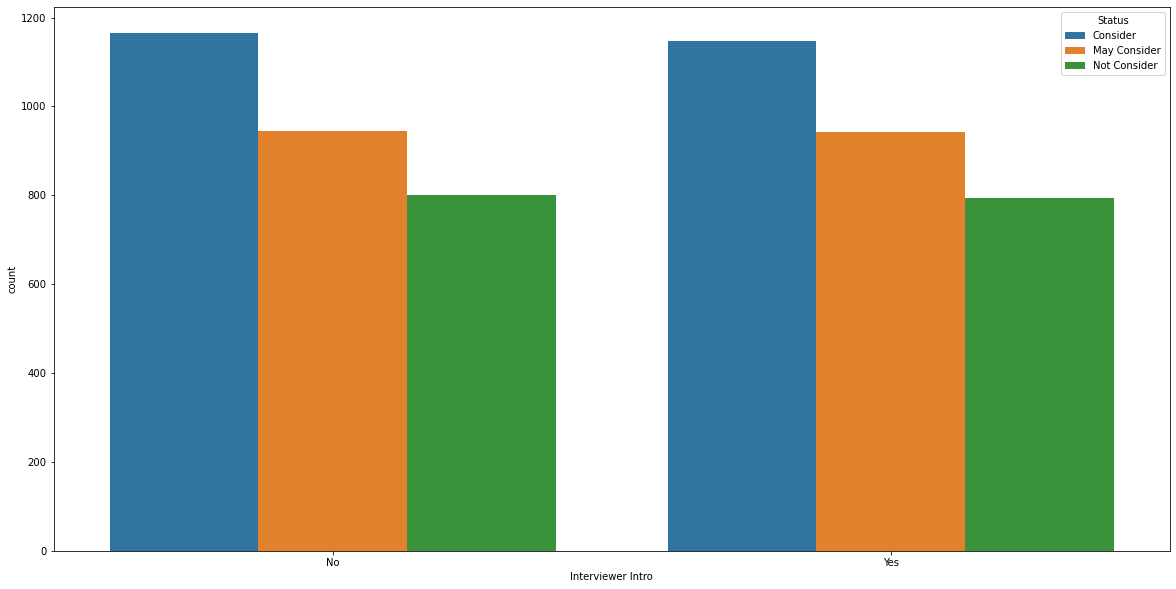

Candidate into


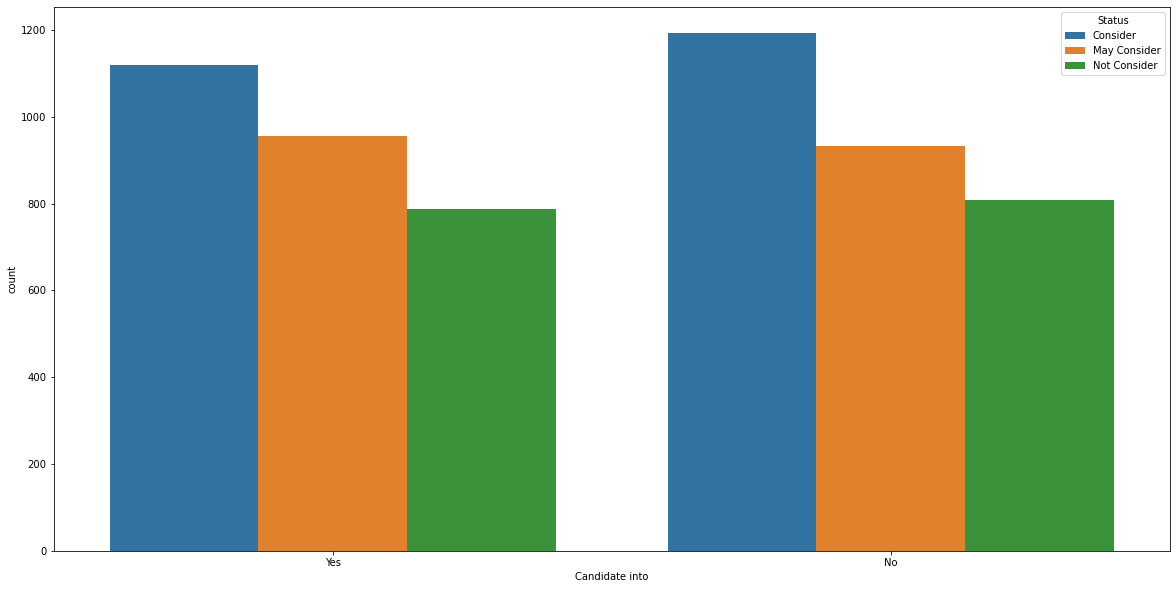

Opp to ask


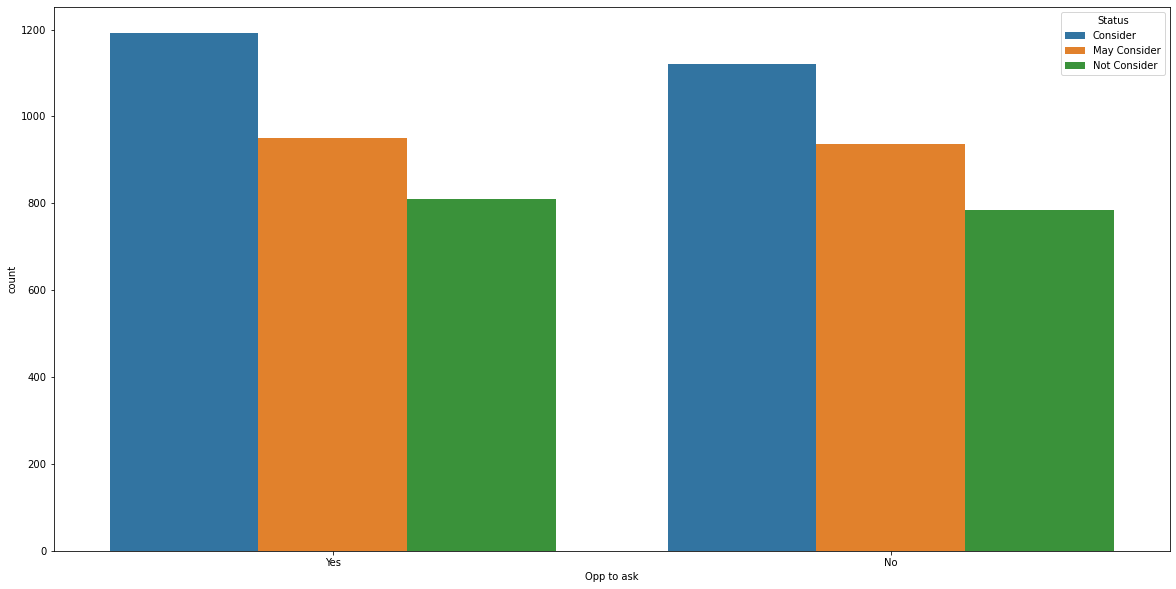

Status


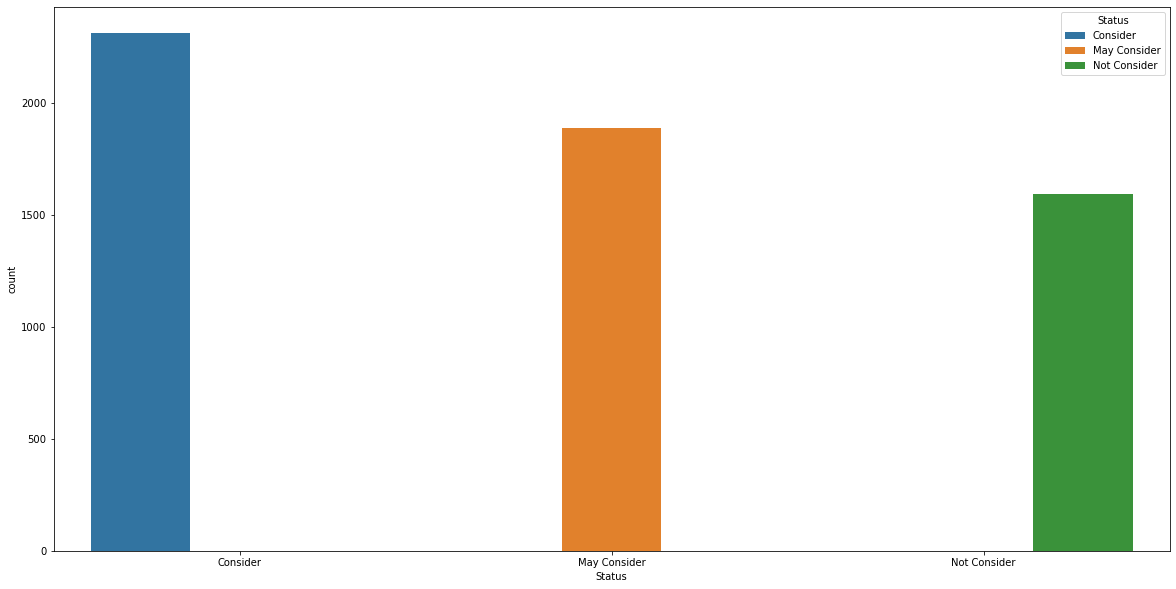

In [44]:
for i in df.columns:
    print(i)
    sns.countplot(df[i],hue= df['Status'])
    plt.show()

In [45]:
df1.drop(['Interview Id','Candidate Id'],axis=1,inplace=True)

In [46]:
df2=pd.get_dummies(data=df1,columns=['Profile','P.E.I','P.E.C','Interviewer Intro','Candidate into', 'Opp to ask'],drop_first=True)

In [47]:
df2.head()

,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration,Status,Profile_Data Scientist,Profile_Developer,Profile_HR,Profile_Marketing,Profile_Product Manager,Profile_Program Manager,Profile_QA Automation,Profile_QA Manual,Profile_Sales,P.E.I_Neutral,P.E.I_Positive,P.E.C_Neutral,P.E.C_Positive,Interviewer Intro_Yes,Candidate into_Yes,Opp to ask_Yes
0,194,0.98,0.02,53,88,93,32,88.0,106,41,66,42.0,47,13,15.0,6.0,98.0,37,Consider,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1
1,234,0.67,0.33,51,53,44,36,93.0,313,28,62,32.0,52,5,15.0,4.0,54.0,33,Consider,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,267,0.81,0.19,60,77,75,54,52.0,67,26,14,57.0,34,4,7.0,3.0,31.0,58,Consider,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,199,0.69,0.31,93,42,103,49,115.0,166,62,55,65.0,75,10,10.0,7.0,24.0,35,Consider,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,221,0.57,0.43,44,44,119,66,190.0,394,7,32,36.0,74,13,7.0,3.0,73.0,60,Consider,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
transformed=le.fit_transform(df2['Interviewer Id'])
df2['Interviewer Id']=transformed

In [49]:
X=df2.drop('Status',axis=1)
y=df2['Status']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sc=scaler.fit_transform(X)
scaled_data=pd.DataFrame(sc,columns=X.columns)

In [52]:
scaled_data.head()

,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration,Profile_Data Scientist,Profile_Developer,Profile_HR,Profile_Marketing,Profile_Product Manager,Profile_Program Manager,Profile_QA Automation,Profile_QA Manual,Profile_Sales,P.E.I_Neutral,P.E.I_Positive,P.E.C_Neutral,P.E.C_Positive,Interviewer Intro_Yes,Candidate into_Yes,Opp to ask_Yes
0,-1.557684,1.618171,-1.618409,-0.577690,0.330003,0.540431,-0.888243,-0.717742,-1.129153,0.175238,1.492318,-0.640374,-0.016037,1.160042,0.778737,0.897356,1.655218,-0.028191,-0.32737,2.918158,-0.329241,-0.332432,-0.328172,-0.332963,-0.332698,-0.331636,-0.33455,1.436960,-0.699764,1.394576,-0.712041,-0.995720,1.006599,0.984112
1,0.198655,-0.529768,0.529661,-0.645712,-1.166419,-1.547418,-0.616316,-0.660387,0.065449,-0.508084,1.283371,-1.130018,0.185548,-0.689467,0.778737,-0.285811,0.128050,-0.328747,-0.32737,-0.342682,-0.329241,-0.332432,-0.328172,-0.332963,-0.332698,-0.331636,2.98909,1.436960,-0.699764,-0.717064,-0.712041,-0.995720,-0.993444,0.984112
2,1.647635,0.440269,-0.440435,-0.339613,-0.140301,-0.226534,0.607354,-1.130702,-1.354223,-0.613211,-1.223994,0.094092,-0.540158,-0.920655,-0.618515,-0.877394,-0.670243,1.549732,-0.32737,-0.342682,-0.329241,-0.332432,-0.328172,3.003341,-0.332698,-0.331636,-0.33455,-0.695913,1.429053,-0.717064,1.404413,-0.995720,1.006599,-1.016144
3,-1.338141,-0.391191,0.391076,0.782747,-1.636723,0.966522,0.267446,-0.408023,-0.782891,1.279067,0.917714,0.485807,1.112840,0.466476,-0.094545,1.488940,-0.913201,-0.178469,-0.32737,-0.342682,-0.329241,3.008131,-0.328172,-0.332963,-0.332698,-0.331636,-0.33455,-0.695913,1.429053,-0.717064,-0.712041,-0.995720,1.006599,-1.016144
4,-0.372155,-1.222651,1.222587,-0.883788,-1.551213,1.648269,1.423134,0.452310,0.532902,-1.611913,-0.283732,-0.934160,1.072523,1.160042,-0.618515,-0.877394,0.787509,1.700011,-0.32737,-0.342682,-0.329241,-0.332432,-0.328172,-0.332963,3.005733,-0.331636,-0.33455,-0.695913,-0.699764,-0.717064,1.404413,1.004299,1.006599,-1.016144


In [53]:
from sklearn.decomposition import PCA
pca_bc = PCA(.95, random_state = 100)
pca_data = pca_bc.fit_transform(scaled_data)

In [64]:
df_bc_subset = pd.DataFrame(pca_data, columns= ['PC' + str(i+1) for i in range(30)])
df_bc_subset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-2.465985,-1.401543,-0.995145,-0.450694,-1.540211,-0.054181,1.030197,-1.213893,2.134738,0.975560,0.262702,-0.775396,-1.437854,0.597804,0.392299,-0.424668,0.017333,0.006752,-0.863415,-1.432131,-1.129630,-1.682201,0.268841,-0.794989,-1.212960,1.090417,0.097038,-0.905339,-1.100062,0.676318
1,0.626331,-0.348188,-1.060753,1.581086,-0.413661,-1.257278,-1.011926,-0.511816,-1.176411,1.754508,0.456535,-0.012070,-0.947108,-0.769249,-0.424919,-0.401344,0.630114,-1.252737,-0.049126,-1.438737,-1.789244,1.247789,0.972006,0.170508,-0.643617,-0.614823,-0.420214,-0.493366,0.465475,0.479683
2,-0.496662,1.555737,1.157961,-0.846413,1.268426,1.800213,-0.705805,1.560924,-0.607365,0.519584,-0.793501,-0.626040,0.439102,-1.381416,-1.735221,-1.008425,0.754018,-0.628134,-0.079868,-0.445425,1.821864,-0.552357,-0.935669,-1.454506,-0.588222,-0.573766,0.629790,0.122634,1.447535,0.203352
3,0.660142,0.258992,1.530093,1.345801,-1.073073,-0.596121,-0.282875,0.963608,1.527148,-0.609889,0.625935,0.019946,-0.713482,-0.424024,0.144744,-0.263490,-2.707733,-0.242615,1.587369,-0.222217,0.565103,-0.238526,-2.232802,-0.200300,-1.076826,0.997289,-0.116811,0.434515,-0.596175,-0.735087
4,1.743716,1.107481,-0.573617,-0.888460,2.052660,-1.119144,-1.080427,-0.803728,1.452634,-0.821848,-0.401087,1.091708,-0.691244,-1.922903,0.750580,-1.073249,-0.826527,0.069354,-2.501472,0.728076,1.430962,0.273506,0.693540,-0.548754,0.055949,0.649527,0.598196,0.739839,-0.003104,-1.745631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989,1.032188,0.445030,1.288566,1.879325,-0.500421,0.015097,-0.024361,0.734868,1.705094,-0.738902,0.253560,-0.485670,-0.740044,1.518581,2.189880,1.125108,-2.095230,0.097503,-0.132391,-0.311427,0.994489,-2.170167,-0.562967,0.609192,0.326595,0.696865,1.825549,-1.254413,0.978573,-2.375460
6990,0.935563,0.010777,1.642165,-0.265259,0.315000,-1.528613,2.120462,1.431548,-0.153613,1.072531,-1.847000,0.339135,-0.693429,-1.537732,0.623019,0.386437,-0.509712,-0.333642,-0.176962,-0.652261,1.657704,0.206719,-0.119591,-0.967260,-1.019482,-0.233259,-1.157999,1.178940,0.085083,-0.355300
6991,0.309576,-0.026547,0.101340,2.161964,1.238010,0.659149,1.723964,-1.077526,-0.658203,0.175046,0.859679,-0.434426,1.592812,-0.160784,0.061249,1.802762,0.071304,0.964332,-0.296548,1.482426,0.731758,-0.700072,0.940710,-1.018712,-1.365055,-1.305381,0.002298,-1.243253,-0.245709,0.042088
6992,-1.986861,0.497966,1.647706,-1.403375,-2.023579,-0.040185,0.210156,-0.823382,1.636912,1.331766,0.176751,-0.319666,1.048362,-1.327704,-1.266704,1.278100,-1.604293,-0.513908,0.660559,-0.807614,-0.892560,0.278981,-0.572898,-1.120615,1.703445,0.434586,-0.707488,0.001723,-0.064027,0.869127


In [63]:
y

0       Consider
1       Consider
2       Consider
3       Consider
4       Consider
          ...   
1195         NaN
1196         NaN
1197         NaN
1198         NaN
1199         NaN
Name: Status, Length: 6994, dtype: object

In [65]:
y.reset_index(drop=True,inplace=True)

In [66]:
new_df=pd.concat([df_bc_subset,y],axis=1)

In [67]:
new_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,Status
0,-2.465985,-1.401543,-0.995145,-0.450694,-1.540211,-0.054181,1.030197,-1.213893,2.134738,0.975560,0.262702,-0.775396,-1.437854,0.597804,0.392299,-0.424668,0.017333,0.006752,-0.863415,-1.432131,-1.129630,-1.682201,0.268841,-0.794989,-1.212960,1.090417,0.097038,-0.905339,-1.100062,0.676318,Consider
1,0.626331,-0.348188,-1.060753,1.581086,-0.413661,-1.257278,-1.011926,-0.511816,-1.176411,1.754508,0.456535,-0.012070,-0.947108,-0.769249,-0.424919,-0.401344,0.630114,-1.252737,-0.049126,-1.438737,-1.789244,1.247789,0.972006,0.170508,-0.643617,-0.614823,-0.420214,-0.493366,0.465475,0.479683,Consider
2,-0.496662,1.555737,1.157961,-0.846413,1.268426,1.800213,-0.705805,1.560924,-0.607365,0.519584,-0.793501,-0.626040,0.439102,-1.381416,-1.735221,-1.008425,0.754018,-0.628134,-0.079868,-0.445425,1.821864,-0.552357,-0.935669,-1.454506,-0.588222,-0.573766,0.629790,0.122634,1.447535,0.203352,Consider
3,0.660142,0.258992,1.530093,1.345801,-1.073073,-0.596121,-0.282875,0.963608,1.527148,-0.609889,0.625935,0.019946,-0.713482,-0.424024,0.144744,-0.263490,-2.707733,-0.242615,1.587369,-0.222217,0.565103,-0.238526,-2.232802,-0.200300,-1.076826,0.997289,-0.116811,0.434515,-0.596175,-0.735087,Consider
4,1.743716,1.107481,-0.573617,-0.888460,2.052660,-1.119144,-1.080427,-0.803728,1.452634,-0.821848,-0.401087,1.091708,-0.691244,-1.922903,0.750580,-1.073249,-0.826527,0.069354,-2.501472,0.728076,1.430962,0.273506,0.693540,-0.548754,0.055949,0.649527,0.598196,0.739839,-0.003104,-1.745631,Consider


In [68]:
new_train=new_df[~new_df.Status.isnull()].reset_index(drop=True)
new_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,Status
0,-2.465985,-1.401543,-0.995145,-0.450694,-1.540211,-0.054181,1.030197,-1.213893,2.134738,0.975560,0.262702,-0.775396,-1.437854,0.597804,0.392299,-0.424668,0.017333,0.006752,-0.863415,-1.432131,-1.129630,-1.682201,0.268841,-0.794989,-1.212960,1.090417,0.097038,-0.905339,-1.100062,0.676318,Consider
1,0.626331,-0.348188,-1.060753,1.581086,-0.413661,-1.257278,-1.011926,-0.511816,-1.176411,1.754508,0.456535,-0.012070,-0.947108,-0.769249,-0.424919,-0.401344,0.630114,-1.252737,-0.049126,-1.438737,-1.789244,1.247789,0.972006,0.170508,-0.643617,-0.614823,-0.420214,-0.493366,0.465475,0.479683,Consider
2,-0.496662,1.555737,1.157961,-0.846413,1.268426,1.800213,-0.705805,1.560924,-0.607365,0.519584,-0.793501,-0.626040,0.439102,-1.381416,-1.735221,-1.008425,0.754018,-0.628134,-0.079868,-0.445425,1.821864,-0.552357,-0.935669,-1.454506,-0.588222,-0.573766,0.629790,0.122634,1.447535,0.203352,Consider
3,0.660142,0.258992,1.530093,1.345801,-1.073073,-0.596121,-0.282875,0.963608,1.527148,-0.609889,0.625935,0.019946,-0.713482,-0.424024,0.144744,-0.263490,-2.707733,-0.242615,1.587369,-0.222217,0.565103,-0.238526,-2.232802,-0.200300,-1.076826,0.997289,-0.116811,0.434515,-0.596175,-0.735087,Consider
4,1.743716,1.107481,-0.573617,-0.888460,2.052660,-1.119144,-1.080427,-0.803728,1.452634,-0.821848,-0.401087,1.091708,-0.691244,-1.922903,0.750580,-1.073249,-0.826527,0.069354,-2.501472,0.728076,1.430962,0.273506,0.693540,-0.548754,0.055949,0.649527,0.598196,0.739839,-0.003104,-1.745631,Consider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,1.679581,-1.751693,0.139894,1.878566,-0.176418,-0.655748,-0.643233,1.861328,1.227701,-0.125471,0.990983,-0.924784,0.684260,0.000330,-0.121231,-0.342514,-1.049066,1.900780,0.376474,1.869087,0.544597,-0.941477,-0.136516,-1.629165,-0.687877,-0.447617,-0.966693,0.393602,-1.155042,-2.008780,Consider
5790,0.593291,-0.148798,1.441969,-2.096775,-0.246706,0.218191,-0.642434,1.580311,-1.541011,-1.079418,1.864982,0.114251,0.017811,-0.671902,-0.262223,0.103788,0.718039,0.667486,-0.688470,1.376820,1.885539,0.404250,-0.631310,-1.653700,0.763873,0.798526,-1.061782,-0.766421,-1.394646,-0.392847,Consider
5791,0.923776,-1.160550,0.673740,0.924154,-2.022105,-1.300975,0.318079,-1.719946,-0.975047,-1.075454,-1.833632,-1.916434,0.811765,-0.981758,-0.661075,1.090597,-0.399330,0.080511,-0.150025,-1.397132,-0.249383,0.026920,-1.059309,0.229791,-0.433273,-0.980098,-0.322604,1.560709,0.928440,1.102636,May Consider
5792,-2.056241,1.044024,-1.394376,0.292385,0.426599,-0.888528,-1.381605,-0.301184,-0.882470,1.811063,0.667661,0.046915,-1.237062,-0.211522,0.300961,0.034641,-0.456950,1.060003,-0.840871,-0.129209,1.267170,2.392449,1.109403,1.026352,-1.359428,1.607982,0.485832,0.375918,1.065461,0.413793,Consider


In [69]:
new_test=new_df[new_df.Status.isnull()].reset_index(drop=True)
new_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,Status
0,2.100744,0.545136,1.532057,-0.319397,-1.000190,-1.006931,-0.664982,-0.929224,-0.553115,-1.236373,-1.689680,-1.202703,0.242847,0.409057,-0.049520,-0.751033,1.460893,-0.005808,-0.380928,0.689010,0.352791,0.593216,-1.013928,0.594498,-1.829386,0.669317,-2.437529,0.315053,1.720311,-1.434458,NaN
1,-1.240874,-0.711598,2.053411,1.342266,-2.682128,-0.682348,-0.151786,-0.890633,-0.152255,-1.616248,-1.941121,0.177652,0.894278,-0.759215,-1.470471,1.514626,-1.000441,-0.917868,-0.790809,-0.442912,-1.128286,-1.127035,0.389137,-0.004723,0.008398,2.116823,-0.007947,-0.279638,0.327828,-0.052002,NaN
2,1.593367,1.630977,-0.522574,-0.740183,1.771784,-1.396747,0.026060,-0.320608,0.153794,-0.853353,-0.077173,-0.868411,1.315935,1.876945,0.013444,-0.157670,0.756747,0.240482,0.710461,-0.599894,-0.085389,1.314586,1.591535,-1.547365,-0.658646,-1.763937,1.247113,0.415652,-1.379991,0.673294,NaN
3,2.206971,-1.290836,0.165969,0.767451,0.151073,1.886660,2.146869,-1.654998,-0.664184,-0.397998,0.996119,0.830936,0.699431,1.655994,-0.722059,-1.220297,-0.250131,0.364638,1.118258,-0.594354,-1.144302,0.552539,-0.350347,0.813382,0.247761,0.023093,1.530125,-0.888475,-0.267232,1.820303,NaN
4,1.606974,1.688321,1.104209,0.278602,0.134995,1.706985,1.598250,-1.001477,-0.943662,-0.069574,1.368899,1.544378,1.667441,1.213578,-0.616883,-2.092186,-1.187798,1.412498,0.550785,-0.603161,0.455559,0.167530,-0.644365,0.158626,-0.870516,0.769329,0.133982,0.858157,-0.581556,1.145551,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.032188,0.445030,1.288566,1.879325,-0.500421,0.015097,-0.024361,0.734868,1.705094,-0.738902,0.253560,-0.485670,-0.740044,1.518581,2.189880,1.125108,-2.095230,0.097503,-0.132391,-0.311427,0.994489,-2.170167,-0.562967,0.609192,0.326595,0.696865,1.825549,-1.254413,0.978573,-2.375460,NaN
1196,0.935563,0.010777,1.642165,-0.265259,0.315000,-1.528613,2.120462,1.431548,-0.153613,1.072531,-1.847000,0.339135,-0.693429,-1.537732,0.623019,0.386437,-0.509712,-0.333642,-0.176962,-0.652261,1.657704,0.206719,-0.119591,-0.967260,-1.019482,-0.233259,-1.157999,1.178940,0.085083,-0.355300,NaN
1197,0.309576,-0.026547,0.101340,2.161964,1.238010,0.659149,1.723964,-1.077526,-0.658203,0.175046,0.859679,-0.434426,1.592812,-0.160784,0.061249,1.802762,0.071304,0.964332,-0.296548,1.482426,0.731758,-0.700072,0.940710,-1.018712,-1.365055,-1.305381,0.002298,-1.243253,-0.245709,0.042088,NaN
1198,-1.986861,0.497966,1.647706,-1.403375,-2.023579,-0.040185,0.210156,-0.823382,1.636912,1.331766,0.176751,-0.319666,1.048362,-1.327704,-1.266704,1.278100,-1.604293,-0.513908,0.660559,-0.807614,-0.892560,0.278981,-0.572898,-1.120615,1.703445,0.434586,-0.707488,0.001723,-0.064027,0.869127,NaN


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [71]:
X=new_train.drop('Status',axis=1)
y=new_train['Status']

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [76]:
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_train_pred1=model1.predict(X_train)
y_test_pred1=model1.predict(X_test)
print('Test')
print(confusion_matrix(y_test,y_test_pred1))
print(classification_report(y_test,y_test_pred1))
print('Train')
print(confusion_matrix(y_train,y_train_pred1))
print(classification_report(y_train,y_train_pred1))

Test
[[678   7   0]
 [  2 531   8]
 [  0   8 505]]
              precision    recall  f1-score   support

    Consider       1.00      0.99      0.99       685
May Consider       0.97      0.98      0.98       541
Not Consider       0.98      0.98      0.98       513

    accuracy                           0.99      1739
   macro avg       0.98      0.99      0.98      1739
weighted avg       0.99      0.99      0.99      1739

Train
[[1617    8    2]
 [   6 1328   12]
 [   0    8 1074]]
              precision    recall  f1-score   support

    Consider       1.00      0.99      1.00      1627
May Consider       0.99      0.99      0.99      1346
Not Consider       0.99      0.99      0.99      1082

    accuracy                           0.99      4055
   macro avg       0.99      0.99      0.99      4055
weighted avg       0.99      0.99      0.99      4055



In [75]:
from sklearn.svm import SVC
model2=SVC(C=1000,gamma=1,kernel='linear')
model2.fit(X_train,y_train)
y_train_pred2=model2.predict(X_train)
y_test_pred2=model2.predict(X_test)
print('Test')
print(confusion_matrix(y_test,y_test_pred2))
print(classification_report(y_test,y_test_pred2))
print('Train')
print(confusion_matrix(y_train,y_train_pred2))
print(classification_report(y_train,y_train_pred2))


Test
[[680   5   0]
 [  2 537   2]
 [  7  11 495]]
              precision    recall  f1-score   support

    Consider       0.99      0.99      0.99       685
May Consider       0.97      0.99      0.98       541
Not Consider       1.00      0.96      0.98       513

    accuracy                           0.98      1739
   macro avg       0.98      0.98      0.98      1739
weighted avg       0.98      0.98      0.98      1739

Train
[[1619    8    0]
 [   5 1340    1]
 [   0    2 1080]]
              precision    recall  f1-score   support

    Consider       1.00      1.00      1.00      1627
May Consider       0.99      1.00      0.99      1346
Not Consider       1.00      1.00      1.00      1082

    accuracy                           1.00      4055
   macro avg       1.00      1.00      1.00      4055
weighted avg       1.00      1.00      1.00      4055



In [78]:
model3=SVC(C=1000,gamma=1,kernel='linear')
model3.fit(X,y)
y_train_pred3=model3.predict(X)
print('Train')
print(confusion_matrix(y,y_train_pred3))
print(classification_report(y,y_train_pred3))

Train
[[2299   13    0]
 [   3 1880    4]
 [   0    2 1593]]
              precision    recall  f1-score   support

    Consider       1.00      0.99      1.00      2312
May Consider       0.99      1.00      0.99      1887
Not Consider       1.00      1.00      1.00      1595

    accuracy                           1.00      5794
   macro avg       1.00      1.00      1.00      5794
weighted avg       1.00      1.00      1.00      5794



In [79]:
new_test1=new_test.drop('Status',axis=1)

In [81]:
y_test_pred1=pd.DataFrame(model3.predict(new_test1))
y_test_pred1

,0
0,Consider
1,May Consider
2,May Consider
3,Not Consider
4,Not Consider
...,...
1195,Not Consider
1196,Consider
1197,Not Consider
1198,May Consider


In [85]:
sample = pd.read_csv('C:/Users/Manoj/Desktop/Surya/Machine Learning/Hackathon imarticus/Round 2/sample.csv')
df_name = pd.DataFrame(sample.values[:,:-1])
df_name.values

array([[702127796635],
       [613490569071],
       [759998772623],
       ...,
       [75547031851],
       [173914777164],
       [480519602140]], dtype=object)

In [87]:
Test_predicted = pd.concat([df_name,y_test_pred1],axis=1 )
Test_predicted
Test_predicted.columns = ['Interview Id','Status']

In [89]:
Test_predicted.to_csv('C:/Users/Manoj/Desktop/Surya/Machine Learning/Hackathon imarticus/Round 2/Test_Data_Pred_new1.csv',index = False)

In [90]:
Test_predicted


,Interview Id,Status
0,702127796635,Consider
1,613490569071,May Consider
2,759998772623,May Consider
3,391760082113,Not Consider
4,941599210196,Not Consider
...,...,...
1195,256033687434,Not Consider
1196,627337316047,Consider
1197,75547031851,Not Consider
1198,173914777164,May Consider
